In [1]:

import numpy as np
import pandas as pd
from collections import namedtuple
from dataclasses import make_dataclass
from functools import partial
import datetime

In [2]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [3]:
s.dtype

dtype('float64')

In [4]:
s.describe()

count    5.000000
mean     4.600000
std      2.701851
min      1.000000
25%      3.000000
50%      5.000000
75%      6.000000
max      8.000000
dtype: float64

In [5]:
s.info()

<class 'pandas.core.series.Series'>
RangeIndex: 6 entries, 0 to 5
Series name: None
Non-Null Count  Dtype  
--------------  -----  
5 non-null      float64
dtypes: float64(1)
memory usage: 176.0 bytes


In [6]:
dates = pd.date_range("20130101", periods=6,)
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
df

,A,B,C,D
2013-01-01,-0.904086,-0.159343,1.105362,-0.259789
2013-01-02,-0.907453,-1.283712,-0.511440,-0.115357
2013-01-03,-1.130580,0.156901,1.789384,-0.180040
2013-01-04,0.769046,0.332279,-0.672590,-0.331687
2013-01-05,-0.409964,0.653765,-1.207832,-0.002101
2013-01-06,0.268999,-0.406982,-1.141825,-0.845311


In [7]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [8]:
df2 = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20130102"),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
    }
)
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [9]:
pd.DataFrame({'a': 1, 'b': 3}, index=[0])

,a,b
0,1,3


In [10]:
pd.DataFrame({'a': [1], 'b': [3]})

,a,b
0,1,3


In [11]:
pd.DataFrame({'a': [1, 2], 'b': [3]}, index=[0, 1])

,a,b
0,1,3
1,2,3


In [12]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [13]:
df.head()

,A,B,C,D
2013-01-01,-0.904086,-0.159343,1.105362,-0.259789
2013-01-02,-0.907453,-1.283712,-0.511440,-0.115357
2013-01-03,-1.130580,0.156901,1.789384,-0.180040
2013-01-04,0.769046,0.332279,-0.672590,-0.331687
2013-01-05,-0.409964,0.653765,-1.207832,-0.002101


In [14]:
df.tail(3)

,A,B,C,D
2013-01-04,0.769046,0.332279,-0.672590,-0.331687
2013-01-05,-0.409964,0.653765,-1.207832,-0.002101
2013-01-06,0.268999,-0.406982,-1.141825,-0.845311


In [15]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [16]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [17]:
df_np = df.to_numpy() # return a view

In [18]:
df_np

array([[-0.90408577, -0.15934317,  1.10536196, -0.25978876],
       [-0.90745259, -1.28371238, -0.51144039, -0.11535657],
       [-1.13058041,  0.15690095,  1.78938382, -0.18004028],
       [ 0.76904555,  0.33227896, -0.6725898 , -0.33168657],
       [-0.40996396,  0.65376459, -1.20783166, -0.002101  ],
       [ 0.26899874, -0.40698248, -1.14182456, -0.84531124]])

In [19]:
df_np[0, ...] = 0.0
df

,A,B,C,D
2013-01-01,0.000000,0.000000,0.000000,0.000000
2013-01-02,-0.907453,-1.283712,-0.511440,-0.115357
2013-01-03,-1.130580,0.156901,1.789384,-0.180040
2013-01-04,0.769046,0.332279,-0.672590,-0.331687
2013-01-05,-0.409964,0.653765,-1.207832,-0.002101
2013-01-06,0.268999,-0.406982,-1.141825,-0.845311


In [20]:
df_np = df.to_numpy(copy=True)
df_np[0, ...] = -1.0
df

,A,B,C,D
2013-01-01,0.000000,0.000000,0.000000,0.000000
2013-01-02,-0.907453,-1.283712,-0.511440,-0.115357
2013-01-03,-1.130580,0.156901,1.789384,-0.180040
2013-01-04,0.769046,0.332279,-0.672590,-0.331687
2013-01-05,-0.409964,0.653765,-1.207832,-0.002101
2013-01-06,0.268999,-0.406982,-1.141825,-0.845311


In [21]:
df2.to_numpy()

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

In [22]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.234992,-0.091292,-0.290717,-0.245749
std,0.721418,0.682053,1.110978,0.318728
min,-1.130580,-1.283712,-1.207832,-0.845311
25%,-0.783080,-0.305237,-1.024516,-0.293775
50%,-0.204982,0.078450,-0.592015,-0.147698
75%,0.201749,0.288434,-0.127860,-0.030415
max,0.769046,0.653765,1.789384,0.000000


In [23]:
df2.describe(include=[np.number])

,A,C,D
count,4.0,4.0,4.0
mean,1.0,1.0,3.0
std,0.0,0.0,0.0
min,1.0,1.0,3.0
25%,1.0,1.0,3.0
50%,1.0,1.0,3.0
75%,1.0,1.0,3.0
max,1.0,1.0,3.0


In [24]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,0.0,-0.907453,-1.130580,0.769046,-0.409964,0.268999
B,0.0,-1.283712,0.156901,0.332279,0.653765,-0.406982
C,0.0,-0.511440,1.789384,-0.672590,-1.207832,-1.141825
D,0.0,-0.115357,-0.180040,-0.331687,-0.002101,-0.845311


In [25]:
df = pd.DataFrame(np.random.randn(6, 8), index=dates, columns=list("ABCDEFGH"))
df.sort_index(axis=1, ascending=False) # Returns a new DataFrame sorted by label 

,H,G,F,E,D,C,B,A
2013-01-01,-2.116884,-0.789273,0.178400,1.500422,0.121660,0.150787,-0.657397,-0.445213
2013-01-02,-0.087786,0.272505,-0.925817,-1.520562,1.737601,-0.884723,-0.121743,0.308720
2013-01-03,0.857932,0.170570,-0.773722,0.589109,-1.575933,0.951556,0.482269,-0.230721
2013-01-04,-1.561843,-0.117256,0.493514,1.918708,0.411081,-1.062126,-0.853128,0.921615
2013-01-05,0.316412,0.234652,1.545838,-0.009029,-0.947056,-0.110203,-0.206796,0.799243
2013-01-06,1.286729,-0.342591,-0.680739,-0.203648,-2.458554,0.018598,-0.502812,0.058359


In [26]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [27]:
_df = pd.DataFrame({"a": [1, 2, 3, 4]}, index=['A', 'b', 'C', 'd'])

In [28]:
_df.sort_index()

,a
A,1
C,3
b,2
d,4


In [29]:
_df.sort_index(key=lambda x: x.str.lower())

,a
A,1
b,2
C,3
d,4


In [30]:
df = pd.DataFrame([1, 2, 3, 4, 5], index=[100, 29, 234, 1, 150],
                  columns=['A'])
df.sort_index()


,A
1,4
29,2
100,1
150,5
234,3


In [31]:
df = pd.DataFrame(np.random.randn(6, 8), index=dates, columns=list("ABCDEFGH"))
df.sort_values(by="B")

,A,B,C,D,E,F,G,H
2013-01-05,-0.183576,-0.612849,-1.469898,0.538269,-0.065942,-0.293984,0.022927,-0.858157
2013-01-06,0.936735,-0.398117,-0.498563,0.369485,-0.581277,-1.821148,-0.505298,0.471197
2013-01-04,-0.419607,0.662970,0.433239,-1.067054,-0.940312,0.214239,-1.876018,-0.690577
2013-01-03,-0.092182,1.132968,-1.124551,0.804111,1.216051,-1.804922,0.683273,-1.155234
2013-01-02,-1.718194,1.339188,-0.890388,2.590269,0.895307,-0.286461,0.672733,-0.488415
2013-01-01,-0.059879,1.684004,-1.083010,2.682223,0.445134,-1.944453,-0.274000,-0.278203


In [32]:
s = pd.Series(np.random.randn(5),)
s

0    1.484849
1   -0.857825
2   -0.234716
3    1.877841
4    0.723313
dtype: float64

In [33]:
s.index = ["a", "b", "c", "d", "e"]
s

a    1.484849
b   -0.857825
c   -0.234716
d    1.877841
e    0.723313
dtype: float64

In [34]:
s = pd.Series(np.random.randn(5), index=["a", "b", "c", "d", "e"])
s

a   -0.060477
b   -0.686362
c    0.338239
d   -0.562056
e    0.986697
dtype: float64

In [35]:
d = {"b": 1, "a": 0, "c": 2}
pd.Series(d)

b    1
a    0
c    2
dtype: int64

In [36]:
d = {"b": 1, "a": 0, "c": 2}
pd.Series(d)['c']

2

In [37]:
d = {"a": 0.0, "b": 1.0, "c": 2.0}

In [38]:
pd.Series(d)

a    0.0
b    1.0
c    2.0
dtype: float64

In [39]:
pd.Series(d, index=["b", "c", "d", "a"])

b    1.0
c    2.0
d    NaN
a    0.0
dtype: float64

In [40]:
pd.Series(5.0, index=["a", "b", "c", "d", "e"])

a    5.0
b    5.0
c    5.0
d    5.0
e    5.0
dtype: float64

In [41]:
s

a   -0.060477
b   -0.686362
c    0.338239
d   -0.562056
e    0.986697
dtype: float64

In [42]:
s[0]

-0.06047731819778391

In [43]:
s['a']

-0.06047731819778391

In [44]:
s[:3]

a   -0.060477
b   -0.686362
c    0.338239
dtype: float64

In [45]:
s.iloc[:3]

a   -0.060477
b   -0.686362
c    0.338239
dtype: float64

In [46]:
s[s > s.median()]

c    0.338239
e    0.986697
dtype: float64

In [47]:
s[[1, 2]]

b   -0.686362
c    0.338239
dtype: float64

In [48]:
np.exp(s)

a    0.941315
b    0.503404
c    1.402476
d    0.570036
e    2.682360
dtype: float64

In [49]:
s.dtype, s.array

(dtype('float64'),
 <PandasArray>
 [-0.06047731819778391,  -0.6863618442850649,    0.338239263167769,
   -0.5620562932320078,   0.9866970737477782]
 Length: 5, dtype: float64)

In [50]:
s.array[0] = 0
s

a    0.000000
b   -0.686362
c    0.338239
d   -0.562056
e    0.986697
dtype: float64

In [51]:
s['b'] = -1

In [52]:
s

a    0.000000
b   -1.000000
c    0.338239
d   -0.562056
e    0.986697
dtype: float64

In [53]:
"e" in s

True

In [54]:
s.get("f", np.nan)

nan

In [55]:
np.exp(s)

a    1.000000
b    0.367879
c    1.402476
d    0.570036
e    2.682360
dtype: float64

In [56]:
s[1:] + s[:-1]

a         NaN
b   -2.000000
c    0.676479
d   -1.124113
e         NaN
dtype: float64

In [57]:
s.name

In [58]:
s = pd.Series(np.random.randn(5), name="something")

In [59]:
s

0   -0.800957
1   -0.871817
2    0.219996
3    0.114901
4   -1.103460
Name: something, dtype: float64

In [60]:
s.name

'something'

In [61]:
s2 = s.rename("different")
s2

0   -0.800957
1   -0.871817
2    0.219996
3    0.114901
4   -1.103460
Name: different, dtype: float64

In [62]:
s2[0] = 0
s2

0    0.000000
1   -0.871817
2    0.219996
3    0.114901
4   -1.103460
Name: different, dtype: float64

In [63]:
s

0   -0.800957
1   -0.871817
2    0.219996
3    0.114901
4   -1.103460
Name: something, dtype: float64

In [64]:
s2[10] = 5

In [65]:
s2

0     0.000000
1    -0.871817
2     0.219996
3     0.114901
4    -1.103460
10    5.000000
Name: different, dtype: float64

In [66]:
d = {
    "one": pd.Series([1.0, 2.0, 3.0], index=["a", "b", "c"]),
    "two": pd.Series([1.0, 2.0, 3.0, 4.0], index=["a", "b", "c", "d"]),
    "three": 1
}
df = pd.DataFrame(d)
df

,one,two,three
a,1.0,1.0,1
b,2.0,2.0,1
c,3.0,3.0,1
d,NaN,4.0,1


In [67]:
pd.DataFrame(d, index=["d", "b", "a"])

,one,two,three
d,NaN,4.0,1
b,2.0,2.0,1
a,1.0,1.0,1


In [68]:
pd.DataFrame(d, index=["d", "b", "a"], columns=["two", "three"])

,two,three
d,4.0,1
b,2.0,1
a,1.0,1


In [69]:
pd.DataFrame(d, index=["d", "b", "a"], columns=["two", "four"])

,two,four
d,4.0,NaN
b,2.0,NaN
a,1.0,NaN


In [70]:
d = {"one": [1.0, 2.0, 3.0, 4.0], "two": [4.0, 3.0, 2.0, 1.0]}
pd.DataFrame(d)

,one,two
0,1.0,4.0
1,2.0,3.0
2,3.0,2.0
3,4.0,1.0


In [71]:
pd.DataFrame(d, index=["a", "b", "c", "d"])

,one,two
a,1.0,4.0
b,2.0,3.0
c,3.0,2.0
d,4.0,1.0


In [72]:
data = np.zeros((2,), dtype=[("A", "i4"), ("B", "f4"), ("C", "a10")])
data[:] = [(1, 2.0, "Hello"), (2, 3.0, "World")]
pd.DataFrame(data)

,A,B,C
0,1,2.0,b'Hello'
1,2,3.0,b'World'


In [73]:
pd.DataFrame(data, columns=["C", "A", "B"])

,C,A,B
0,b'Hello',1,2.0
1,b'World',2,3.0


In [74]:
data2 = [{"a": 1, "b": 2}, {"a": 5, "b": 10, "c": 20}]
pd.DataFrame(data2)

,a,b,c
0,1,2,NaN
1,5,10,20.0


In [75]:
pd.DataFrame(data2, index=["first", "second"])

,a,b,c
first,1,2,NaN
second,5,10,20.0


In [76]:
pd.DataFrame(data2, columns=["a", "b"])

,a,b
0,1,2
1,5,10


In [77]:
df = pd.DataFrame(
    {
        ("a", "b"): {("A", "B"): 1, ("A", "C"): 2},
        ("a", "a"): {("A", "C"): 3, ("A", "B"): 4},
        ("a", "c"): {("A", "B"): 5, ("A", "C"): 6},
        ("b", "a"): {("A", "C"): 7, ("A", "B"): 8},
        ("b", "b"): {("A", "D"): 9, ("A", "B"): 10},
    }
)

In [78]:
df

a              b      
       b    a    c    a     b
A B  1.0  4.0  5.0  8.0  10.0
  C  2.0  3.0  6.0  7.0   NaN
  D  NaN  NaN  NaN  NaN   9.0

In [79]:
df['a']

b    a    c
A B  1.0  4.0  5.0
  C  2.0  3.0  6.0
  D  NaN  NaN  NaN

In [80]:
df['a']['b']['A']

B    1.0
C    2.0
D    NaN
Name: b, dtype: float64

In [81]:
df[('a', 'b')][('A', 'B')]

1.0

In [82]:
df.loc[('A', 'B'),('a', 'b')]

1.0

In [83]:
ser = pd.Series(range(3), index=list("abc"), name='ser')

In [84]:
pd.DataFrame(ser)

,ser
a,0
b,1
c,2


In [85]:
Point = namedtuple("Point", "x y")


In [86]:
pd.DataFrame([Point(0, 0), Point(0, 3), (2, 3)])

,x,y
0,0,0
1,0,3
2,2,3


In [87]:
Point3D = namedtuple("Point3D", "x y z")
pd.DataFrame([Point3D(0, 0, 0), Point3D(0, 3, 5), Point(2, 3)])

,x,y,z
0,0,0,0.0
1,0,3,5.0
2,2,3,NaN


In [88]:
Point = make_dataclass("Point", [("x", int), ("y", int)])
pd.DataFrame([Point(0, 0), Point(0, 3), Point(2, 3)])

,x,y
0,0,0
1,0,3
2,2,3


In [89]:
dict([("A", [1, 2, 3]), ("B", [4, 5, 6])])

{'A': [1, 2, 3], 'B': [4, 5, 6]}

In [90]:
pd.DataFrame.from_dict(dict([("A", [1, 2, 3]), ("B", [4, 5, 6])]))

,A,B
0,1,4
1,2,5
2,3,6


In [91]:
pd.DataFrame.from_dict(
    dict([("A", [1, 2, 3]), ("B", [4, 5, 6])]),
    orient="index",
    columns=["one", "two", "three"],
)

,one,two,three
A,1,2,3
B,4,5,6


In [92]:
data

array([(1, 2., b'Hello'), (2, 3., b'World')],
      dtype=[('A', '<i4'), ('B', '<f4'), ('C', 'S10')])

In [93]:
pd.DataFrame.from_records(data, index="C")

,A,B
C,,
b'Hello',1,2.0
b'World',2,3.0


In [94]:
df

a              b      
       b    a    c    a     b
A B  1.0  4.0  5.0  8.0  10.0
  C  2.0  3.0  6.0  7.0   NaN
  D  NaN  NaN  NaN  NaN   9.0

In [95]:
d = {
    "one": pd.Series([1.0, 2.0, 3.0], index=["a", "b", "c"]),
    "two": pd.Series([1.0, 2.0, 3.0, 4.0], index=["a", "b", "c", "d"]),
    "three": 1
}
df = pd.DataFrame(d)
df

,one,two,three
a,1.0,1.0,1
b,2.0,2.0,1
c,3.0,3.0,1
d,NaN,4.0,1


In [96]:
df['one']

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

In [97]:
df['one']['a']

1.0

In [98]:
df["three"] = df["one"] * df["two"]

In [99]:
df["flag"] = df["one"] > 2


In [100]:
del df["two"]

In [101]:
df

,one,three,flag
a,1.0,1.0,False
b,2.0,4.0,False
c,3.0,9.0,True
d,NaN,NaN,False


In [102]:
three = df.pop("three")

In [103]:
three

a    1.0
b    4.0
c    9.0
d    NaN
Name: three, dtype: float64

In [104]:
df

,one,flag
a,1.0,False
b,2.0,False
c,3.0,True
d,NaN,False


In [105]:
d['one'][0] = 0
d['one']

a    0.0
b    2.0
c    3.0
dtype: float64

In [106]:
df

,one,flag
a,1.0,False
b,2.0,False
c,3.0,True
d,NaN,False


In [107]:
df.insert(1, 'four', 99)
df

,one,four,flag
a,1.0,99,False
b,2.0,99,False
c,3.0,99,True
d,NaN,99,False


In [108]:
df.insert(2, 'four', -10, allow_duplicates=True)

In [109]:
df

,one,four,four,flag
a,1.0,99,-10,False
b,2.0,99,-10,False
c,3.0,99,-10,True
d,NaN,99,-10,False


In [110]:
df.columns

Index(['one', 'four', 'four', 'flag'], dtype='object')

In [111]:
df['four']['four']['four']

,four,four
a,99,-10
b,99,-10
c,99,-10
d,99,-10


In [112]:
df.insert(3, 'five', pd.Series([5, 6], index=[1, 2]))

In [113]:
df

,one,four,four,five,flag
a,1.0,99,-10,NaN,False
b,2.0,99,-10,NaN,False
c,3.0,99,-10,NaN,True
d,NaN,99,-10,NaN,False


In [114]:
df.insert(3, 'six', pd.Series([5, 6], index=['c', 'b']))

In [115]:
df

,one,four,four,six,five,flag
a,1.0,99,-10,NaN,NaN,False
b,2.0,99,-10,6.0,NaN,False
c,3.0,99,-10,5.0,NaN,True
d,NaN,99,-10,NaN,NaN,False


In [116]:
df['one'][2:]

c    3.0
d    NaN
Name: one, dtype: float64

In [117]:
df['one'][2]

3.0

In [118]:
df = pd.DataFrame(np.random.randn(6, 8), index=dates, columns=list("ABCDEFGH"))
df.sort_values(by="B")
df

,A,B,C,D,E,F,G,H
2013-01-01,1.280924,-0.984658,-0.934172,2.331736,0.651872,0.917250,2.528419,-0.199719
2013-01-02,0.783927,1.086466,0.530223,-0.389579,-0.204508,2.106808,-1.054047,-1.252037
2013-01-03,0.163324,-2.087470,-0.614738,-0.511534,0.262664,0.068854,-0.588865,-0.862061
2013-01-04,-0.288894,1.112887,0.217114,0.110135,0.696719,0.902803,0.498113,0.456488
2013-01-05,-1.470958,0.331373,0.228125,0.855416,1.672768,0.493219,-0.979158,1.089233
2013-01-06,0.989209,1.089703,4.002486,-0.790570,1.203820,-0.240289,1.087913,0.434654


In [119]:
df.assign(I=df['A'] + df['B'])

,A,B,C,D,E,F,G,H,I
2013-01-01,1.280924,-0.984658,-0.934172,2.331736,0.651872,0.917250,2.528419,-0.199719,0.296266
2013-01-02,0.783927,1.086466,0.530223,-0.389579,-0.204508,2.106808,-1.054047,-1.252037,1.870393
2013-01-03,0.163324,-2.087470,-0.614738,-0.511534,0.262664,0.068854,-0.588865,-0.862061,-1.924146
2013-01-04,-0.288894,1.112887,0.217114,0.110135,0.696719,0.902803,0.498113,0.456488,0.823993
2013-01-05,-1.470958,0.331373,0.228125,0.855416,1.672768,0.493219,-0.979158,1.089233,-1.139585
2013-01-06,0.989209,1.089703,4.002486,-0.790570,1.203820,-0.240289,1.087913,0.434654,2.078912


In [120]:
df

,A,B,C,D,E,F,G,H
2013-01-01,1.280924,-0.984658,-0.934172,2.331736,0.651872,0.917250,2.528419,-0.199719
2013-01-02,0.783927,1.086466,0.530223,-0.389579,-0.204508,2.106808,-1.054047,-1.252037
2013-01-03,0.163324,-2.087470,-0.614738,-0.511534,0.262664,0.068854,-0.588865,-0.862061
2013-01-04,-0.288894,1.112887,0.217114,0.110135,0.696719,0.902803,0.498113,0.456488
2013-01-05,-1.470958,0.331373,0.228125,0.855416,1.672768,0.493219,-0.979158,1.089233
2013-01-06,0.989209,1.089703,4.002486,-0.790570,1.203820,-0.240289,1.087913,0.434654


In [121]:
df.assign(J=lambda x: x.A + x.B)

,A,B,C,D,E,F,G,H,J
2013-01-01,1.280924,-0.984658,-0.934172,2.331736,0.651872,0.917250,2.528419,-0.199719,0.296266
2013-01-02,0.783927,1.086466,0.530223,-0.389579,-0.204508,2.106808,-1.054047,-1.252037,1.870393
2013-01-03,0.163324,-2.087470,-0.614738,-0.511534,0.262664,0.068854,-0.588865,-0.862061,-1.924146
2013-01-04,-0.288894,1.112887,0.217114,0.110135,0.696719,0.902803,0.498113,0.456488,0.823993
2013-01-05,-1.470958,0.331373,0.228125,0.855416,1.672768,0.493219,-0.979158,1.089233,-1.139585
2013-01-06,0.989209,1.089703,4.002486,-0.790570,1.203820,-0.240289,1.087913,0.434654,2.078912


In [122]:
d = pd.Series(range(10), name='ser')
ser_mod_df = pd.DataFrame(d)
d[0] = 10

In [123]:
d

0    10
1     1
2     2
3     3
4     4
5     5
6     6
7     7
8     8
9     9
Name: ser, dtype: int64

In [124]:
ser_mod_df

,ser
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [125]:
d = np.array(list(range(10)), dtype='int32')
ser_mod_df = pd.DataFrame(d,)
d[0] = 10

In [126]:
d

array([10,  1,  2,  3,  4,  5,  6,  7,  8,  9], dtype=int32)

In [127]:
ser_mod_df

,0
0,10
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [128]:
d = list(range(10))
ser_mod_df = pd.DataFrame(d,)
d[0] = 10
d, ser_mod_df

([10, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    0
 0  0
 1  1
 2  2
 3  3
 4  4
 5  5
 6  6
 7  7
 8  8
 9  9)

In [129]:
d = np.array(list(range(10)), dtype='int32')
series = pd.Series(d, name='ser')
ser_mod_df = pd.DataFrame(series,)
d[0] = 10
d, ser_mod_df, series

(array([10,  1,  2,  3,  4,  5,  6,  7,  8,  9], dtype=int32),
    ser
 0    0
 1    1
 2    2
 3    3
 4    4
 5    5
 6    6
 7    7
 8    8
 9    9,
 0    10
 1     1
 2     2
 3     3
 4     4
 5     5
 6     6
 7     7
 8     8
 9     9
 Name: ser, dtype: int32)

In [130]:
df

,A,B,C,D,E,F,G,H
2013-01-01,1.280924,-0.984658,-0.934172,2.331736,0.651872,0.917250,2.528419,-0.199719
2013-01-02,0.783927,1.086466,0.530223,-0.389579,-0.204508,2.106808,-1.054047,-1.252037
2013-01-03,0.163324,-2.087470,-0.614738,-0.511534,0.262664,0.068854,-0.588865,-0.862061
2013-01-04,-0.288894,1.112887,0.217114,0.110135,0.696719,0.902803,0.498113,0.456488
2013-01-05,-1.470958,0.331373,0.228125,0.855416,1.672768,0.493219,-0.979158,1.089233
2013-01-06,0.989209,1.089703,4.002486,-0.790570,1.203820,-0.240289,1.087913,0.434654


In [131]:
df.index[0]

Timestamp('2013-01-01 00:00:00', freq='D')

In [132]:
df.loc['2013-01-01']

A    1.280924
B   -0.984658
C   -0.934172
D    2.331736
E    0.651872
F    0.917250
G    2.528419
H   -0.199719
Name: 2013-01-01 00:00:00, dtype: float64

In [133]:
df.loc[['2013-01-01']]

,A,B,C,D,E,F,G,H
2013-01-01,1.280924,-0.984658,-0.934172,2.331736,0.651872,0.91725,2.528419,-0.199719


In [134]:
df.iloc[0]

A    1.280924
B   -0.984658
C   -0.934172
D    2.331736
E    0.651872
F    0.917250
G    2.528419
H   -0.199719
Name: 2013-01-01 00:00:00, dtype: float64

In [135]:
df.iloc[[0]]

,A,B,C,D,E,F,G,H
2013-01-01,1.280924,-0.984658,-0.934172,2.331736,0.651872,0.91725,2.528419,-0.199719


In [136]:
df = pd.DataFrame(np.random.randn(10, 4), columns=["A", "B", "C", "D"])
df2 = pd.DataFrame(np.random.randn(7, 3), columns=["A", "B", "C"])

In [137]:
df

,A,B,C,D
0,0.842787,-0.822944,0.403183,-1.532382
1,-2.056652,0.005849,0.038805,-2.761642
2,0.606716,0.383531,0.819713,0.990345
3,0.827278,-0.453795,-1.936002,-1.550986
4,2.247466,1.332594,0.042925,0.377559
5,-1.968428,0.337125,-0.512812,0.810367
6,2.920649,-1.077395,-0.546976,-0.279512
7,1.127818,-0.594294,-0.056034,-0.568837
8,-1.430648,0.553163,0.991534,0.017970
9,-1.865480,-0.049869,-1.141661,0.611142


In [138]:
df2

,A,B,C
0,0.016406,-0.008799,1.100040
1,1.228339,0.162483,-1.982631
2,0.777840,1.850421,0.254163
3,-0.707793,0.595287,0.233976
4,-0.428498,-0.322310,-0.383781
5,1.045455,-0.544937,-0.024559
6,-0.082535,1.364663,-0.108087


In [139]:
df + df2

,A,B,C,D
0,0.859194,-0.831743,1.503223,NaN
1,-0.828313,0.168332,-1.943826,NaN
2,1.384556,2.233953,1.073876,NaN
3,0.119485,0.141492,-1.702026,NaN
4,1.818968,1.010284,-0.340857,NaN
5,-0.922973,-0.207811,-0.537372,NaN
6,2.838115,0.287269,-0.655063,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


In [140]:
df - df.iloc[0]

,A,B,C,D
0,0.000000,0.000000,0.000000,0.000000
1,-2.899440,0.828793,-0.364378,-1.229260
2,-0.236072,1.206475,0.416530,2.522727
3,-0.015509,0.369150,-2.339185,-0.018604
4,1.404679,2.155538,-0.360258,1.909941
5,-2.811215,1.160069,-0.915995,2.342748
6,2.077862,-0.254451,-0.950159,1.252870
7,0.285030,0.228650,-0.459217,0.963545
8,-2.273436,1.376107,0.588351,1.550352
9,-2.708267,0.773075,-1.544844,2.143524


In [141]:
df1 = pd.DataFrame({"a": [1, 0, 1], "b": [0, 1, 1], }, dtype=bool)
df2 = pd.DataFrame({"a": [0, 1, 1], "b": [1, 1, 0]}, dtype=bool)
df1

,a,b
0,True,False
1,False,True
2,True,True


In [142]:
df2

,a,b
0,False,True
1,True,True
2,True,False


In [143]:
df1 & df2

,a,b
0,False,False
1,False,True
2,True,False


In [144]:
df1 | df2

,a,b
0,True,True
1,True,True
2,True,True


In [145]:
df

,A,B,C,D
0,0.842787,-0.822944,0.403183,-1.532382
1,-2.056652,0.005849,0.038805,-2.761642
2,0.606716,0.383531,0.819713,0.990345
3,0.827278,-0.453795,-1.936002,-1.550986
4,2.247466,1.332594,0.042925,0.377559
5,-1.968428,0.337125,-0.512812,0.810367
6,2.920649,-1.077395,-0.546976,-0.279512
7,1.127818,-0.594294,-0.056034,-0.568837
8,-1.430648,0.553163,0.991534,0.017970
9,-1.865480,-0.049869,-1.141661,0.611142


In [146]:
df[:5].T

,0,1,2,3,4
A,0.842787,-2.056652,0.606716,0.827278,2.247466
B,-0.822944,0.005849,0.383531,-0.453795,1.332594
C,0.403183,0.038805,0.819713,-1.936002,0.042925
D,-1.532382,-2.761642,0.990345,-1.550986,0.377559


In [147]:
np.exp(df)

,A,B,C,D
0,2.322833,0.439137,1.496581,0.216021
1,0.127881,1.005867,1.039568,0.063188
2,1.834397,1.467457,2.269848,2.692164
3,2.287085,0.635213,0.144280,0.212039
4,9.463725,3.790864,1.043859,1.458719
5,0.139676,1.400914,0.598809,2.248732
6,18.553328,0.340481,0.578697,0.756153
7,3.088908,0.551952,0.945507,0.566183
8,0.239154,1.738744,2.695366,1.018133
9,0.154822,0.951354,0.319288,1.842535


In [148]:
np.asarray(df)

array([[ 0.84278745, -0.82294403,  0.40318308, -1.53238184],
       [-2.05665207,  0.00584944,  0.03880526, -2.76164213],
       [ 0.60671588,  0.38353111,  0.81971277,  0.99034545],
       [ 0.82727807, -0.45379453, -1.93600201, -1.55098617],
       [ 2.24746608,  1.33259395,  0.04292468,  0.37755895],
       [-1.96842777,  0.33712519, -0.51281237,  0.81036653],
       [ 2.9206492 , -1.07739468, -0.54697592, -0.27951166],
       [ 1.12781765, -0.59429424, -0.05603366, -0.56883734],
       [-1.43064826,  0.55316279,  0.99153399,  0.01797008],
       [-1.86548001, -0.04986903, -1.1416613 ,  0.61114245]])

In [149]:
ser = pd.Series([1, 2, 3, 4])

In [150]:
np.exp(ser)

0     2.718282
1     7.389056
2    20.085537
3    54.598150
dtype: float64

In [151]:
ser1 = pd.Series([1, 2, 3], index=["a", "b", "c"])
ser2 = pd.Series([1, 3, 5, 10], index=["b", "a", "c", "d"])

In [152]:
ser1

a    1
b    2
c    3
dtype: int64

In [153]:
ser2

b     1
a     3
c     5
d    10
dtype: int64

In [154]:
np.remainder(ser1, ser2)

a    1.0
b    0.0
c    3.0
d    NaN
dtype: float64

In [155]:
ser = pd.Series([1, 2, 3])
ser

0    1
1    2
2    3
dtype: int64

In [156]:
ser.min()

1

In [157]:
idx = pd.Index([4, 5, 6])

In [158]:
idx

Int64Index([4, 5, 6], dtype='int64')

In [159]:
np.maximum(ser, idx)

0    4
1    5
2    6
dtype: int64

In [160]:
df

,A,B,C,D
0,0.842787,-0.822944,0.403183,-1.532382
1,-2.056652,0.005849,0.038805,-2.761642
2,0.606716,0.383531,0.819713,0.990345
3,0.827278,-0.453795,-1.936002,-1.550986
4,2.247466,1.332594,0.042925,0.377559
5,-1.968428,0.337125,-0.512812,0.810367
6,2.920649,-1.077395,-0.546976,-0.279512
7,1.127818,-0.594294,-0.056034,-0.568837
8,-1.430648,0.553163,0.991534,0.017970
9,-1.865480,-0.049869,-1.141661,0.611142


In [161]:
df.to_string()

'          A         B         C         D\n0  0.842787 -0.822944  0.403183 -1.532382\n1 -2.056652  0.005849  0.038805 -2.761642\n2  0.606716  0.383531  0.819713  0.990345\n3  0.827278 -0.453795 -1.936002 -1.550986\n4  2.247466  1.332594  0.042925  0.377559\n5 -1.968428  0.337125 -0.512812  0.810367\n6  2.920649 -1.077395 -0.546976 -0.279512\n7  1.127818 -0.594294 -0.056034 -0.568837\n8 -1.430648  0.553163  0.991534  0.017970\n9 -1.865480 -0.049869 -1.141661  0.611142'

In [162]:
pd.set_option("display.width", 4)

In [163]:
pd.DataFrame(np.random.randn(3, 12))

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.636244,-0.453791,0.228695,1.716147,0.833659,-1.019238,0.261088,-0.939694,1.384338,-0.199425,0.657808,0.392067
1,0.404417,-0.214725,0.758691,0.118485,-0.410853,0.299948,-0.649455,-1.539586,-0.418498,-0.490032,-0.426000,0.415903
2,1.261051,0.585891,2.106168,0.046504,0.877368,0.291603,-1.641360,-0.216697,0.433586,-2.058378,0.915817,0.086357


In [164]:
pd.set_option("display.max_colwidth", 30)

In [165]:
pd.DataFrame(np.random.randn(100, 12))

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.140819,-0.854797,1.027519,1.119693,-1.163341,-0.373594,0.089544,-1.231893,0.062209,-0.322744,-1.279833,-0.148709
1,0.939444,-1.612023,-0.765940,1.027602,-1.333605,0.155814,-0.736225,0.271199,-3.292645,-0.165467,-1.214278,0.481047
2,-0.353112,-0.634031,1.241148,0.803116,0.153870,-1.572796,-0.297288,0.021969,-0.283532,-1.230420,0.440182,0.057107
3,-0.568738,-1.572755,-1.618165,0.646035,-0.907734,-0.352182,1.436335,1.147727,0.852158,-0.927180,1.364749,0.283696
4,1.492568,-0.847629,-0.818658,-1.522753,0.044733,-0.136921,0.097747,0.237015,0.276001,0.501482,1.224874,-1.444607
...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.733410,0.210567,-0.210966,0.343924,-0.073646,-1.037714,-0.257248,-0.596119,-1.292458,-1.158000,-1.121272,-1.325176
96,-0.178391,-1.959140,1.439912,0.336060,0.537584,-0.023973,-0.207884,0.144098,1.143060,-0.524787,-1.546520,-2.011410
97,0.569194,-0.193596,0.815919,-0.002333,0.938543,0.280602,0.316280,-0.993780,0.868920,-0.321056,-0.802926,0.702523
98,-0.401684,0.094390,-0.056415,-1.091325,1.180936,0.247604,-0.623079,-0.664503,0.183329,0.335707,-0.416034,0.955542


In [166]:
pd.options.display.max_columns

20

In [167]:
pd.options.display.max_columns = 5

In [168]:
pd.DataFrame(np.random.randn(100, 12))

,0,1,...,10,11
0,1.144473,-0.283435,...,-0.816253,1.023650
1,-1.486688,1.777524,...,0.247849,0.663953
2,-0.431407,1.475454,...,0.428745,0.588351
3,-1.844546,0.160854,...,0.392094,-0.729202
4,1.662348,0.881248,...,0.864615,-1.567492
...,...,...,...,...,...
95,-0.344288,0.485153,...,-0.151784,1.247477
96,0.719100,1.128102,...,1.112453,0.137108
97,0.214485,-0.294667,...,0.418626,0.505717
98,-0.856162,0.607229,...,-1.280443,1.593415


In [169]:
pd.options.display.max_columns = 20

In [170]:
pd.get_option('display.max_rows')

60

In [171]:
long_series = pd.Series(np.random.randn(1000))

In [172]:
long_series

0      1.219371
1     -0.349685
2      1.748810
3      1.942550
4      0.583749
         ...   
995   -0.294908
996    0.228468
997    0.924349
998    0.360045
999    0.821889
Length: 1000, dtype: float64

In [173]:
long_series.tail(3)

997    0.924349
998    0.360045
999    0.821889
dtype: float64

In [174]:
df

,A,B,C,D
0,0.842787,-0.822944,0.403183,-1.532382
1,-2.056652,0.005849,0.038805,-2.761642
2,0.606716,0.383531,0.819713,0.990345
3,0.827278,-0.453795,-1.936002,-1.550986
4,2.247466,1.332594,0.042925,0.377559
5,-1.968428,0.337125,-0.512812,0.810367
6,2.920649,-1.077395,-0.546976,-0.279512
7,1.127818,-0.594294,-0.056034,-0.568837
8,-1.430648,0.553163,0.991534,0.017970
9,-1.865480,-0.049869,-1.141661,0.611142


In [175]:
df.columns = [x.lower() for x in df.columns]

In [176]:
df

,a,b,c,d
0,0.842787,-0.822944,0.403183,-1.532382
1,-2.056652,0.005849,0.038805,-2.761642
2,0.606716,0.383531,0.819713,0.990345
3,0.827278,-0.453795,-1.936002,-1.550986
4,2.247466,1.332594,0.042925,0.377559
5,-1.968428,0.337125,-0.512812,0.810367
6,2.920649,-1.077395,-0.546976,-0.279512
7,1.127818,-0.594294,-0.056034,-0.568837
8,-1.430648,0.553163,0.991534,0.017970
9,-1.865480,-0.049869,-1.141661,0.611142


In [177]:
s

0   -0.800957
1   -0.871817
2    0.219996
3    0.114901
4   -1.103460
Name: something, dtype: float64

In [178]:
s.array

<PandasArray>
[-0.8009567146258763,
 -0.8718170324227794,
 0.21999582854633562,
 0.11490102568653265,
 -1.1034601506454709]
Length: 5, dtype: float64

In [179]:
s.array[0] = -1

In [180]:
s

0   -1.000000
1   -0.871817
2    0.219996
3    0.114901
4   -1.103460
Name: something, dtype: float64

In [181]:
s.to_numpy()[1] = -2

In [182]:
s

0   -1.000000
1   -2.000000
2    0.219996
3    0.114901
4   -1.103460
Name: something, dtype: float64

In [183]:
np.asarray(s)[2] = -3

In [184]:
s

0   -1.000000
1   -2.000000
2   -3.000000
3    0.114901
4   -1.103460
Name: something, dtype: float64

In [185]:
pd.get_option('compute.use_bottleneck')

True

In [186]:
pd.get_option('compute.use_numexpr')

True

In [187]:
df = pd.DataFrame(
    {
        "one": pd.Series(np.random.randn(3), index=["a", "b", "c"]),
        "two": pd.Series(np.random.randn(4), index=["a", "b", "c", "d"]),
        "three": pd.Series(np.random.randn(3), index=["b", "c", "d"]),
    }
)
df

,one,two,three
a,-1.371384,0.032762,NaN
b,-0.006756,-0.385066,0.158769
c,1.441412,-0.765811,-0.179117
d,NaN,-0.776952,-0.024984


In [188]:
row = df.iloc[1]

In [189]:
row

one     -0.006756
two     -0.385066
three    0.158769
Name: b, dtype: float64

In [190]:
column = df["two"]
column

a    0.032762
b   -0.385066
c   -0.765811
d   -0.776952
Name: two, dtype: float64

In [191]:
df.sub(row, axis="columns")

,one,two,three
a,-1.364628,0.417827,NaN
b,0.000000,0.000000,0.000000
c,1.448168,-0.380745,-0.337886
d,NaN,-0.391886,-0.183752


In [192]:
df.sub(row, axis=1)

,one,two,three
a,-1.364628,0.417827,NaN
b,0.000000,0.000000,0.000000
c,1.448168,-0.380745,-0.337886
d,NaN,-0.391886,-0.183752


In [193]:
df.sub(column, axis="index")

,one,two,three
a,-1.404145,0.0,NaN
b,0.378310,0.0,0.543835
c,2.207223,0.0,0.586694
d,NaN,0.0,0.751968


In [194]:
df.sub(column, axis=0)

,one,two,three
a,-1.404145,0.0,NaN
b,0.378310,0.0,0.543835
c,2.207223,0.0,0.586694
d,NaN,0.0,0.751968


In [195]:
dfmi = df.copy()
dfmi.index = pd.MultiIndex.from_tuples(
    [(1, "a"), (1, "b"), (1, "c"), (2, "a")], names=["first", "second"]
)
dfmi

one  \
first second             
1     a      -1.371384   
      b      -0.006756   
      c       1.441412   
2     a            NaN   

                   two  \
first second             
1     a       0.032762   
      b      -0.385066   
      c      -0.765811   
2     a      -0.776952   

                 three  
first second            
1     a            NaN  
      b       0.158769  
      c      -0.179117  
2     a      -0.024984

In [196]:
dfmi.sub(column, axis=0, level="second")

one  \
first second             
1     a      -1.404145   
      b       0.378310   
      c       2.207223   
2     a            NaN   

                   two  \
first second             
1     a       0.000000   
      b       0.000000   
      c       0.000000   
2     a      -0.809713   

                 three  
first second            
1     a            NaN  
      b       0.543835  
      c       0.586694  
2     a      -0.057745

In [197]:
0.699704 - 0.482787

0.21691699999999997

In [198]:
df

,one,two,three
a,-1.371384,0.032762,NaN
b,-0.006756,-0.385066,0.158769
c,1.441412,-0.765811,-0.179117
d,NaN,-0.776952,-0.024984


In [199]:
df2

,a,b
0,False,True
1,True,True
2,True,False


In [200]:
df = pd.DataFrame(np.random.randn(10, 4), columns=["A", "B", "C", "D"])
df2 = pd.DataFrame(np.random.randn(7, 3), columns=["A", "B", "C"])

In [201]:
df + df2

,A,B,C,D
0,0.121013,1.040727,-1.418438,NaN
1,2.867758,-1.493821,-0.885520,NaN
2,-0.292475,0.617524,0.598320,NaN
3,0.596396,-0.881960,-1.031344,NaN
4,1.818884,0.385450,1.429508,NaN
5,-2.534041,-3.157888,-0.360959,NaN
6,-0.006919,-0.657011,1.144684,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


In [202]:
df

,A,B,C,D
0,0.323720,-1.683764,-1.588436,-1.030413
1,1.531743,-1.264737,-0.301799,0.136892
2,-0.908570,0.968982,-0.120158,-0.639999
3,1.671341,-0.669038,-0.472804,-1.238760
4,1.217236,-0.885103,1.234202,1.732389
5,-2.281496,-1.255563,0.335798,0.425090
6,0.500097,-0.924185,0.367671,1.764152
7,-0.987291,-0.258296,-1.394830,-0.473647
8,-2.313953,0.337476,0.133929,0.204901
9,-0.324818,0.259895,1.022592,-0.286158


In [203]:
df.add(df2, fill_value=0.0)

,A,B,C,D
0,0.121013,1.040727,-1.418438,-1.030413
1,2.867758,-1.493821,-0.885520,0.136892
2,-0.292475,0.617524,0.598320,-0.639999
3,0.596396,-0.881960,-1.031344,-1.238760
4,1.818884,0.385450,1.429508,1.732389
5,-2.534041,-3.157888,-0.360959,0.425090
6,-0.006919,-0.657011,1.144684,1.764152
7,-0.987291,-0.258296,-1.394830,-0.473647
8,-2.313953,0.337476,0.133929,0.204901
9,-0.324818,0.259895,1.022592,-0.286158


In [204]:
df.gt(df2)

,A,B,C,D
0,True,False,False,False
1,True,False,True,False
2,False,True,False,False
3,True,False,True,False
4,True,False,True,False
5,False,True,True,False
6,True,False,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,False,False


In [205]:
df2.eq(df)

,A,B,C,D
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,False,False


In [206]:
df2.ne(df)

,A,B,C,D
0,True,True,True,True
1,True,True,True,True
2,True,True,True,True
3,True,True,True,True
4,True,True,True,True
5,True,True,True,True
6,True,True,True,True
7,True,True,True,True
8,True,True,True,True
9,True,True,True,True


In [207]:
df = pd.DataFrame(
    {
        "one": pd.Series(np.random.randn(3), index=["a", "b", "c"]),
        "two": pd.Series(np.random.randn(4), index=["a", "b", "c", "d"]),
        "three": pd.Series(np.random.randn(3), index=["b", "c", "d"]),
    }
)


In [208]:
(df > 0).all(axis=0)

one      False
two      False
three    False
dtype: bool

In [209]:
(df > 0).all(axis=1)

a    False
b    False
c    False
d    False
dtype: bool

In [210]:
(df > 0).all()

one      False
two      False
three    False
dtype: bool

In [211]:
(df > 0).any()

one      True
two      True
three    True
dtype: bool

In [212]:
(df > 0).any().any()

True

In [213]:
df.empty

False

In [214]:
pd.DataFrame(columns=list("ABC")).empty

True

In [215]:
pd.DataFrame([[False]]).bool()

False

In [216]:
df + df == df * 2

,one,two,three
a,True,True,False
b,True,True,True
c,True,True,True
d,False,True,True


In [217]:
(df + df == df * 2).all()

one      False
two       True
three    False
dtype: bool

In [218]:
np.nan == np.nan

False

In [219]:
(df + df).equals(df * 2)

True

In [220]:
df1 = pd.DataFrame({"col": ["foo", 0, np.nan]})

df2 = pd.DataFrame({"col": [np.nan, 0, "foo"]}, index=[2, 1, 0])


In [221]:
df1.equals(df2)

False

In [222]:
df1.equals(df2.sort_index())

True

In [223]:
pd.Series(["foo", "bar", "baz"]) == "foo"

0     True
1    False
2    False
dtype: bool

In [224]:
pd.Series(["foo", "bar", "baz"]) == pd.Index(["foo", "bar", "qux"])

0     True
1     True
2    False
dtype: bool

In [225]:
df1 = pd.DataFrame(
    {"A": [1.0, np.nan, 3.0, 5.0, np.nan], "B": [np.nan, 2.0, 3.0, np.nan, 6.0]}
)

df2 = pd.DataFrame(
    {
        "A": [5.0, 2.0, 4.0, np.nan, 3.0, 7.0],
        "B": [np.nan, np.nan, 3.0, 4.0, 6.0, np.nan],
    }
)

In [226]:
df1

,A,B
0,1.0,NaN
1,NaN,2.0
2,3.0,3.0
3,5.0,NaN
4,NaN,6.0


In [227]:
df2

,A,B
0,5.0,NaN
1,2.0,NaN
2,4.0,3.0
3,NaN,4.0
4,3.0,6.0
5,7.0,NaN


In [228]:
df1.combine_first(df2)

,A,B
0,1.0,NaN
1,2.0,2.0
2,3.0,3.0
3,5.0,4.0
4,3.0,6.0
5,7.0,NaN


In [229]:
df1.combine(df2, lambda s1, s2: s1)

,A,B
0,1.0,NaN
1,NaN,2.0
2,3.0,3.0
3,5.0,NaN
4,NaN,6.0
5,NaN,NaN


In [230]:
def get_min(s1, s2):
    print(s1)
    print(s2)
    _s1 = s1.fillna(0.)
    _s2 = s2.fillna(0.)
    s = s1.copy()
    s[_s1 > _s2] = _s2[_s2 < _s1]
    return s
df1.combine(df2, get_min)

0    1.0
1    NaN
2    3.0
3    5.0
4    NaN
5    NaN
Name: A, dtype: float64
0    5.0
1    2.0
2    4.0
3    NaN
4    3.0
5    7.0
Name: A, dtype: float64
0    NaN
1    2.0
2    3.0
3    NaN
4    6.0
5    NaN
Name: B, dtype: float64
0    NaN
1    NaN
2    3.0
3    4.0
4    6.0
5    NaN
Name: B, dtype: float64


,A,B
0,1.0,NaN
1,NaN,0.0
2,3.0,3.0
3,0.0,NaN
4,NaN,6.0
5,NaN,NaN


In [231]:
def combiner(x, y):
    return np.where(pd.isna(x), y, x)

df1.combine(df2, combiner)

,A,B
0,1.0,NaN
1,2.0,2.0
2,3.0,3.0
3,5.0,4.0
4,3.0,6.0
5,7.0,NaN


In [232]:
d = {
    "one": pd.Series([1.0, 2.0, 3.0], index=["a", "b", "c"]),
    "two": pd.Series([1.0, 2.0, 3.0, 4.0], index=["a", "b", "c", "d"]),
    "three": 1
}
df = pd.DataFrame(d)
df

,one,two,three
a,1.0,1.0,1
b,2.0,2.0,1
c,3.0,3.0,1
d,NaN,4.0,1


In [233]:
df.mean()

one      2.0
two      2.5
three    1.0
dtype: float64

In [234]:
df.median()

one      2.0
two      2.5
three    1.0
dtype: float64

In [235]:
df.mean(0)

one      2.0
two      2.5
three    1.0
dtype: float64

In [236]:
df.mean(1)

a    1.000000
b    1.666667
c    2.333333
d    2.500000
dtype: float64

In [237]:
df.sum(0,)

one       6.0
two      10.0
three     4.0
dtype: float64

In [238]:
df.sum(0, skipna=False)

one       NaN
two      10.0
three     4.0
dtype: float64

In [239]:
ts_stand = (df - df.mean()) / df.std()

In [240]:
ts_stand

,one,two,three
a,-1.0,-1.161895,NaN
b,0.0,-0.387298,NaN
c,1.0,0.387298,NaN
d,NaN,1.161895,NaN


In [241]:
ts_stand.std()

one      1.0
two      1.0
three    NaN
dtype: float64

In [242]:
df.count()

one      3
two      4
three    4
dtype: int64

In [243]:
df.min()

one      1.0
two      1.0
three    1.0
dtype: float64

In [244]:
df.cumsum()

,one,two,three
a,1.0,1.0,1
b,3.0,3.0,2
c,6.0,6.0,3
d,NaN,10.0,4


In [245]:
df.loc['e'] = 10

In [246]:
df

,one,two,three
a,1.0,1.0,1
b,2.0,2.0,1
c,3.0,3.0,1
d,NaN,4.0,1
e,10.0,10.0,10


In [247]:
df.cumsum()

,one,two,three
a,1.0,1.0,1
b,3.0,3.0,2
c,6.0,6.0,3
d,NaN,10.0,4
e,16.0,20.0,14


In [248]:
df.cumprod(axis=1)

,one,two,three
a,1.0,1.0,1.0
b,2.0,4.0,4.0
c,3.0,9.0,9.0
d,NaN,4.0,4.0
e,10.0,100.0,1000.0


In [249]:
df.cummax()

,one,two,three
a,1.0,1.0,1
b,2.0,2.0,1
c,3.0,3.0,1
d,NaN,4.0,1
e,10.0,10.0,10


In [250]:
df.mean(axis=0)

one      4.0
two      4.0
three    2.8
dtype: float64

In [251]:
np.mean(df["one"])

4.0

In [252]:
np.mean(df["one"].to_numpy())

nan

In [253]:
series = pd.Series(np.random.randn(500))

In [254]:
series[20:500] = np.nan

In [255]:
series[:22]

0    -1.551761
1    -0.003327
2    -1.169311
3    -1.584618
4     0.419528
5     0.736734
6    -0.419684
7    -1.419944
8     0.279915
9    -0.669264
10   -0.553181
11    0.058006
12   -0.863026
13    1.033652
14   -0.966959
15    0.892092
16   -2.179515
17    0.985942
18    0.089373
19    0.051056
20         NaN
21         NaN
dtype: float64

In [256]:
series[10:20] = 5

In [257]:
series.nunique()

11

In [258]:
series.unique()

array([-1.55176131e+00, -3.32725456e-03, -1.16931066e+00, -1.58461802e+00,
        4.19527618e-01,  7.36733644e-01, -4.19684032e-01, -1.41994449e+00,
        2.79914996e-01, -6.69263917e-01,  5.00000000e+00,             nan])

In [259]:
series.nunique(dropna=False)

12

In [260]:
series = pd.Series(np.random.randn(1000))

In [261]:
series[::2] = np.nan

In [262]:
series

0           NaN
1      1.306742
2           NaN
3      1.214275
4           NaN
         ...   
995   -0.782240
996         NaN
997    0.800167
998         NaN
999   -1.281241
Length: 1000, dtype: float64

In [263]:
series

0           NaN
1      1.306742
2           NaN
3      1.214275
4           NaN
         ...   
995   -0.782240
996         NaN
997    0.800167
998         NaN
999   -1.281241
Length: 1000, dtype: float64

In [264]:
series.describe()

count    500.000000
mean       0.015337
std        1.053109
min       -2.728147
25%       -0.668408
50%        0.021869
75%        0.787262
max        3.208717
dtype: float64

In [265]:
frame = pd.DataFrame(np.random.randn(1000, 5), columns=["a", "b", "c", "d", "e"])
frame

,a,b,c,d,e
0,-0.167411,0.734719,0.207351,0.571756,2.168335
1,0.588817,-0.547537,0.761430,0.113497,-0.953458
2,0.870841,0.680173,0.700724,0.597276,-1.952129
3,-0.126867,1.733377,-0.329204,1.781800,-0.082404
4,-1.714237,0.005267,-0.283643,1.984197,0.855378
...,...,...,...,...,...
995,0.509158,-1.901507,-0.885738,1.994864,-0.300068
996,-1.417812,-0.724024,-0.206297,-0.694094,0.152712
997,0.190550,-1.798642,0.221328,0.634750,0.158822
998,-1.817102,-0.916992,-1.521544,-0.379571,-0.545245


In [266]:
frame.iloc[::2] = np.nan

In [267]:
frame

,a,b,c,d,e
0,NaN,NaN,NaN,NaN,NaN
1,0.588817,-0.547537,0.761430,0.113497,-0.953458
2,NaN,NaN,NaN,NaN,NaN
3,-0.126867,1.733377,-0.329204,1.781800,-0.082404
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
995,0.509158,-1.901507,-0.885738,1.994864,-0.300068
996,NaN,NaN,NaN,NaN,NaN
997,0.190550,-1.798642,0.221328,0.634750,0.158822
998,NaN,NaN,NaN,NaN,NaN


In [268]:
frame.describe()

,a,b,c,d,e
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,-0.018120,-0.047866,0.031230,-0.007593,0.034310
std,0.996864,1.025517,1.032913,1.024284,1.042737
min,-3.357764,-3.201434,-2.807598,-4.466233,-2.824604
25%,-0.678244,-0.696416,-0.683024,-0.629935,-0.644843
50%,-0.038176,-0.099736,0.048779,0.003327,0.058459
75%,0.593259,0.638432,0.717244,0.715753,0.725121
max,2.665503,3.507196,3.140910,3.020792,2.845330


In [269]:
series.describe(percentiles=[0.05, 0.25, 0.75, 0.95])

count    500.000000
mean       0.015337
std        1.053109
min       -2.728147
5%        -1.781737
25%       -0.668408
50%        0.021869
75%        0.787262
95%        1.679672
max        3.208717
dtype: float64

In [270]:
s = pd.Series(["a", "a", "b", "b", "a", "a", np.nan, "c", "d", "a"])
s.describe()

count     9
unique    4
top       a
freq      5
dtype: object

In [271]:
frame.quantile(0.5)

a   -0.038176
b   -0.099736
c    0.048779
d    0.003327
e    0.058459
Name: 0.5, dtype: float64

In [272]:
s = pd.Series(["a", "a", "b", "b", "a", "a", np.nan, "c", "d", "a"])

In [273]:
s.describe()

count     9
unique    4
top       a
freq      5
dtype: object

In [274]:
frame = pd.DataFrame({"a": ["Yes", "Yes", "No", "No"], "b": range(4)})
frame.describe()

,b
count,4.000000
mean,1.500000
std,1.290994
min,0.000000
25%,0.750000
50%,1.500000
75%,2.250000
max,3.000000


In [275]:
frame.describe(include=["object"])

,a
count,4
unique,2
top,Yes
freq,2


In [276]:
frame.describe(include=["number"])

,b
count,4.000000
mean,1.500000
std,1.290994
min,0.000000
25%,0.750000
50%,1.500000
75%,2.250000
max,3.000000


In [277]:
frame.describe(include="all")


,a,b
count,4,4.000000
unique,2,NaN
top,Yes,NaN
freq,2,NaN
mean,NaN,1.500000
std,NaN,1.290994
min,NaN,0.000000
25%,NaN,0.750000
50%,NaN,1.500000
75%,NaN,2.250000


In [278]:
s1 = pd.Series(np.random.randn(5))

In [279]:
s1

0   -0.056203
1    1.259740
2   -1.196135
3   -1.312929
4   -1.407445
dtype: float64

In [280]:
s1.min()

-1.4074446724886935

In [281]:
s1.idxmin()

4

In [282]:
df1 = pd.DataFrame(np.random.randn(5, 3), columns=["A", "B", "C"])

In [283]:
df1

,A,B,C
0,-0.162592,-0.484077,-0.561027
1,0.764062,-0.365027,3.059031
2,-1.431665,-0.168285,0.455665
3,2.696314,0.981172,0.201251
4,0.270752,1.213004,-0.287992


In [284]:
df1.idxmin()

A    2
B    0
C    0
dtype: int64

In [285]:
df1.idxmax(axis=1)

0    A
1    C
2    C
3    A
4    B
dtype: object

In [286]:
df3 = pd.DataFrame([2, 1, 1, 3, np.nan], columns=["A"], index=list("edcba"))

In [287]:
df3

,A
e,2.0
d,1.0
c,1.0
b,3.0
a,NaN


In [288]:
np.argmin(df3)

4

In [289]:
np.min(df3.to_numpy())

nan

In [290]:
np.argmin(df3.to_numpy())

4

In [291]:
data = np.random.randint(0, 7, size=50)

In [292]:
s = pd.Series(data)

In [293]:
s.head()

0    6
1    1
2    3
3    3
4    2
dtype: int64

In [294]:
s.value_counts()

2    10
0     8
6     7
4     7
1     6
3     6
5     6
dtype: int64

In [295]:
s.value_counts().sum()

50

In [296]:
s.count()

50

In [297]:
s[50] = np.nan

In [298]:
s.value_counts()

2.0    10
0.0     8
6.0     7
4.0     7
1.0     6
3.0     6
5.0     6
dtype: int64

In [299]:
data = {"a": [1, 2, 3, 4], "b": ["x", "x", "y", "y"]}
frame = pd.DataFrame(data)

In [300]:
frame

,a,b
0,1,x
1,2,x
2,3,y
3,4,y


In [301]:
frame.value_counts()

a  b
1  x    1
2  x    1
3  y    1
4  y    1
dtype: int64

In [302]:
frame.value_counts(['b'])

b
x    2
y    2
dtype: int64

In [303]:
s5 = pd.Series([1, 1, 3, 3, 3, 5, 5, 7, 7, 7])
s5.mode()

0    3
1    7
dtype: int64

In [304]:
df5 = pd.DataFrame(
    {
        "A": np.random.randint(0, 7, size=50),
        "B": np.random.randint(-10, 15, size=50),
    }
)

In [305]:
df5.mode()

,A,B
0,0.0,-3
1,NaN,8


In [306]:
df5.mode(axis=1)

,0,1
0,4.0,8.0
1,0.0,6.0
2,4.0,14.0
3,-8.0,5.0
4,0.0,1.0
5,2.0,7.0
6,-3.0,0.0
7,1.0,8.0
8,1.0,5.0
9,3.0,NaN


In [307]:
arr = np.random.randn(20)
factor = pd.cut(arr, 4)

In [308]:
factor

[(-0.413, 0.612], (0.612, 1.638], (-0.413, 0.612], (-1.443, -0.413], (-1.443, -0.413], ..., (-0.413, 0.612], (0.612, 1.638], (-1.443, -0.413], (1.638, 2.664], (-1.443, -0.413]]
Length: 20
Categories (4, interval[float64, right]): [(-1.443, -0.413] < (-0.413, 0.612] < (0.612, 1.638] < (1.638, 2.664]]

In [309]:
factor[0]

Interval(-0.413, 0.612, closed='right')

In [310]:
factor[1]

Interval(0.612, 1.638, closed='right')

In [311]:
len(factor)

20

In [312]:
arr[0:2]

array([0.10143147, 1.39744058])

In [313]:
pd.cut(np.array([1, 7, 5, 4, 6, 3]), 3)

[(0.994, 3.0], (5.0, 7.0], (3.0, 5.0], (3.0, 5.0], (5.0, 7.0], (0.994, 3.0]]
Categories (3, interval[float64, right]): [(0.994, 3.0] < (3.0, 5.0] < (5.0, 7.0]]

In [314]:
pd.cut(np.array([1, 7, 5, 4, 6, 3]),
       3, labels=["bad", "medium", "good"])

['bad', 'good', 'medium', 'medium', 'good', 'bad']
Categories (3, object): ['bad' < 'medium' < 'good']

In [315]:
pd.cut(np.array([1, 7, 5, 4, 6, 3]), 3, retbins=True)

([(0.994, 3.0], (5.0, 7.0], (3.0, 5.0], (3.0, 5.0], (5.0, 7.0], (0.994, 3.0]]
 Categories (3, interval[float64, right]): [(0.994, 3.0] < (3.0, 5.0] < (5.0, 7.0]],
 array([0.994, 3.   , 5.   , 7.   ]))

In [316]:
pd.cut(np.array([1, 7, 5, 4, 6, 3]), 3,
       labels=["B", "A", "B"], ordered=False)

['B', 'B', 'A', 'A', 'B', 'B']
Categories (2, object): ['A', 'B']

In [317]:
factor = pd.cut(arr, [-5, -1, 0, 1, 5])

In [318]:
factor

[(0, 1], (1, 5], (-1, 0], (-5, -1], (-1, 0], ..., (0, 1], (0, 1], (-1, 0], (1, 5], (-5, -1]]
Length: 20
Categories (4, interval[int64, right]): [(-5, -1] < (-1, 0] < (0, 1] < (1, 5]]

In [319]:
arr

array([ 0.10143147,  1.39744058, -0.33796826, -1.43932051, -0.52234705,
       -0.2379157 , -0.65294076, -0.43303007,  0.20065326, -0.6808861 ,
       -0.28938487,  1.34380733,  0.80284902,  0.9816299 ,  2.66412452,
        0.39451793,  0.7483306 , -0.83415816,  1.72336753, -1.0969855 ])

In [320]:
arr = np.random.randn(30)
factor = pd.qcut(arr, [0, 0.25, 0.5, 0.75, 1])
factor

[(0.0765, 0.618], (-1.547, -0.382], (0.0765, 0.618], (0.0765, 0.618], (0.618, 2.384], ..., (-1.547, -0.382], (-1.547, -0.382], (0.618, 2.384], (0.618, 2.384], (-1.547, -0.382]]
Length: 30
Categories (4, interval[float64, right]): [(-1.547, -0.382] < (-0.382, 0.0765] < (0.0765, 0.618] < (0.618, 2.384]]

In [321]:
factor[1], factor[3]

(Interval(-1.547, -0.382, closed='right'),
 Interval(0.0765, 0.618, closed='right'))

In [322]:
factor[1] == factor[3]

False

In [323]:
set([factor[1], factor[3]])

{Interval(-1.547, -0.382, closed='right'),
 Interval(0.0765, 0.618, closed='right')}

In [324]:
pd.value_counts(factor)

(-1.547, -0.382]    8
(0.618, 2.384]      8
(-0.382, 0.0765]    7
(0.0765, 0.618]     7
dtype: int64

In [325]:
df_p = pd.DataFrame({"city_and_code": ["Chicago, IL"]})
df_p

,city_and_code
0,"Chicago, IL"


In [326]:
def extract_city_name(df):
    """
    Chicago, IL -> Chicago for city_name column
    """
    df["city_name"] = df["city_and_code"].str.split(",").str.get(0)
    return df


def add_country_name(df, country_name=None):
    """
    Chicago -> Chicago-US for city_name column
    """
    col = "city_name"
    df["city_and_country"] = df[col] + country_name
    return df

df_p.pipe(extract_city_name).pipe(add_country_name, country_name="US")

,city_and_code,city_name,city_and_country
0,"Chicago, IL",Chicago,ChicagoUS


In [327]:
df_p

,city_and_code,city_name,city_and_country
0,"Chicago, IL",Chicago,ChicagoUS


In [328]:
df

,one,two,three
a,1.0,1.0,1
b,2.0,2.0,1
c,3.0,3.0,1
d,NaN,4.0,1
e,10.0,10.0,10


In [329]:
df.apply(np.mean)

one      4.0
two      4.0
three    2.8
dtype: float64

In [330]:
df.apply(lambda x: x + np.arange(5, dtype=np.int32))

,one,two,three
a,1.0,1.0,1
b,3.0,3.0,2
c,5.0,5.0,3
d,NaN,7.0,4
e,14.0,14.0,14


In [331]:
df.apply(lambda x: x.max() - x.min())

one      9.0
two      9.0
three    9.0
dtype: float64

In [332]:
df.apply("mean", axis=1)

a     1.000000
b     1.666667
c     2.333333
d     2.500000
e    10.000000
dtype: float64

In [333]:
df.apply(np.mean, axis=1)

a     1.000000
b     1.666667
c     2.333333
d     2.500000
e    10.000000
dtype: float64

In [334]:
tsdf = pd.DataFrame(
    np.random.randn(1000, 3),
    columns=["A", "B", "C"],
    index=pd.date_range("1/1/2000", periods=1000),
)
tsdf

,A,B,C
2000-01-01,-2.465241,-1.576507,-0.417585
2000-01-02,-0.521157,0.424450,0.034653
2000-01-03,0.609261,0.284460,0.081133
2000-01-04,-1.230144,-0.219295,1.384921
2000-01-05,-0.915913,0.984748,-1.460707
...,...,...,...
2002-09-22,-0.417181,-0.648357,-0.435075
2002-09-23,0.459067,-0.748682,-1.471109
2002-09-24,-1.848607,0.251192,2.362555
2002-09-25,-0.861241,0.148226,-0.642222


In [335]:
tsdf.apply(lambda x: x.idxmax())

A   2002-04-23
B   2001-07-23
C   2000-02-03
dtype: datetime64[ns]

In [336]:
tsdf.agg(np.sum)

A   -53.444779
B   -35.701241
C    -5.941359
dtype: float64

In [337]:
tsdf.agg(["sum", "mean"])

,A,B,C
sum,-53.444779,-35.701241,-5.941359
mean,-0.053445,-0.035701,-0.005941


In [338]:
tsdf.agg({"A": "sum", "B": "mean"})

A   -53.444779
B    -0.035701
dtype: float64

In [339]:
tsdf["A"].agg(["sum", lambda x: x.mean()])

sum        -53.444779
<lambda>    -0.053445
Name: A, dtype: float64

In [340]:
def mymean(x):
    return x.mean()

tsdf["A"].agg(["sum", mymean])

sum      -53.444779
mymean    -0.053445
Name: A, dtype: float64

In [341]:
tsdf.agg({"A": ["mean", "min"], "B": "sum"})

,A,B
mean,-0.053445,NaN
min,-3.179457,NaN
sum,NaN,-35.701241


In [342]:
q_25 = partial(pd.Series.quantile, q=0.25)
q_25.__name__ = "25%"
q_75 = partial(pd.Series.quantile, q=0.75)
tsdf.agg(["count", "mean", "std", "min", q_25, "median", q_75, "max"])

,A,B,C
count,1000.000000,1000.000000,1000.000000
mean,-0.053445,-0.035701,-0.005941
std,1.020049,1.030931,1.024777
min,-3.179457,-3.180733,-3.256219
25%,-0.735482,-0.738271,-0.712150
median,-0.043218,-0.042089,-0.011631
quantile,0.638045,0.657168,0.734240
max,3.041252,3.291864,4.033261


In [343]:
tsdf = pd.DataFrame(
    np.random.randn(10, 3),
    columns=["A", "B", "C"],
    index=pd.date_range("1/1/2000", periods=10),
)
tsdf.iloc[3:7] = np.nan
tsdf

,A,B,C
2000-01-01,-1.489795,-0.340528,-0.086802
2000-01-02,0.161808,-0.239578,-0.333029
2000-01-03,0.291887,1.415997,-0.375994
2000-01-04,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN
2000-01-08,0.131374,-0.555698,-0.729915
2000-01-09,-0.612396,1.340962,1.635202
2000-01-10,1.189020,-0.522440,-0.585822


In [344]:
tsdf.transform(np.abs)

,A,B,C
2000-01-01,1.489795,0.340528,0.086802
2000-01-02,0.161808,0.239578,0.333029
2000-01-03,0.291887,1.415997,0.375994
2000-01-04,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN
2000-01-08,0.131374,0.555698,0.729915
2000-01-09,0.612396,1.340962,1.635202
2000-01-10,1.189020,0.522440,0.585822


In [345]:
tsdf.transform("abs")

,A,B,C
2000-01-01,1.489795,0.340528,0.086802
2000-01-02,0.161808,0.239578,0.333029
2000-01-03,0.291887,1.415997,0.375994
2000-01-04,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN
2000-01-08,0.131374,0.555698,0.729915
2000-01-09,0.612396,1.340962,1.635202
2000-01-10,1.189020,0.522440,0.585822


In [346]:
tsdf.transform(lambda x: x.abs())

,A,B,C
2000-01-01,1.489795,0.340528,0.086802
2000-01-02,0.161808,0.239578,0.333029
2000-01-03,0.291887,1.415997,0.375994
2000-01-04,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN
2000-01-08,0.131374,0.555698,0.729915
2000-01-09,0.612396,1.340962,1.635202
2000-01-10,1.189020,0.522440,0.585822


In [347]:
tsdf.transform(lambda x: x - x.min())

,A,B,C
2000-01-01,0.000000,0.215171,0.643113
2000-01-02,1.651602,0.316120,0.396886
2000-01-03,1.781681,1.971696,0.353921
2000-01-04,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN
2000-01-08,1.621168,0.000000,0.000000
2000-01-09,0.877399,1.896660,2.365117
2000-01-10,2.678815,0.033259,0.144093


In [348]:
pd.options.display.max_colwidth = 1000
pd.options.display.max_columns = 50

In [349]:
pd.set_option("display.max_colwidth", 1000)

In [350]:
tsdf.transform([np.abs, lambda x: x + 1])

A  \
            absolute   
2000-01-01  1.489795   
2000-01-02  0.161808   
2000-01-03  0.291887   
2000-01-04       NaN   
2000-01-05       NaN   
2000-01-06       NaN   
2000-01-07       NaN   
2000-01-08  0.131374   
2000-01-09  0.612396   
2000-01-10  1.189020   

                      \
            <lambda>   
2000-01-01 -0.489795   
2000-01-02  1.161808   
2000-01-03  1.291887   
2000-01-04       NaN   
2000-01-05       NaN   
2000-01-06       NaN   
2000-01-07       NaN   
2000-01-08  1.131374   
2000-01-09  0.387604   
2000-01-10  2.189020   

                   B  \
            absolute   
2000-01-01  0.340528   
2000-01-02  0.239578   
2000-01-03  1.415997   
2000-01-04       NaN   
2000-01-05       NaN   
2000-01-06       NaN   
2000-01-07       NaN   
2000-01-08  0.555698   
2000-01-09  1.340962   
2000-01-10  0.522440   

                      \
            <lambda>   
2000-01-01  0.659472   
2000-01-02  0.760422   
2000-01-03  2.415997   
2000-01-04       NaN   
2000-01-05       NaN   
2000-01-06       NaN   
2000-01-07       NaN   
2000-01-08  0.444302   
2000-01-09  2.340962   
2000-01-10  0.477560   

                   C  \
            absolute   
2000-01-01  0.086802   
2000-01-02  0.333029   
2000-01-03  0.375994   
2000-01-04       NaN   
2000-01-05       NaN   
2000-01-06       NaN   
2000-01-07       NaN   
2000-01-08  0.729915   
2000-01-09  1.635202   
2000-01-10  0.585822   

                      
            <lambda>  
2000-01-01  0.913198  
2000-01-02  0.666971  
2000-01-03  0.624006  
2000-01-04       NaN  
2000-01-05       NaN  
2000-01-06       NaN  
2000-01-07       NaN  
2000-01-08  0.270085  
2000-01-09  2.635202  
2000-01-10  0.414178

In [351]:
tsdf.transform({"A": np.abs, "B": lambda x: x, "C": lambda x: x + 1})

,A,B,C
2000-01-01,1.489795,-0.340528,0.913198
2000-01-02,0.161808,-0.239578,0.666971
2000-01-03,0.291887,1.415997,0.624006
2000-01-04,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN
2000-01-08,0.131374,-0.555698,0.270085
2000-01-09,0.612396,1.340962,2.635202
2000-01-10,1.189020,-0.522440,0.414178


In [352]:
def identity_fn(x):
    return x
fn = partial(identity_fn)
fn.__name__ = 'identity'
tsdf.transform({"A": [np.abs, np.exp], "B":  fn, "C": lambda x: x + 1})

A  \
            absolute   
2000-01-01  1.489795   
2000-01-02  0.161808   
2000-01-03  0.291887   
2000-01-04       NaN   
2000-01-05       NaN   
2000-01-06       NaN   
2000-01-07       NaN   
2000-01-08  0.131374   
2000-01-09  0.612396   
2000-01-10  1.189020   

                      \
                 exp   
2000-01-01  0.225419   
2000-01-02  1.175634   
2000-01-03  1.338951   
2000-01-04       NaN   
2000-01-05       NaN   
2000-01-06       NaN   
2000-01-07       NaN   
2000-01-08  1.140394   
2000-01-09  0.542051   
2000-01-10  3.283861   

                   B  \
            identity   
2000-01-01 -0.340528   
2000-01-02 -0.239578   
2000-01-03  1.415997   
2000-01-04       NaN   
2000-01-05       NaN   
2000-01-06       NaN   
2000-01-07       NaN   
2000-01-08 -0.555698   
2000-01-09  1.340962   
2000-01-10 -0.522440   

                   C  
            <lambda>  
2000-01-01  0.913198  
2000-01-02  0.666971  
2000-01-03  0.624006  
2000-01-04       NaN  
2000-01-05       NaN  
2000-01-06       NaN  
2000-01-07       NaN  
2000-01-08  0.270085  
2000-01-09  2.635202  
2000-01-10  0.414178

In [353]:
tsdf["A"].transform([np.abs, lambda x: x + 1])

,absolute,<lambda>
2000-01-01,1.489795,-0.489795
2000-01-02,0.161808,1.161808
2000-01-03,0.291887,1.291887
2000-01-04,NaN,NaN
2000-01-05,NaN,NaN
2000-01-06,NaN,NaN
2000-01-07,NaN,NaN
2000-01-08,0.131374,1.131374
2000-01-09,0.612396,0.387604
2000-01-10,1.189020,2.189020


In [354]:
tsdf.transform({"A": np.abs, "B": [lambda x: x + 1, "sqrt"]})

/home/mtb/env/lib/python3.9/site-packages/pandas/core/arraylike.py:405: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


A  \
            absolute   
2000-01-01  1.489795   
2000-01-02  0.161808   
2000-01-03  0.291887   
2000-01-04       NaN   
2000-01-05       NaN   
2000-01-06       NaN   
2000-01-07       NaN   
2000-01-08  0.131374   
2000-01-09  0.612396   
2000-01-10  1.189020   

                   B  \
            <lambda>   
2000-01-01  0.659472   
2000-01-02  0.760422   
2000-01-03  2.415997   
2000-01-04       NaN   
2000-01-05       NaN   
2000-01-06       NaN   
2000-01-07       NaN   
2000-01-08  0.444302   
2000-01-09  2.340962   
2000-01-10  0.477560   

                      
                sqrt  
2000-01-01       NaN  
2000-01-02       NaN  
2000-01-03  1.189957  
2000-01-04       NaN  
2000-01-05       NaN  
2000-01-06       NaN  
2000-01-07       NaN  
2000-01-08       NaN  
2000-01-09  1.157999  
2000-01-10       NaN

In [355]:
df4 = df.copy()
df4

,one,two,three
a,1.0,1.0,1
b,2.0,2.0,1
c,3.0,3.0,1
d,NaN,4.0,1
e,10.0,10.0,10


In [356]:
def f(x):
    print(x)
    print("===")
    return len(str(x))
df4["one"].map(f)

1.0
===
2.0
===
3.0
===
nan
===
10.0
===


a    3
b    3
c    3
d    3
e    4
Name: one, dtype: int64

In [357]:
def f(x):
    print(x)
    print("===")
    return len(str(x))
df4.applymap(f)

1.0
===
2.0
===
3.0
===
nan
===
10.0
===
1.0
===
2.0
===
3.0
===
4.0
===
10.0
===
1
===
1
===
1
===
1
===
10
===


,one,two,three
a,3,3,1
b,3,3,1
c,3,3,1
d,3,3,1
e,4,4,2


In [358]:
s = pd.Series(
    ["six", "seven", "six", "seven", "six"], index=["a", "b", "c", "d", "e"]
)
t = pd.Series({"six": 6.0, "seven": 7.0})


In [359]:
s

a      six
b    seven
c      six
d    seven
e      six
dtype: object

In [360]:
t

six      6.0
seven    7.0
dtype: float64

In [361]:
s.map(t)

a    6.0
b    7.0
c    6.0
d    7.0
e    6.0
dtype: float64

In [362]:
s = pd.Series(np.random.randn(5), index=["a", "b", "c", "d", "e"])

In [363]:
s.reindex(['e', 'u'])

e    1.907896
u         NaN
dtype: float64

In [364]:
s.reindex(['e', 'b', 'a', 'u'], fill_value=-999)

e      1.907896
b     -0.738777
a     -2.664148
u   -999.000000
dtype: float64

In [365]:
df

,one,two,three
a,1.0,1.0,1
b,2.0,2.0,1
c,3.0,3.0,1
d,NaN,4.0,1
e,10.0,10.0,10


In [366]:
df.reindex(['e', 'b', 'a', 'u'], fill_value=-999)

,one,two,three
e,10.0,10.0,10
b,2.0,2.0,1
a,1.0,1.0,1
u,-999.0,-999.0,-999


In [367]:
df.reindex(['e', 'b', 'a', 'u'], fill_value=-999, columns=['one', 'three'])

,one,three
e,10.0,10
b,2.0,1
a,1.0,1
u,-999.0,-999


In [368]:
df.reindex(["c", "f", "b"], axis="index")

,one,two,three
c,3.0,3.0,1.0
f,NaN,NaN,NaN
b,2.0,2.0,1.0


In [369]:
df.reindex(["one", "three", "two"], axis="columns")

,one,three,two
a,1.0,1,1.0
b,2.0,1,2.0
c,3.0,1,3.0
d,NaN,1,4.0
e,10.0,10,10.0


In [370]:
df2

,A,B
0,5.0,NaN
1,2.0,NaN
2,4.0,3.0
3,NaN,4.0
4,3.0,6.0
5,7.0,NaN


In [371]:
df3

,A
e,2.0
d,1.0
c,1.0
b,3.0
a,NaN


In [372]:
df.reindex(df3.index)

,one,two,three
e,10.0,10.0,10
d,NaN,4.0,1
c,3.0,3.0,1
b,2.0,2.0,1
a,1.0,1.0,1


In [373]:
df2.reindex_like(df3,)

,A
e,NaN
d,NaN
c,NaN
b,NaN
a,NaN


In [374]:
s = pd.Series(np.random.randn(5), index=["a", "b", "c", "d", "e"])

In [375]:
s1 = s[:-1]
s2 = s[1:]

In [376]:
s1

a    0.549675
b    0.326695
c   -0.451502
d   -0.670915
dtype: float64

In [377]:
s2

b    0.326695
c   -0.451502
d   -0.670915
e    1.825759
dtype: float64

In [378]:
s1.align(s2)

(a    0.549675
 b    0.326695
 c   -0.451502
 d   -0.670915
 e         NaN
 dtype: float64,
 a         NaN
 b    0.326695
 c   -0.451502
 d   -0.670915
 e    1.825759
 dtype: float64)

In [379]:
s1.align(s2, 'inner')

(b    0.326695
 c   -0.451502
 d   -0.670915
 dtype: float64,
 b    0.326695
 c   -0.451502
 d   -0.670915
 dtype: float64)

In [380]:
s1.align(s2, 'left')

(a    0.549675
 b    0.326695
 c   -0.451502
 d   -0.670915
 dtype: float64,
 a         NaN
 b    0.326695
 c   -0.451502
 d   -0.670915
 dtype: float64)

In [381]:
s1.align(s2, 'right')

(b    0.326695
 c   -0.451502
 d   -0.670915
 e         NaN
 dtype: float64,
 b    0.326695
 c   -0.451502
 d   -0.670915
 e    1.825759
 dtype: float64)

In [382]:
pd.DataFrame(s1.align(s2, 'right'), )

,b,c,d,e
0,0.326695,-0.451502,-0.670915,NaN
1,0.326695,-0.451502,-0.670915,1.825759


In [383]:
df

,one,two,three
a,1.0,1.0,1
b,2.0,2.0,1
c,3.0,3.0,1
d,NaN,4.0,1
e,10.0,10.0,10


In [384]:
d = {
    "one": pd.Series([0.5, 0.4], index=["a", "b",]),
    "two": pd.Series(np.random.randn(4), index=["a", "b", "c", "d"]),
}
df2 = pd.DataFrame(d)
df2

,one,two
a,0.5,0.015395
b,0.4,0.599144
c,NaN,-0.277634
d,NaN,0.531077


In [385]:
df.align(df2, join='outer')

(    one  \
 a   1.0   
 b   2.0   
 c   3.0   
 d   NaN   
 e  10.0   
 
    three  \
 a      1   
 b      1   
 c      1   
 d      1   
 e     10   
 
     two  
 a   1.0  
 b   2.0  
 c   3.0  
 d   4.0  
 e  10.0  ,
    one  \
 a  0.5   
 b  0.4   
 c  NaN   
 d  NaN   
 e  NaN   
 
    three  \
 a    NaN   
 b    NaN   
 c    NaN   
 d    NaN   
 e    NaN   
 
         two  
 a  0.015395  
 b  0.599144  
 c -0.277634  
 d  0.531077  
 e       NaN  )

In [386]:
df.align(df2, join='inner', )

(   one  \
 a  1.0   
 b  2.0   
 c  3.0   
 d  NaN   
 
    two  
 a  1.0  
 b  2.0  
 c  3.0  
 d  4.0  ,
    one  \
 a  0.5   
 b  0.4   
 c  NaN   
 d  NaN   
 
         two  
 a  0.015395  
 b  0.599144  
 c -0.277634  
 d  0.531077  )

In [387]:
df.align(df2, join='inner', axis=1 )

(    one  \
 a   1.0   
 b   2.0   
 c   3.0   
 d   NaN   
 e  10.0   
 
     two  
 a   1.0  
 b   2.0  
 c   3.0  
 d   4.0  
 e  10.0  ,
    one  \
 a  0.5   
 b  0.4   
 c  NaN   
 d  NaN   
 
         two  
 a  0.015395  
 b  0.599144  
 c -0.277634  
 d  0.531077  )

In [388]:
df.align(df2, join='outer', axis=1 )

(    one  \
 a   1.0   
 b   2.0   
 c   3.0   
 d   NaN   
 e  10.0   
 
    three  \
 a      1   
 b      1   
 c      1   
 d      1   
 e     10   
 
     two  
 a   1.0  
 b   2.0  
 c   3.0  
 d   4.0  
 e  10.0  ,
    one  \
 a  0.5   
 b  0.4   
 c  NaN   
 d  NaN   
 
    three  \
 a    NaN   
 b    NaN   
 c    NaN   
 d    NaN   
 
         two  
 a  0.015395  
 b  0.599144  
 c -0.277634  
 d  0.531077  )

In [389]:
df.align(df2, join='left', axis=1 )

(    one  \
 a   1.0   
 b   2.0   
 c   3.0   
 d   NaN   
 e  10.0   
 
     two  \
 a   1.0   
 b   2.0   
 c   3.0   
 d   4.0   
 e  10.0   
 
    three  
 a      1  
 b      1  
 c      1  
 d      1  
 e     10  ,
    one  \
 a  0.5   
 b  0.4   
 c  NaN   
 d  NaN   
 
         two  \
 a  0.015395   
 b  0.599144   
 c -0.277634   
 d  0.531077   
 
    three  
 a    NaN  
 b    NaN  
 c    NaN  
 d    NaN  )

In [390]:
df.align(df2.iloc[0], axis=1)

(    one  \
 a   1.0   
 b   2.0   
 c   3.0   
 d   NaN   
 e  10.0   
 
    three  \
 a      1   
 b      1   
 c      1   
 d      1   
 e     10   
 
     two  
 a   1.0  
 b   2.0  
 c   3.0  
 d   4.0  
 e  10.0  ,
 one      0.500000
 three         NaN
 two      0.015395
 Name: a, dtype: float64)

In [391]:
rng = pd.date_range("1/3/2000", periods=8)
rng

DatetimeIndex(['2000-01-03',
               '2000-01-04',
               '2000-01-05',
               '2000-01-06',
               '2000-01-07',
               '2000-01-08',
               '2000-01-09',
               '2000-01-10'],
              dtype='datetime64[ns]', freq='D')

In [392]:
ts = pd.Series(np.random.randn(8), index=rng)

In [393]:
ts2 = ts[[0, 3, 6]]

In [394]:
ts2

2000-01-03   -0.936326
2000-01-06   -0.462601
2000-01-09   -3.287480
Freq: 3D, dtype: float64

In [395]:
ts2.align(ts, 'right', method=None)

(2000-01-03   -0.936326
 2000-01-04         NaN
 2000-01-05         NaN
 2000-01-06   -0.462601
 2000-01-07         NaN
 2000-01-08         NaN
 2000-01-09   -3.287480
 2000-01-10         NaN
 Freq: D, dtype: float64,
 2000-01-03   -0.936326
 2000-01-04    2.112724
 2000-01-05    2.238233
 2000-01-06   -0.462601
 2000-01-07    1.250022
 2000-01-08   -0.299954
 2000-01-09   -3.287480
 2000-01-10    0.467345
 Freq: D, dtype: float64)

In [396]:
ts2.align(ts, 'right', method='ffill')

(2000-01-03   -0.936326
 2000-01-04   -0.936326
 2000-01-05   -0.936326
 2000-01-06   -0.462601
 2000-01-07   -0.462601
 2000-01-08   -0.462601
 2000-01-09   -3.287480
 2000-01-10   -3.287480
 Freq: D, dtype: float64,
 2000-01-03   -0.936326
 2000-01-04    2.112724
 2000-01-05    2.238233
 2000-01-06   -0.462601
 2000-01-07    1.250022
 2000-01-08   -0.299954
 2000-01-09   -3.287480
 2000-01-10    0.467345
 Freq: D, dtype: float64)

In [397]:
ts2.align(ts, 'right', method='backfill')

(2000-01-03   -0.936326
 2000-01-04   -0.462601
 2000-01-05   -0.462601
 2000-01-06   -0.462601
 2000-01-07   -3.287480
 2000-01-08   -3.287480
 2000-01-09   -3.287480
 2000-01-10         NaN
 Freq: D, dtype: float64,
 2000-01-03   -0.936326
 2000-01-04    2.112724
 2000-01-05    2.238233
 2000-01-06   -0.462601
 2000-01-07    1.250022
 2000-01-08   -0.299954
 2000-01-09   -3.287480
 2000-01-10    0.467345
 Freq: D, dtype: float64)

In [398]:
ts2.reindex(ts.index)

2000-01-03   -0.936326
2000-01-04         NaN
2000-01-05         NaN
2000-01-06   -0.462601
2000-01-07         NaN
2000-01-08         NaN
2000-01-09   -3.287480
2000-01-10         NaN
Freq: D, dtype: float64

In [399]:
ts2.reindex_like(ts)

2000-01-03   -0.936326
2000-01-04         NaN
2000-01-05         NaN
2000-01-06   -0.462601
2000-01-07         NaN
2000-01-08         NaN
2000-01-09   -3.287480
2000-01-10         NaN
Freq: D, dtype: float64

In [400]:
ts2.reindex(ts.index, method='ffill')

2000-01-03   -0.936326
2000-01-04   -0.936326
2000-01-05   -0.936326
2000-01-06   -0.462601
2000-01-07   -0.462601
2000-01-08   -0.462601
2000-01-09   -3.287480
2000-01-10   -3.287480
Freq: D, dtype: float64

In [401]:
ts2.reindex(ts.index, method='bfill')

2000-01-03   -0.936326
2000-01-04   -0.462601
2000-01-05   -0.462601
2000-01-06   -0.462601
2000-01-07   -3.287480
2000-01-08   -3.287480
2000-01-09   -3.287480
2000-01-10         NaN
Freq: D, dtype: float64

In [402]:
ts2.reindex(ts.index, method='nearest')

2000-01-03   -0.936326
2000-01-04   -0.936326
2000-01-05   -0.462601
2000-01-06   -0.462601
2000-01-07   -0.462601
2000-01-08   -3.287480
2000-01-09   -3.287480
2000-01-10   -3.287480
Freq: D, dtype: float64

In [403]:
ts2.reindex(ts.index, method="ffill", limit=1)

2000-01-03   -0.936326
2000-01-04   -0.936326
2000-01-05         NaN
2000-01-06   -0.462601
2000-01-07   -0.462601
2000-01-08         NaN
2000-01-09   -3.287480
2000-01-10   -3.287480
Freq: D, dtype: float64

In [404]:
ts2.reindex(ts.index, method="ffill", tolerance="1 day")

2000-01-03   -0.936326
2000-01-04   -0.936326
2000-01-05         NaN
2000-01-06   -0.462601
2000-01-07   -0.462601
2000-01-08         NaN
2000-01-09   -3.287480
2000-01-10   -3.287480
Freq: D, dtype: float64

In [405]:
df

,one,two,three
a,1.0,1.0,1
b,2.0,2.0,1
c,3.0,3.0,1
d,NaN,4.0,1
e,10.0,10.0,10


In [406]:
df.drop('a')

,one,two,three
b,2.0,2.0,1
c,3.0,3.0,1
d,NaN,4.0,1
e,10.0,10.0,10


In [407]:
df.drop(['a', 'b'])

,one,two,three
c,3.0,3.0,1
d,NaN,4.0,1
e,10.0,10.0,10


In [408]:
df.drop(['one', 'two'], axis=1)

,three
a,1
b,1
c,1
d,1
e,10


In [409]:
s

a    0.549675
b    0.326695
c   -0.451502
d   -0.670915
e    1.825759
dtype: float64

In [410]:
s.rename(str.upper)

A    0.549675
B    0.326695
C   -0.451502
D   -0.670915
E    1.825759
dtype: float64

In [411]:
df.rename(
    columns={"one": "foo", "two": "bar"},
    index={"a": "apple", "b": "banana", "d": "durian"},
)

,foo,bar,three
apple,1.0,1.0,1
banana,2.0,2.0,1
c,3.0,3.0,1
durian,NaN,4.0,1
e,10.0,10.0,10


In [412]:
df.rename(
    columns={"one": "foo", "two": "bar"},
    index={"a": "apple", "b": "banana", "d": "durian"},
)

,foo,bar,three
apple,1.0,1.0,1
banana,2.0,2.0,1
c,3.0,3.0,1
durian,NaN,4.0,1
e,10.0,10.0,10


In [413]:
df.rename({"a": "apple", "b": "banana", "d": "durian"}, axis="index")

,one,two,three
apple,1.0,1.0,1
banana,2.0,2.0,1
c,3.0,3.0,1
durian,NaN,4.0,1
e,10.0,10.0,10


In [414]:
df.rename({"one": "foo",}, axis="columns")

,foo,two,three
a,1.0,1.0,1
b,2.0,2.0,1
c,3.0,3.0,1
d,NaN,4.0,1
e,10.0,10.0,10


In [415]:
s.rename("scalar-name")

a    0.549675
b    0.326695
c   -0.451502
d   -0.670915
e    1.825759
Name: scalar-name, dtype: float64

In [416]:
s.rename({'a': 'z'})

z    0.549675
b    0.326695
c   -0.451502
d   -0.670915
e    1.825759
dtype: float64

In [417]:
df = pd.DataFrame(
    {"x": [1, 2, 3, 4, 5, 6], "y": [10, 20, 30, 40, 50, 60]},
    index=pd.MultiIndex.from_product(
        [["a", "b", "c"], [1, 2]], names=["let", "num"]
    ),
)
df

x  \
let num      
a   1    1   
    2    2   
b   1    3   
    2    4   
c   1    5   
    2    6   

          y  
let num      
a   1    10  
    2    20  
b   1    30  
    2    40  
c   1    50  
    2    60

In [418]:
df.rename_axis(index={"let": "abc"})

x  \
abc num      
a   1    1   
    2    2   
b   1    3   
    2    4   
c   1    5   
    2    6   

          y  
abc num      
a   1    10  
    2    20  
b   1    30  
    2    40  
c   1    50  
    2    60

In [419]:
df.index.names = ['cde', 'fgh']

In [420]:
df

x  \
cde fgh      
a   1    1   
    2    2   
b   1    3   
    2    4   
c   1    5   
    2    6   

          y  
cde fgh      
a   1    10  
    2    20  
b   1    30  
    2    40  
c   1    50  
    2    60

In [421]:
df.rename_axis(index=str.upper)

x  \
CDE FGH      
a   1    1   
    2    2   
b   1    3   
    2    4   
c   1    5   
    2    6   

          y  
CDE FGH      
a   1    10  
    2    20  
b   1    30  
    2    40  
c   1    50  
    2    60

In [422]:
s = pd.Series(["dog", "cat", "monkey"])
s = s.rename_axis('animal')
s

animal
0       dog
1       cat
2    monkey
dtype: object

In [423]:
df = pd.DataFrame({"num_legs": [4, 4, 2],
                   "num_arms": [0, 0, 2]},
                  ["dog", "cat", "monkey"])
df = df.rename_axis('limbs', axis="columns")
df

limbs,num_legs,num_arms
dog,4,0
cat,4,0
monkey,2,2


In [424]:
df.columns

Index(['num_legs', 'num_arms'], dtype='object', name='limbs')

In [425]:
df.rename_axis(columns=str.upper)

LIMBS,num_legs,num_arms
dog,4,0
cat,4,0
monkey,2,2


In [426]:
for k, v in df.items():
    print(k)
    print("-" * 10)
    print(v)
    print("=" * 10)

num_legs
----------
dog       4
cat       4
monkey    2
Name: num_legs, dtype: int64
num_arms
----------
dog       0
cat       0
monkey    2
Name: num_arms, dtype: int64


In [427]:
for k in df:
    print(k)

num_legs
num_arms


In [428]:
s = s.rename(lambda x: chr(x + 65))
s

animal
A       dog
B       cat
C    monkey
dtype: object

In [429]:
for k in s:
    print(k)

dog
cat
monkey


In [430]:
for k, v in s.items():
    print(k, v)

A dog
B cat
C monkey


In [431]:
df

limbs,num_legs,num_arms
dog,4,0
cat,4,0
monkey,2,2


In [432]:
for row in df.iterrows():
    print(row)  
    print('=' * 10)

('dog', limbs
num_legs    4
num_arms    0
Name: dog, dtype: int64)
('cat', limbs
num_legs    4
num_arms    0
Name: cat, dtype: int64)
('monkey', limbs
num_legs    2
num_arms    2
Name: monkey, dtype: int64)


In [433]:
for row in df.itertuples():
    print(row)  
    print('=' * 10)

Pandas(Index='dog', num_legs=4, num_arms=0)
Pandas(Index='cat', num_legs=4, num_arms=0)
Pandas(Index='monkey', num_legs=2, num_arms=2)


In [434]:
row.Index

'monkey'

In [435]:
for row in df.itertuples(index=False):
    print(row)  
    print(row.num_arms, row.num_legs)  
    print('=' * 10)

Pandas(num_legs=4, num_arms=0)
0 4
Pandas(num_legs=4, num_arms=0)
0 4
Pandas(num_legs=2, num_arms=2)
2 2


In [436]:
s = pd.Series(pd.date_range("20130101 09:10:12", periods=4))

In [437]:
s

0   2013-01-01 09:10:12
1   2013-01-02 09:10:12
2   2013-01-03 09:10:12
3   2013-01-04 09:10:12
dtype: datetime64[ns]

In [438]:
s.dt

In [439]:
s.dt.minute

0    10
1    10
2    10
3    10
dtype: int64

In [440]:
s.dt.year

0    2013
1    2013
2    2013
3    2013
dtype: int64

In [441]:
s[0]

Timestamp('2013-01-01 09:10:12')

In [442]:
pd.Timestamp(datetime.datetime.now())

Timestamp('2023-05-03 21:23:09.666186')

In [443]:
s[s.dt.day == 2]

1   2013-01-02 09:10:12
dtype: datetime64[ns]

In [444]:
s.dt.day == 2

0    False
1     True
2    False
3    False
dtype: bool

In [445]:
s[[False, False, False, True]]

3   2013-01-04 09:10:12
dtype: datetime64[ns]

In [446]:
s.where(s.dt.day > 2, )

0                   NaT
1                   NaT
2   2013-01-03 09:10:12
3   2013-01-04 09:10:12
dtype: datetime64[ns]

In [447]:
s.dt.strftime("%Y/%m/%d")

0    2013/01/01
1    2013/01/02
2    2013/01/03
3    2013/01/04
dtype: object

In [448]:
s.dt.strftime("%Y/%m/%d")[0]

'2013/01/01'

In [449]:
s = pd.Series(pd.period_range("20130101", periods=4, freq="D"))
s

0    2013-01-01
1    2013-01-02
2    2013-01-03
3    2013-01-04
dtype: period[D]

In [450]:
pd.period_range("20130101", periods=13, freq="M")

PeriodIndex(['2013-01',
             '2013-02',
             '2013-03',
             '2013-04',
             '2013-05',
             '2013-06',
             '2013-07',
             '2013-08',
             '2013-09',
             '2013-10',
             '2013-11',
             '2013-12',
             '2014-01'],
            dtype='period[M]')

In [451]:
pd.period_range("20130101", periods=13, freq="Y")

PeriodIndex(['2013',
             '2014',
             '2015',
             '2016',
             '2017',
             '2018',
             '2019',
             '2020',
             '2021',
             '2022',
             '2023',
             '2024',
             '2025'],
            dtype='period[A-DEC]')

In [452]:
s = pd.Series(pd.timedelta_range("1 day 00:00:05", periods=4, freq="s"))
s

0   1 days 00:00:05
1   1 days 00:00:06
2   1 days 00:00:07
3   1 days 00:00:08
dtype: timedelta64[ns]

In [453]:
s.dt.days

0    1
1    1
2    1
3    1
dtype: int64

In [454]:
s.dt.seconds

0    5
1    6
2    7
3    8
dtype: int64

In [455]:
s.dt.components

,days,hours,minutes,seconds,milliseconds,microseconds,nanoseconds
0,1,0,0,5,0,0,0
1,1,0,0,6,0,0,0
2,1,0,0,7,0,0,0
3,1,0,0,8,0,0,0


In [456]:
s = pd.Series(
    ["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"], dtype="string"
)
s

0       A
1       B
2       C
3    Aaba
4    Baca
5    <NA>
6    CABA
7     dog
8     cat
dtype: string

In [457]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5    <NA>
6    caba
7     dog
8     cat
dtype: string

In [458]:
df = pd.DataFrame(
    {
        "one": pd.Series(np.random.randn(3), index=["a", "b", "c"]),
        "two": pd.Series(np.random.randn(4), index=["a", "b", "c", "d"]),
        "three": pd.Series(np.random.randn(3), index=["b", "c", "d"]),
    }
)

In [459]:
df

,one,two,three
a,-0.355821,-0.648568,NaN
b,0.814527,-0.982123,-0.007593
c,-1.121264,-0.793085,-1.390474
d,NaN,-0.241475,-0.576155


In [460]:
unsorted_df = df.reindex(
    index=["a", "d", "c", "b"], columns=["three", "two", "one"]
)

In [461]:
unsorted_df

,three,two,one
a,NaN,-0.648568,-0.355821
d,-0.576155,-0.241475,NaN
c,-1.390474,-0.793085,-1.121264
b,-0.007593,-0.982123,0.814527


In [462]:
unsorted_df.sort_index()

,three,two,one
a,NaN,-0.648568,-0.355821
b,-0.007593,-0.982123,0.814527
c,-1.390474,-0.793085,-1.121264
d,-0.576155,-0.241475,NaN


In [463]:
unsorted_df.sort_index(axis=1)

,one,three,two
a,-0.355821,NaN,-0.648568
d,NaN,-0.576155,-0.241475
c,-1.121264,-1.390474,-0.793085
b,0.814527,-0.007593,-0.982123


In [464]:
unsorted_df.sort_index(axis=1, ascending=False)

,two,three,one
a,-0.648568,NaN,-0.355821
d,-0.241475,-0.576155,NaN
c,-0.793085,-1.390474,-1.121264
b,-0.982123,-0.007593,0.814527


In [465]:
unsorted_df["three"].sort_index()

a         NaN
b   -0.007593
c   -1.390474
d   -0.576155
Name: three, dtype: float64

In [466]:
s1 = pd.DataFrame({"a": ["B", "a", "C"], "b": [1, 2, 3], "c": [2, 3, 4]}).set_index(
    list("ab")
)
s1

,,c
a,b,
B,1,2
a,2,3
C,3,4


In [467]:
s1.sort_index(level='a')

,,c
a,b,
B,1,2
C,3,4
a,2,3


In [468]:
s1.sort_index(level="a", key=lambda idx: idx.str.lower())

,,c
a,b,
a,2,3
B,1,2
C,3,4


In [469]:
df1 = pd.DataFrame(
    {"one": [2, 1, 1, 1], "two": [1, 3, 2, 4], "three": [5, 4, 3, 2]}
)
df1

,one,two,three
0,2,1,5
1,1,3,4
2,1,2,3
3,1,4,2


In [470]:
df1.sort_values(by="two")

,one,two,three
0,2,1,5
2,1,2,3
1,1,3,4
3,1,4,2


In [471]:
df1[["one", "two", "three"]].sort_values(by=["one", "two"])

,one,two,three
2,1,2,3
1,1,3,4
3,1,4,2
0,2,1,5


In [472]:
s.sort_values()

0       A
3    Aaba
1       B
4    Baca
2       C
6    CABA
8     cat
7     dog
5    <NA>
dtype: string

In [473]:
s.sort_values(na_position="first")

5    <NA>
0       A
3    Aaba
1       B
4    Baca
2       C
6    CABA
8     cat
7     dog
dtype: string

In [474]:
df

,one,two,three
a,-0.355821,-0.648568,NaN
b,0.814527,-0.982123,-0.007593
c,-1.121264,-0.793085,-1.390474
d,NaN,-0.241475,-0.576155


In [475]:
s1

,,c
a,b,
B,1,2
a,2,3
C,3,4


In [476]:
s.sort_values(key=lambda x: x.str.lower())

0       A
3    Aaba
1       B
4    Baca
2       C
6    CABA
8     cat
7     dog
5    <NA>
dtype: string

In [477]:
idx = pd.MultiIndex.from_tuples(
    [("a", 1), ("a", 2), ("a", 2), ("b", 2), ("b", 1), ("b", 1)]
)
idx.names = ["first", "second"]
df_multi = pd.DataFrame({"A": np.arange(6, 0, -1)}, index=idx)
df_multi

A
first second   
a     1       6
      2       5
      2       4
b     2       3
      1       2
      1       1

In [478]:
df_multi.sort_values(by=['second', 'A'], )

A
first second   
b     1       1
      1       2
a     1       6
b     2       3
a     2       4
      2       5

In [479]:
df_multi.sort_values(by=['first', 'A'], )

A
first second   
a     2       4
      2       5
      1       6
b     1       1
      1       2
      2       3

In [480]:
ser = pd.Series([1, 2, 3])
ser

0    1
1    2
2    3
dtype: int64

In [481]:
ser.searchsorted([0, 3])

array([0, 2])

In [482]:
ser.searchsorted([1, 3], side="right")

array([1, 3])

In [483]:
s = pd.Series(np.random.permutation(10))
s

0    7
1    4
2    9
3    1
4    6
5    8
6    5
7    2
8    0
9    3
dtype: int64

In [484]:
s.nlargest(2)

2    9
5    8
dtype: int64

In [485]:
s.nsmallest(2)

8    0
3    1
dtype: int64

In [486]:
df = pd.DataFrame(
    {
        "a": [-2, -1, 1, 10, 8, 11, -1],
        "b": list("abdceff"),
        "c": [1.0, 2.0, 4.0, 3.2, np.nan, 3.0, 4.0],
    }
)


In [487]:
df

,a,b,c
0,-2,a,1.0
1,-1,b,2.0
2,1,d,4.0
3,10,c,3.2
4,8,e,NaN
5,11,f,3.0
6,-1,f,4.0


In [488]:
df.nlargest(2, columns=['a', 'c'])

,a,b,c
5,11,f,3.0
3,10,c,3.2


In [489]:
s = pd.Series([1, 2], index=["a", "b"])
s

a    1
b    2
dtype: int64

In [490]:
s_copy = s.copy()
s_copy['a'] = 4
s

a    1
b    2
dtype: int64

In [491]:
s_copy.array is s.array

False

In [492]:
shallow_s = s.copy(deep=False)
shallow_s['a'] = 4
s

a    4
b    2
dtype: int64

In [493]:
shallow_s.values is s.values

True

In [494]:
s = pd.Series([[1, 2], [3, 4]])
s

0    [1, 2]
1    [3, 4]
dtype: object

In [495]:
deep = s.copy(deep=True)
deep

0    [1, 2]
1    [3, 4]
dtype: object

In [496]:
deep[0][0] = 10
s, deep

(0    [10, 2]
 1     [3, 4]
 dtype: object,
 0    [10, 2]
 1     [3, 4]
 dtype: object)

In [497]:
dft = pd.DataFrame(
    {
        "A": np.random.rand(3),
        "B": 1,
        "C": "foo",
        "D": pd.Timestamp("20010102"),
        "E": pd.Series([1.0] * 3).astype("float64"),
        "F": False,
        "G": pd.Series([1] * 3, dtype="int8"),
    }
)
dft

,A,B,C,D,E,F,G
0,0.114786,1,foo,2001-01-02,1.0,False,1
1,0.658841,1,foo,2001-01-02,1.0,False,1
2,0.859621,1,foo,2001-01-02,1.0,False,1


In [498]:
dft.dtypes

A           float64
B             int64
C            object
D    datetime64[ns]
E           float64
F              bool
G              int8
dtype: object

In [499]:
dft["A"].dtype

dtype('float64')

In [500]:
pd.Float64Dtype().name

'Float64'

In [501]:
type(dft["A"].dtype)

numpy.dtype[float64]

In [502]:
pd.Float64Dtype().type

numpy.float64

In [503]:
dft.dtypes.value_counts()

float64           2
int64             1
object            1
datetime64[ns]    1
bool              1
int8              1
dtype: int64

In [504]:
df2 = pd.DataFrame(
    {
        "A": pd.Series(np.random.randn(8), dtype="float16"),
        "B": pd.Series(np.random.randn(8)),
        "C": pd.Series(np.array(np.random.randn(8), dtype="uint8")),
    }
)
df2


,A,B,C
0,-1.872070,1.534941,2
1,0.314941,-0.038583,255
2,1.792969,0.595341,0
3,-0.999023,0.168935,0
4,-0.432373,-0.663277,0
5,-0.105774,-1.533683,0
6,-0.733398,1.394773,0
7,-0.590332,-0.876735,0


In [505]:
pd.DataFrame([1, 2], columns=["a"]).dtypes

a    int64
dtype: object

In [506]:
pd.DataFrame({"a": [1, 2]}).dtypes

a    int64
dtype: object

In [507]:
pd.DataFrame({"a": 1}, index=list(range(2))).dtypes

a    int64
dtype: object

In [508]:
dft1 = pd.DataFrame({"a": [1, 0, 1], "b": [4, 5, 6], "c": [7, 8, 9]})
dft1

,a,b,c
0,1,4,7
1,0,5,8
2,1,6,9


In [509]:
dft1 = dft1.astype({"a": np.bool_, "c": np.float64})
dft1

,a,b,c
0,True,4,7.0
1,False,5,8.0
2,True,6,9.0


In [510]:
dft1 = dft1.astype( np.float64)
dft1

,a,b,c
0,1.0,4.0,7.0
1,0.0,5.0,8.0
2,1.0,6.0,9.0


In [511]:
dft = pd.DataFrame({"a": [1, 2, 3], "b": [4, 5, 6], "c": [7, 8, 9]})
dft.loc[:, ["a", "b"]] = dft.loc[:, ["a", "b"]].astype(np.uint8)
dft, dft.dtypes

(   a  \
 0  1   
 1  2   
 2  3   
 
    b  \
 0  4   
 1  5   
 2  6   
 
    c  
 0  7  
 1  8  
 2  9  ,
 a    int64
 b    int64
 c    int64
 dtype: object)

In [512]:
dft = pd.DataFrame({"a": [1, 2, 3], "b": [4, 5, 6], "c": [7, 8, 9]})
dft[["a", "b"]] = dft[["a", "b"]].astype(np.uint8)
dft, dft.dtypes

(   a  \
 0  1   
 1  2   
 2  3   
 
    b  \
 0  4   
 1  5   
 2  6   
 
    c  
 0  7  
 1  8  
 2  9  ,
 a    uint8
 b    uint8
 c    int64
 dtype: object)

In [513]:
dft.infer_objects().dtypes

a    uint8
b    uint8
c    int64
dtype: object

In [514]:
m = ["1.1", 2, 3]
pd.to_numeric(m)

array([1.1, 2. , 3. ])

In [515]:
s = pd.Series(['apple', '1.0', '2', -3])
pd.to_numeric(s, errors='ignore')

0    apple
1      1.0
2        2
3       -3
dtype: object

In [516]:
s = pd.Series(['apple', '1.0', '2', -3])
pd.to_numeric(s, errors='coerce')

0    NaN
1    1.0
2    2.0
3   -3.0
dtype: float64

In [517]:
m = ["2016-07-09", datetime.datetime(2016, 3, 2)]
pd.to_datetime(m)


DatetimeIndex(['2016-07-09', '2016-03-02'], dtype='datetime64[ns]', freq=None)

In [518]:
m = ["5us", pd.Timedelta("1day")]
pd.to_timedelta(m)

TimedeltaIndex(['0 days 00:00:00.000005', '1 days 00:00:00'], dtype='timedelta64[ns]', freq=None)

In [519]:
df = pd.DataFrame([["1.1", 2, 3]] * 2, dtype="O")
df.apply(pd.to_numeric)

,0,1,2
0,1.1,2,3
1,1.1,2,3


In [520]:
df1 = df.apply(pd.to_numeric)
df1

,0,1,2
0,1.1,2,3
1,1.1,2,3


In [521]:
df1.select_dtypes('int64')

,1,2
0,2,3
1,2,3


## Indexing and selecting data

In [522]:
dates = pd.date_range('1/1/2000', periods=8)
df = pd.DataFrame(np.random.randn(8, 4),
                  index=dates, columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
2000-01-01,-0.956203,-0.175094,0.502839,-0.501836
2000-01-02,-0.865441,-1.254313,-0.220299,-0.026635
2000-01-03,0.288897,-0.273814,1.810048,0.195948
2000-01-04,0.096961,0.071052,0.619459,0.012637
2000-01-05,-0.351883,-0.637068,0.116696,-1.069232
2000-01-06,-0.279251,1.167309,0.770558,1.845387
2000-01-07,-0.406802,-1.462076,0.777467,-0.366214
2000-01-08,0.072621,1.009310,2.135660,-0.523341


In [523]:
df[['B', 'A']] = df[['A', 'B']]

In [524]:
df

,A,B,C,D
2000-01-01,-0.175094,-0.956203,0.502839,-0.501836
2000-01-02,-1.254313,-0.865441,-0.220299,-0.026635
2000-01-03,-0.273814,0.288897,1.810048,0.195948
2000-01-04,0.071052,0.096961,0.619459,0.012637
2000-01-05,-0.637068,-0.351883,0.116696,-1.069232
2000-01-06,1.167309,-0.279251,0.770558,1.845387
2000-01-07,-1.462076,-0.406802,0.777467,-0.366214
2000-01-08,1.009310,0.072621,2.135660,-0.523341


In [525]:
df.loc[:, ['B', 'A']] = df[['A', 'B']]
df # No changes

,A,B,C,D
2000-01-01,-0.175094,-0.956203,0.502839,-0.501836
2000-01-02,-1.254313,-0.865441,-0.220299,-0.026635
2000-01-03,-0.273814,0.288897,1.810048,0.195948
2000-01-04,0.071052,0.096961,0.619459,0.012637
2000-01-05,-0.637068,-0.351883,0.116696,-1.069232
2000-01-06,1.167309,-0.279251,0.770558,1.845387
2000-01-07,-1.462076,-0.406802,0.777467,-0.366214
2000-01-08,1.009310,0.072621,2.135660,-0.523341


In [526]:
df.loc[:, ['B', 'A']] = df[['A', 'B']].to_numpy()

In [527]:
df

,A,B,C,D
2000-01-01,-0.956203,-0.175094,0.502839,-0.501836
2000-01-02,-0.865441,-1.254313,-0.220299,-0.026635
2000-01-03,0.288897,-0.273814,1.810048,0.195948
2000-01-04,0.096961,0.071052,0.619459,0.012637
2000-01-05,-0.351883,-0.637068,0.116696,-1.069232
2000-01-06,-0.279251,1.167309,0.770558,1.845387
2000-01-07,-0.406802,-1.462076,0.777467,-0.366214
2000-01-08,0.072621,1.009310,2.135660,-0.523341


In [528]:
x = pd.DataFrame({'x': [1, 2, 3], 'y': [3, 4, 5]})
x

,x,y
0,1,3
1,2,4
2,3,5


In [529]:
x.iloc[1] = {'x': 9, 'y': 99}
x

,x,y
0,1,3
1,9,99
2,3,5


In [530]:
x.iloc[2] = [4, 10]

In [531]:
x

,x,y
0,1,3
1,9,99
2,4,10


In [532]:
x.iloc[0]

x    1
y    3
Name: 0, dtype: int64

In [533]:
x.iloc[1] = {'x': 4}
x

,x,y
0,1.0,3.0
1,4.0,NaN
2,4.0,10.0


In [534]:
x.loc[:, 'x'] = {0: -5}

In [535]:
x

,x,y
0,-5.0,3.0
1,NaN,NaN
2,NaN,10.0


In [536]:
y = pd.Series([1,2,3])
y

0    1
1    2
2    3
dtype: int64

In [537]:
x['x'] = y

In [538]:
x

,x,y
0,1,3.0
1,2,NaN
2,3,10.0


In [539]:
y[0] = -1
x

,x,y
0,1,3.0
1,2,NaN
2,3,10.0


In [540]:
y

0   -1
1    2
2    3
dtype: int64

In [541]:
s[::2]

0    apple
2        2
dtype: object

In [542]:
s = df['A']

In [543]:
s

2000-01-01   -0.956203
2000-01-02   -0.865441
2000-01-03    0.288897
2000-01-04    0.096961
2000-01-05   -0.351883
2000-01-06   -0.279251
2000-01-07   -0.406802
2000-01-08    0.072621
Freq: D, Name: A, dtype: float64

In [544]:
s[::2]

2000-01-01   -0.956203
2000-01-03    0.288897
2000-01-05   -0.351883
2000-01-07   -0.406802
Freq: 2D, Name: A, dtype: float64

In [545]:
s2 = s.copy()
s2[:5] = 0
s2

2000-01-01    0.000000
2000-01-02    0.000000
2000-01-03    0.000000
2000-01-04    0.000000
2000-01-05    0.000000
2000-01-06   -0.279251
2000-01-07   -0.406802
2000-01-08    0.072621
Freq: D, Name: A, dtype: float64

In [546]:
df[:3]

,A,B,C,D
2000-01-01,-0.956203,-0.175094,0.502839,-0.501836
2000-01-02,-0.865441,-1.254313,-0.220299,-0.026635
2000-01-03,0.288897,-0.273814,1.810048,0.195948


In [547]:
df[::-1]

,A,B,C,D
2000-01-08,0.072621,1.009310,2.135660,-0.523341
2000-01-07,-0.406802,-1.462076,0.777467,-0.366214
2000-01-06,-0.279251,1.167309,0.770558,1.845387
2000-01-05,-0.351883,-0.637068,0.116696,-1.069232
2000-01-04,0.096961,0.071052,0.619459,0.012637
2000-01-03,0.288897,-0.273814,1.810048,0.195948
2000-01-02,-0.865441,-1.254313,-0.220299,-0.026635
2000-01-01,-0.956203,-0.175094,0.502839,-0.501836


In [548]:
s1 = pd.Series(np.random.randn(6), index=list('abcdef'))
s1

a    0.447650
b    1.115755
c   -0.163554
d    0.738263
e   -0.775081
f   -0.511841
dtype: float64

In [549]:
s1['c']

-0.16355417483439583

In [550]:
s1.loc['c':]

c   -0.163554
d    0.738263
e   -0.775081
f   -0.511841
dtype: float64

In [551]:
df1 = pd.DataFrame(np.random.randn(6, 4),
                   index=list('abcdef'),
                   columns=list('ABCD'))
df1

,A,B,C,D
a,-0.252479,-0.224595,1.774550,1.598040
b,0.794184,0.885896,0.732406,-0.694859
c,0.524797,-0.932541,-0.243447,-0.547294
d,-1.531018,0.648566,0.712417,-0.182224
e,-0.443085,-0.370214,-1.559874,0.406416
f,0.994969,0.372387,-0.294186,-0.881279


In [552]:
df1.loc[['a', 'b', 'd'], :]

,A,B,C,D
a,-0.252479,-0.224595,1.774550,1.598040
b,0.794184,0.885896,0.732406,-0.694859
d,-1.531018,0.648566,0.712417,-0.182224


In [553]:
df1.loc['b': , 'C':]

,C,D
b,0.732406,-0.694859
c,-0.243447,-0.547294
d,0.712417,-0.182224
e,-1.559874,0.406416
f,-0.294186,-0.881279


In [554]:
df1.xs('a')

A   -0.252479
B   -0.224595
C    1.774550
D    1.598040
Name: a, dtype: float64

In [555]:
df1.loc['a'] > 0

A    False
B    False
C     True
D     True
Name: a, dtype: bool

In [556]:
df1.loc[:, df1.loc['a'] > 0]

,C,D
a,1.774550,1.598040
b,0.732406,-0.694859
c,-0.243447,-0.547294
d,0.712417,-0.182224
e,-1.559874,0.406416
f,-0.294186,-0.881279


In [557]:
mask = pd.array([True, False, True, False, pd.NA, False], dtype="boolean")
mask

<BooleanArray>
[ True,
 False,
  True,
 False,
  <NA>,
 False]
Length: 6, dtype: boolean

In [558]:
df1[mask]

,A,B,C,D
a,-0.252479,-0.224595,1.774550,1.598040
c,0.524797,-0.932541,-0.243447,-0.547294


In [559]:
df1.loc[mask, :]

,A,B,C,D
a,-0.252479,-0.224595,1.774550,1.598040
c,0.524797,-0.932541,-0.243447,-0.547294


In [560]:
df1.loc['a', 'A']

-0.2524793648908971

In [561]:
s = pd.Series(list('abcde'), index=[0, 3, 2, 5, 4])
s

0    a
3    b
2    c
5    d
4    e
dtype: object

In [562]:
s[3:5]

/tmp/ipykernel_31680/2966244685.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  s[3:5]


5    d
4    e
dtype: object

In [563]:
s.loc[3:5]

3    b
2    c
5    d
dtype: object

In [564]:
s.sort_index()

0    a
2    c
3    b
4    e
5    d
dtype: object

In [565]:
s.sort_index().loc[1:6]

2    c
3    b
4    e
5    d
dtype: object

In [566]:
s = pd.Series(list('abcdef'), index=[0, 3, 2, 5, 4, 2])
s

0    a
3    b
2    c
5    d
4    e
2    f
dtype: object

In [567]:
s.loc[3:5]

3    b
2    c
5    d
dtype: object

In [568]:
# s.loc[2:5] would raise a KeyError.

In [569]:
s1 = pd.Series(np.random.randn(5), index=list(range(0, 10, 2)))
s1

0   -0.704755
2    1.107070
4   -0.901559
6   -0.157623
8    0.443534
dtype: float64

In [570]:
s1.iloc[0:3]

0   -0.704755
2    1.107070
4   -0.901559
dtype: float64

In [571]:
s1.loc[0:3]

0   -0.704755
2    1.107070
dtype: float64

In [572]:
s1[0:3]

/tmp/ipykernel_31680/2653155671.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  s1[0:3]


0   -0.704755
2    1.107070
4   -0.901559
dtype: float64

In [573]:
s1.iloc[:3] = 0

In [574]:
s1

0    0.000000
2    0.000000
4    0.000000
6   -0.157623
8    0.443534
dtype: float64

In [575]:
df1

,A,B,C,D
a,-0.252479,-0.224595,1.774550,1.598040
b,0.794184,0.885896,0.732406,-0.694859
c,0.524797,-0.932541,-0.243447,-0.547294
d,-1.531018,0.648566,0.712417,-0.182224
e,-0.443085,-0.370214,-1.559874,0.406416
f,0.994969,0.372387,-0.294186,-0.881279


In [576]:
df1.iloc[:3]

,A,B,C,D
a,-0.252479,-0.224595,1.774550,1.598040
b,0.794184,0.885896,0.732406,-0.694859
c,0.524797,-0.932541,-0.243447,-0.547294


In [577]:
df1.iloc[1:5, 2:4]

,C,D
b,0.732406,-0.694859
c,-0.243447,-0.547294
d,0.712417,-0.182224
e,-1.559874,0.406416


In [578]:
s1

0    0.000000
2    0.000000
4    0.000000
6   -0.157623
8    0.443534
dtype: float64

In [579]:
s1.loc[4]

0.0

In [580]:
s1.xs(4)

0.0

In [581]:
s1.iat[4]

0.4435337526711955

In [582]:
s1.iloc[4]

0.4435337526711955

In [583]:
df1.xs('a')

A   -0.252479
B   -0.224595
C    1.774550
D    1.598040
Name: a, dtype: float64

In [584]:
df1.iat[1, 1] == df1.iloc[1, 1]

True

In [585]:
s1.iloc[8:10]

Series([], dtype: float64)

In [586]:
df1

,A,B,C,D
a,-0.252479,-0.224595,1.774550,1.598040
b,0.794184,0.885896,0.732406,-0.694859
c,0.524797,-0.932541,-0.243447,-0.547294
d,-1.531018,0.648566,0.712417,-0.182224
e,-0.443085,-0.370214,-1.559874,0.406416
f,0.994969,0.372387,-0.294186,-0.881279


In [587]:
df1.loc[lambda df: df['A'] > 0.5, :]

,A,B,C,D
b,0.794184,0.885896,0.732406,-0.694859
c,0.524797,-0.932541,-0.243447,-0.547294
f,0.994969,0.372387,-0.294186,-0.881279


In [588]:
df1.iloc[lambda df: (df['A'] > 0.5).values.astype(np.bool_), :]

,A,B,C,D
b,0.794184,0.885896,0.732406,-0.694859
c,0.524797,-0.932541,-0.243447,-0.547294
f,0.994969,0.372387,-0.294186,-0.881279


In [589]:
df.sum()

A   -2.401100
B   -1.554695
C    6.512428
D   -0.433285
dtype: float64

In [590]:
df1.loc[:, lambda df: df.sum() > 0.5]

,C
a,1.774550
b,0.732406
c,-0.243447
d,0.712417
e,-1.559874
f,-0.294186


In [591]:
df1.loc[:, lambda df: ['A', 'B']]

,A,B
a,-0.252479,-0.224595
b,0.794184,0.885896
c,0.524797,-0.932541
d,-1.531018,0.648566
e,-0.443085,-0.370214
f,0.994969,0.372387


In [592]:
df1.iloc[:, lambda df: [0, 1]]

,A,B
a,-0.252479,-0.224595
b,0.794184,0.885896
c,0.524797,-0.932541
d,-1.531018,0.648566
e,-0.443085,-0.370214
f,0.994969,0.372387


In [593]:
df1[lambda df: df.columns[0]]

a   -0.252479
b    0.794184
c    0.524797
d   -1.531018
e   -0.443085
f    0.994969
Name: A, dtype: float64

In [594]:
dfd = pd.DataFrame({'A': [1, 2, 3],
                    'B': [4, 5, 6]},
                   index=list('abc'))
dfd

,A,B
a,1,4
b,2,5
c,3,6


In [595]:
dfd.loc[dfd.index[[0, 2]], 'A']


a    1
c    3
Name: A, dtype: int64

In [596]:
dfd.iloc[[0, 2], dfd.columns.get_loc('A')]

a    1
c    3
Name: A, dtype: int64

In [597]:
dfd.iloc[[0, 2], dfd.columns.get_indexer(['A', 'B'])]

,A,B
a,1,4
c,3,6


In [598]:
s = pd.Series([1, 2, 3])
s

0    1
1    2
2    3
dtype: int64

In [599]:
try:
    s.loc[[1, 2, 3]]
except Exception as e:
    print(e)

'[3] not in index'


In [600]:
s.reindex([1, 2, 3])

1    2.0
2    3.0
3    NaN
dtype: float64

In [601]:
s = pd.Series([0, 1, 2, 3, 4, 5])
s

0    0
1    1
2    2
3    3
4    4
5    5
dtype: int64

In [602]:
s.sample(2)

2    2
0    0
dtype: int64

In [603]:
s.sample(2)

0    0
3    3
dtype: int64

In [604]:
s.sample(10, replace=True)

3    3
3    3
1    1
0    0
0    0
5    5
4    4
5    5
5    5
0    0
dtype: int64

In [605]:
s = pd.Series([0, 1, 2, 3, 4, 5])
example_weights = [0, 0, 0.2, 0.2, 0.2, 0.4]
s.sample(n=3, weights=example_weights)

2    2
3    3
5    5
dtype: int64

In [606]:
df2 = pd.DataFrame({'col1': [9, 8, 7, 6],
                    'weight_column': [0.5, 0.4, 0.1, 0]})
df2.sample(n=3, weights='weight_column')

,col1,weight_column
0,9,0.5
1,8,0.4
2,7,0.1


In [607]:
df4 = pd.DataFrame({'col1': [1, 2, 3], 'col2': [2, 3, 4]})
df4.sample(n=2, random_state=2)


,col1,col2
2,3,4
1,2,3


In [608]:
df4.sample(n=2, random_state=2)

,col1,col2
2,3,4
1,2,3


In [609]:
se = pd.Series([1, 2, 3])
se

0    1
1    2
2    3
dtype: int64

In [610]:
se[5] = 5.

In [611]:
se

0    1.0
1    2.0
2    3.0
5    5.0
dtype: float64

In [612]:
dfi = pd.DataFrame(np.arange(6).reshape(3, 2),
                   columns=['A', 'B'])
dfi

,A,B
0,0,1
1,2,3
2,4,5


In [613]:
dfi.loc[:, 'C'] = dfi.loc[:, 'A']
dfi

,A,B,C
0,0,1,0
1,2,3,2
2,4,5,4


In [614]:
dfi.loc[:, 'A'] *= 4
dfi 

,A,B,C
0,0,1,0
1,8,3,2
2,16,5,4


In [615]:
dfi.loc[3] = 10
dfi

,A,B,C
0,0,1,0
1,8,3,2
2,16,5,4
3,10,10,10


In [616]:
dfi.loc[3] = {"A": 55.0}
dfi

,A,B,C
0,0,1.0,0.0
1,8,3.0,2.0
2,16,5.0,4.0
3,55,NaN,NaN


In [617]:
s

0    0
1    1
2    2
3    3
4    4
5    5
dtype: int64

In [618]:
s.index *= 2

In [619]:
s

0     0
2     1
4     2
6     3
8     4
10    5
dtype: int64

In [620]:
s.at[4]

2

In [621]:
s.iat[4]

4

In [622]:
df1.at[12, 'B'] = 5

In [623]:
df1

,A,B,C,D
a,-0.252479,-0.224595,1.774550,1.598040
b,0.794184,0.885896,0.732406,-0.694859
c,0.524797,-0.932541,-0.243447,-0.547294
d,-1.531018,0.648566,0.712417,-0.182224
e,-0.443085,-0.370214,-1.559874,0.406416
f,0.994969,0.372387,-0.294186,-0.881279
12,NaN,5.000000,NaN,NaN


In [624]:
s = pd.Series(np.arange(5), index=np.arange(5)[::-1], dtype='int64')
s

4    0
3    1
2    2
1    3
0    4
dtype: int64

In [625]:
s.isin([3, 4])

4    False
3    False
2    False
1     True
0     True
dtype: bool

In [626]:
s[s.isin([2, 4, 6])]

2    2
0    4
dtype: int64

In [627]:
s.reindex([2, 4, 6])

2    2.0
4    0.0
6    NaN
dtype: float64

In [628]:
s_mi = pd.Series(np.arange(6),
                 index=pd.MultiIndex.from_product([[0, 1], ['a', 'b', 'c']]))
s_mi

0  a    0
   b    1
   c    2
1  a    3
   b    4
   c    5
dtype: int64

In [629]:
s_mi.index.isin([(1, 'a'), (2, 'b'), (0, 'c')])

array([False, False,  True,  True, False, False])

In [630]:
s_mi.iloc[s_mi.index.isin([(1, 'a'), (2, 'b'), (0, 'c')])]

0  c    2
1  a    3
dtype: int64

In [631]:
s_mi.iloc[s_mi.index.isin(['a', 'c', 'e'], level=1)]

0  a    0
   c    2
1  a    3
   c    5
dtype: int64

In [632]:
df = pd.DataFrame({'vals': [1, 2, 3, 4], 'ids': ['a', 'b', 'f', 'n'],
                   'ids2': ['a', 'n', 'c', 'n']})
df

,vals,ids,ids2
0,1,a,a
1,2,b,n
2,3,f,c
3,4,n,n


In [633]:
values = ['a', 'b', 1, 3]
df.isin(values)

,vals,ids,ids2
0,True,True,True
1,False,True,False
2,True,False,False
3,False,False,False


In [634]:
values = {'ids': ['a', 'b'], 'vals': [1, 3]}
df.isin(values)

,vals,ids,ids2
0,True,True,False
1,False,True,False
2,True,False,False
3,False,False,False


In [635]:
~df.isin(values)

,vals,ids,ids2
0,False,False,True
1,True,False,True
2,False,True,True
3,True,True,True


In [636]:
values = {'ids': ['a', 'b'], 'ids2': ['a', 'c'], 'vals': [1, 3]}
df.isin(values)

,vals,ids,ids2
0,True,True,True
1,False,True,False
2,True,False,True
3,False,False,False


In [637]:
df.isin(values).all(1)

0     True
1    False
2    False
3    False
dtype: bool

In [638]:
df.isin(values).all(0)

vals    False
ids     False
ids2    False
dtype: bool

In [639]:
s

4    0
3    1
2    2
1    3
0    4
dtype: int64

In [640]:
s[s>3]

0    4
dtype: int64

In [641]:
s.where(s> 3)

4    NaN
3    NaN
2    NaN
1    NaN
0    4.0
dtype: float64

In [642]:
df

,vals,ids,ids2
0,1,a,a
1,2,b,n
2,3,f,c
3,4,n,n


In [643]:
dates = pd.date_range('1/1/2000', periods=8)
df = pd.DataFrame(np.random.randn(8, 4),
                  index=dates, columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
2000-01-01,-0.378757,-1.474746,1.743078,0.409642
2000-01-02,1.096397,1.039800,1.170727,0.835036
2000-01-03,-0.314202,0.269900,1.447958,-0.402909
2000-01-04,-0.899067,0.685098,-0.928122,1.009760
2000-01-05,-0.099333,-0.324666,0.396750,-1.553568
2000-01-06,-0.524860,0.559576,0.939673,-0.272208
2000-01-07,-1.721833,-0.431163,0.279603,0.060572
2000-01-08,-0.995087,1.305740,0.240284,0.277682


In [644]:
df1 = pd.DataFrame(np.random.uniform(2, 4, (8, 4)),
                  index=dates, columns=['A', 'B', 'C', 'D'])
df1

,A,B,C,D
2000-01-01,2.260590,3.389662,3.699270,3.520328
2000-01-02,2.126590,2.105869,2.887115,2.599969
2000-01-03,2.255901,2.500352,2.768845,2.403751
2000-01-04,2.026624,3.137744,3.682141,2.311702
2000-01-05,3.272110,2.970515,3.350572,3.955017
2000-01-06,2.219263,2.829018,3.809208,3.870921
2000-01-07,2.707599,3.043018,2.082563,3.662404
2000-01-08,2.085842,2.385186,2.480358,2.252095


In [645]:
df.where(df > 0)

,A,B,C,D
2000-01-01,NaN,NaN,1.743078,0.409642
2000-01-02,1.096397,1.039800,1.170727,0.835036
2000-01-03,NaN,0.269900,1.447958,NaN
2000-01-04,NaN,0.685098,NaN,1.009760
2000-01-05,NaN,NaN,0.396750,NaN
2000-01-06,NaN,0.559576,0.939673,NaN
2000-01-07,NaN,NaN,0.279603,0.060572
2000-01-08,NaN,1.305740,0.240284,0.277682


In [646]:
df.where(df > 0, df1)

,A,B,C,D
2000-01-01,2.260590,3.389662,1.743078,0.409642
2000-01-02,1.096397,1.039800,1.170727,0.835036
2000-01-03,2.255901,0.269900,1.447958,2.403751
2000-01-04,2.026624,0.685098,3.682141,1.009760
2000-01-05,3.272110,2.970515,0.396750,3.955017
2000-01-06,2.219263,0.559576,0.939673,3.870921
2000-01-07,2.707599,3.043018,0.279603,0.060572
2000-01-08,2.085842,1.305740,0.240284,0.277682


In [647]:
df.where(df > 0, df1['A'], axis=0)

,A,B,C,D
2000-01-01,2.260590,2.260590,1.743078,0.409642
2000-01-02,1.096397,1.039800,1.170727,0.835036
2000-01-03,2.255901,0.269900,1.447958,2.255901
2000-01-04,2.026624,0.685098,2.026624,1.009760
2000-01-05,3.272110,3.272110,0.396750,3.272110
2000-01-06,2.219263,0.559576,0.939673,2.219263
2000-01-07,2.707599,2.707599,0.279603,0.060572
2000-01-08,2.085842,1.305740,0.240284,0.277682


In [648]:
df.where(df > 0, df1[0:1], axis=1)

,A,B,C,D
2000-01-01,2.260590,3.389662,1.743078,0.409642
2000-01-02,1.096397,1.039800,1.170727,0.835036
2000-01-03,2.260590,0.269900,1.447958,3.520328
2000-01-04,2.260590,0.685098,3.699270,1.009760
2000-01-05,2.260590,3.389662,0.396750,3.520328
2000-01-06,2.260590,0.559576,0.939673,3.520328
2000-01-07,2.260590,3.389662,0.279603,0.060572
2000-01-08,2.260590,1.305740,0.240284,0.277682


In [649]:
df.where(df > 0, 0)

,A,B,C,D
2000-01-01,0.000000,0.000000,1.743078,0.409642
2000-01-02,1.096397,1.039800,1.170727,0.835036
2000-01-03,0.000000,0.269900,1.447958,0.000000
2000-01-04,0.000000,0.685098,0.000000,1.009760
2000-01-05,0.000000,0.000000,0.396750,0.000000
2000-01-06,0.000000,0.559576,0.939673,0.000000
2000-01-07,0.000000,0.000000,0.279603,0.060572
2000-01-08,0.000000,1.305740,0.240284,0.277682


In [650]:
df[df > 1.5]

,A,B,C,D
2000-01-01,NaN,NaN,1.743078,NaN
2000-01-02,NaN,NaN,NaN,NaN
2000-01-03,NaN,NaN,NaN,NaN
2000-01-04,NaN,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN


In [651]:
df.where(lambda x: x< 0, lambda x: x + 10)

,A,B,C,D
2000-01-01,-0.378757,-1.474746,11.743078,10.409642
2000-01-02,11.096397,11.039800,11.170727,10.835036
2000-01-03,-0.314202,10.269900,11.447958,-0.402909
2000-01-04,-0.899067,10.685098,-0.928122,11.009760
2000-01-05,-0.099333,-0.324666,10.396750,-1.553568
2000-01-06,-0.524860,10.559576,10.939673,-0.272208
2000-01-07,-1.721833,-0.431163,10.279603,10.060572
2000-01-08,-0.995087,11.305740,10.240284,10.277682


In [652]:
s

4    0
3    1
2    2
1    3
0    4
dtype: int64

In [653]:
s.mask(s> 3)

4    0.0
3    1.0
2    2.0
1    3.0
0    NaN
dtype: float64

In [654]:
s.where(s> 3)

4    NaN
3    NaN
2    NaN
1    NaN
0    4.0
dtype: float64

In [655]:
df.where(df > 0)

,A,B,C,D
2000-01-01,NaN,NaN,1.743078,0.409642
2000-01-02,1.096397,1.039800,1.170727,0.835036
2000-01-03,NaN,0.269900,1.447958,NaN
2000-01-04,NaN,0.685098,NaN,1.009760
2000-01-05,NaN,NaN,0.396750,NaN
2000-01-06,NaN,0.559576,0.939673,NaN
2000-01-07,NaN,NaN,0.279603,0.060572
2000-01-08,NaN,1.305740,0.240284,0.277682


In [656]:
df.mask(df > 0)

,A,B,C,D
2000-01-01,-0.378757,-1.474746,NaN,NaN
2000-01-02,NaN,NaN,NaN,NaN
2000-01-03,-0.314202,NaN,NaN,-0.402909
2000-01-04,-0.899067,NaN,-0.928122,NaN
2000-01-05,-0.099333,-0.324666,NaN,-1.553568
2000-01-06,-0.524860,NaN,NaN,-0.272208
2000-01-07,-1.721833,-0.431163,NaN,NaN
2000-01-08,-0.995087,NaN,NaN,NaN


In [657]:
df = pd.DataFrame(np.random.rand(10, 3), columns=list('abc'))
df

,a,b,c
0,0.453143,0.731501,0.715702
1,0.062750,0.949537,0.398555
2,0.776206,0.632689,0.310040
3,0.992797,0.066718,0.148006
4,0.869074,0.062628,0.381011
5,0.045586,0.641010,0.731481
6,0.991300,0.018126,0.804593
7,0.356271,0.066687,0.697000
8,0.122639,0.149902,0.361153
9,0.269943,0.880414,0.205354


In [658]:
df[(df['a'] < df['b']) & (df['b'] > df['c'])]

,a,b,c
0,0.453143,0.731501,0.715702
1,0.062750,0.949537,0.398555
9,0.269943,0.880414,0.205354


In [659]:
df.query('a < b & b > c')

,a,b,c
0,0.453143,0.731501,0.715702
1,0.062750,0.949537,0.398555
9,0.269943,0.880414,0.205354


In [660]:
df.query('a - b < 0 & b - c > 0')

,a,b,c
0,0.453143,0.731501,0.715702
1,0.062750,0.949537,0.398555
9,0.269943,0.880414,0.205354


In [661]:
col = 'b'
df.query(f'a < {col} & {col} > c ')

,a,b,c
0,0.453143,0.731501,0.715702
1,0.062750,0.949537,0.398555
9,0.269943,0.880414,0.205354


In [662]:
df = pd.DataFrame(np.random.randint(0, 10, (10, 3)), columns=list('abc'))
df = df.set_index('a')
df = df.sort_index()
df

,b,c
a,,
0,9,5
1,0,9
3,7,5
3,5,7
5,0,1
8,6,6
8,1,2
8,5,5
9,5,5


In [663]:
df.query('a > b')

,b,c
a,,
1,0,9
5,0,1
8,6,6
8,1,2
8,5,5
9,5,5
9,2,1


In [664]:
df.query('a > 2')

,b,c
a,,
3,7,5
3,5,7
5,0,1
8,6,6
8,1,2
8,5,5
9,5,5
9,2,1


In [665]:
df.query('index > 2')

,b,c
a,,
3,7,5
3,5,7
5,0,1
8,6,6
8,1,2
8,5,5
9,5,5
9,2,1


In [666]:
n = 10

colors = np.random.choice(['red', 'green'], size=n)

foods = np.random.choice(['eggs', 'ham'], size=n)


index = pd.MultiIndex.from_arrays([colors, foods], names=['color', 'food'])

df = pd.DataFrame(np.random.randn(n, 2), index=index)
df

0  \
color food             
red   eggs  0.390598   
green ham   0.510452   
red   ham   0.527682   
green eggs -1.393060   
      ham   0.120555   
      ham   0.520476   
      ham   0.728975   
      ham  -0.328800   
      ham   0.514063   
red   eggs  0.157917   

                   1  
color food            
red   eggs -0.487998  
green ham   2.380923  
red   ham  -1.635701  
green eggs -0.744820  
      ham  -1.636836  
      ham   1.436794  
      ham  -0.137841  
      ham  -0.271103  
      ham  -1.576400  
red   eggs  0.121146

In [667]:
df.query('color == "red"')

0  \
color food             
red   eggs  0.390598   
      ham   0.527682   
      eggs  0.157917   

                   1  
color food            
red   eggs -0.487998  
      ham  -1.635701  
      eggs  0.121146

In [668]:
df.index.names = [None] * 2

In [669]:
df

0  \
red   eggs  0.390598   
green ham   0.510452   
red   ham   0.527682   
green eggs -1.393060   
      ham   0.120555   
      ham   0.520476   
      ham   0.728975   
      ham  -0.328800   
      ham   0.514063   
red   eggs  0.157917   

                   1  
red   eggs -0.487998  
green ham   2.380923  
red   ham  -1.635701  
green eggs -0.744820  
      ham  -1.636836  
      ham   1.436794  
      ham  -0.137841  
      ham  -0.271103  
      ham  -1.576400  
red   eggs  0.121146

In [670]:
df.query('ilevel_0 == "red"')

0  \
red eggs  0.390598   
    ham   0.527682   
    eggs  0.157917   

                 1  
red eggs -0.487998  
    ham  -1.635701  
    eggs  0.121146

In [671]:
df = pd.DataFrame(np.random.randint(n, size=(n, 3)), columns=list('abc'))

In [672]:
df

,a,b,c
0,5,8,8
1,4,2,5
2,5,6,4
3,4,7,7
4,9,2,6
5,1,3,9
6,0,3,1
7,4,8,6
8,6,4,8
9,5,6,8


In [673]:
df[(df['a'] < df['b']) & (df['b'] < df['c'])]

,a,b,c
5,1,3,9
9,5,6,8


In [674]:
df.query('a<b<c')

,a,b,c
5,1,3,9
9,5,6,8


In [675]:
df = pd.DataFrame({'a': list('aabbccddeeff'), 'b': list('aaaabbbbcccc'),
                   'c': np.random.randint(5, size=12),
                   'd': np.random.randint(9, size=12)})
df

,a,b,c,d
0,a,a,3,1
1,a,a,3,0
2,b,a,4,4
3,b,a,1,7
4,c,b,3,8
5,c,b,3,6
6,d,b,0,8
7,d,b,2,1
8,e,c,1,8
9,e,c,4,7


In [676]:
df.query('a in b')

,a,b,c,d
0,a,a,3,1
1,a,a,3,0
2,b,a,4,4
3,b,a,1,7
4,c,b,3,8
5,c,b,3,6


In [677]:
df.query('a not in b')

,a,b,c,d
6,d,b,0,8
7,d,b,2,1
8,e,c,1,8
9,e,c,4,7
10,f,c,3,2
11,f,c,2,0


In [678]:
df.query('b == ["a", "b", "c"]')

,a,b,c,d
0,a,a,3,1
1,a,a,3,0
2,b,a,4,4
3,b,a,1,7
4,c,b,3,8
5,c,b,3,6
6,d,b,0,8
7,d,b,2,1
8,e,c,1,8
9,e,c,4,7


In [679]:
df.query('c != [1, 2]')

,a,b,c,d
0,a,a,3,1
1,a,a,3,0
2,b,a,4,4
4,c,b,3,8
5,c,b,3,6
6,d,b,0,8
9,e,c,4,7
10,f,c,3,2


In [680]:
df.query('c.astype("bool")')

,a,b,c,d
0,a,a,3,1
1,a,a,3,0
2,b,a,4,4
3,b,a,1,7
4,c,b,3,8
5,c,b,3,6
7,d,b,2,1
8,e,c,1,8
9,e,c,4,7
10,f,c,3,2


In [681]:
df.query('~c.astype("bool")')

,a,b,c,d
6,d,b,0,8


In [682]:
df2 = pd.DataFrame({'a': ['one', 'one', 'two', 'two', 'two', 'three', 'four'],
                    'b': ['x', 'y', 'x', 'y', 'x', 'x', 'x'],
                    'c': np.random.randn(7)})

In [683]:
df2

,a,b,c
0,one,x,1.131270
1,one,y,0.664305
2,two,x,-0.541396
3,two,y,0.833140
4,two,x,0.296329
5,three,x,-0.310915
6,four,x,0.058351


In [684]:
df2.duplicated(['a'])

0    False
1     True
2    False
3     True
4     True
5    False
6    False
dtype: bool

In [685]:
df2.duplicated(['a'], keep='first')

0    False
1     True
2    False
3     True
4     True
5    False
6    False
dtype: bool

In [686]:
df2.duplicated(['a'], keep='last')

0     True
1    False
2     True
3     True
4    False
5    False
6    False
dtype: bool

In [687]:
df2.duplicated(['a', 'b'])

0    False
1    False
2    False
3    False
4     True
5    False
6    False
dtype: bool

In [688]:
df2.duplicated(['a', 'b'], keep=False)

0    False
1    False
2     True
3    False
4     True
5    False
6    False
dtype: bool

In [689]:
df2.duplicated(['a'], keep=False)

0     True
1     True
2     True
3     True
4     True
5    False
6    False
dtype: bool

In [690]:
df2.drop_duplicates(['a'], keep=False)

,a,b,c
5,three,x,-0.310915
6,four,x,0.058351


In [691]:
df3 = pd.DataFrame({'a': np.arange(6),
                    'b': np.random.randn(6)},
                   index=['a', 'a', 'b', 'c', 'b', 'a'])
df3

,a,b
a,0,0.251304
a,1,0.363247
b,2,0.325335
c,3,0.336324
b,4,1.064920
a,5,-1.311782


In [692]:
df3.index.duplicated()

array([False,  True, False, False,  True,  True])

In [693]:
df3.index.drop_duplicates()

Index(['a',
       'b',
       'c'],
      dtype='object')

In [694]:
df3.index.drop_duplicates(keep=False)

Index(['c'], dtype='object')

In [695]:
s = pd.Series([1, 2, 3], index=['a', 'b', 'c'])
s

a    1
b    2
c    3
dtype: int64

In [696]:
s.get('a')

1

In [697]:
s.get('d')

In [698]:
df = pd.DataFrame({'col': ["A", "A", "B", "B"],
                   'A': [80, 23, np.nan, 22],
                   'B': [80, 55, 76, 67]})
df.get("A")

0    80.0
1    23.0
2     NaN
3    22.0
Name: A, dtype: float64

In [699]:
df.get("D", -1)

-1

In [700]:
df

,col,A,B
0,A,80.0,80
1,A,23.0,55
2,B,NaN,76
3,B,22.0,67


In [701]:
idx, cols = pd.factorize(df['col'])

In [702]:
idx

array([0, 0, 1, 1])

In [703]:
cols

Index(['A', 'B'], dtype='object')

In [704]:
df.reindex(cols, axis=1).to_numpy()[np.arange(len(df)), idx]

array([80., 23., 76., 67.])

In [705]:
index = pd.Index(list(range(5)), name='rows')
columns = pd.Index(['A', 'B', 'C'], name='cols')
df = pd.DataFrame(np.random.randn(5, 3), index=index, columns=columns)
df

cols,A,B,C
rows,,,
0,0.402407,-0.336240,0.372065
1,0.023849,-0.422179,-1.426480
2,1.725032,-0.944829,0.116231
3,0.258289,-0.125822,0.995463
4,-0.600073,1.706660,0.250573


In [706]:
ind = pd.Index([1, 2, 3])
ind.rename("apple")

Int64Index([1,
            2,
            3],
           dtype='int64', name='apple')

In [707]:
ind

Int64Index([1,
            2,
            3],
           dtype='int64')

In [708]:
ind = ind.set_names(["apple"])
ind

Int64Index([1,
            2,
            3],
           dtype='int64', name='apple')

In [709]:
ind.name = "bob"
ind

Int64Index([1,
            2,
            3],
           dtype='int64', name='bob')

In [710]:
index = pd.MultiIndex.from_product([range(3), ['one', 'two']], names=['first', 'second'])
index

MultiIndex([(0, ...),
            (0, ...),
            (1, ...),
            (1, ...),
            (2, ...),
            (2, ...)],
           names=['first', 'second'])

In [711]:
index.levels

FrozenList([[0, 1, 2], ['one', 'two']])

In [712]:
index.levels[1]

Index(['one', 'two'], dtype='object', name='second')

In [713]:
index.set_levels(["a", "b"], level=1, inplace=True)
index

/tmp/ipykernel_31680/830601399.py:1: FutureWarning: inplace is deprecated and will be removed in a future version.
  index.set_levels(["a", "b"], level=1, inplace=True)


MultiIndex([(0, ...),
            (0, ...),
            (1, ...),
            (1, ...),
            (2, ...),
            (2, ...)],
           names=['first', 'second'])

In [714]:
pd.DataFrame(index=index)

Empty DataFrame
Columns: []
Index: [(0, a), (0, b), (1, a), (1, b), (2, a), (2, b)]

In [715]:
a = pd.Index(['c', 'b', 'a'])
b = pd.Index(['c', 'e', 'd'])
a.difference(b)

Index(['a', 'b'], dtype='object')

In [716]:
a.union(b)

Index(['a',
       'b',
       'c',
       'd',
       'e'],
      dtype='object')

In [717]:
df

cols,A,B,C
rows,,,
0,0.402407,-0.336240,0.372065
1,0.023849,-0.422179,-1.426480
2,1.725032,-0.944829,0.116231
3,0.258289,-0.125822,0.995463
4,-0.600073,1.706660,0.250573


In [718]:
frame =  df.set_index('C', drop=False)
frame


cols,A,B,C
C,,,
0.372065,0.402407,-0.336240,0.372065
-1.426480,0.023849,-0.422179,-1.426480
0.116231,1.725032,-0.944829,0.116231
0.995463,0.258289,-0.125822,0.995463
0.250573,-0.600073,1.706660,0.250573


In [719]:
frame =  df.set_index('C', append=True)
frame


,cols,A,B
rows,C,,
0,0.372065,0.402407,-0.336240
1,-1.426480,0.023849,-0.422179
2,0.116231,1.725032,-0.944829
3,0.995463,0.258289,-0.125822
4,0.250573,-0.600073,1.706660


In [720]:
frame =  df.set_index('C', drop=False, append=True)
frame


,cols,A,B,C
rows,C,,,
0,0.372065,0.402407,-0.336240,0.372065
1,-1.426480,0.023849,-0.422179,-1.426480
2,0.116231,1.725032,-0.944829,0.116231
3,0.995463,0.258289,-0.125822,0.995463
4,0.250573,-0.600073,1.706660,0.250573


In [721]:
dfmi = pd.DataFrame([list('abcd'),
                     list('efgh'),
                     list('ijkl'),
                     list('mnop')],
                    columns=pd.MultiIndex.from_product([['one', 'two'],
                                                        ['first', 'second']]))

dfmi

one  \
  first   
0     a   
1     e   
2     i   
3     m   

          \
  second   
0      b   
1      f   
2      j   
3      n   

    two  \
  first   
0     c   
1     g   
2     k   
3     o   

          
  second  
0      d  
1      h  
2      l  
3      p

In [722]:
dfmi['one']['second']

0    b
1    f
2    j
3    n
Name: second, dtype: object

In [723]:
dfmi.loc[:, ('one', 'second')]

0    b
1    f
2    j
3    n
Name: (one, second), dtype: object

In [724]:
dfb = pd.DataFrame({'a': ['one', 'one', 'two',
                          'three', 'two', 'one', 'six'],
                    'c': np.arange(7)})
dfb

,a,c
0,one,0
1,one,1
2,two,2
3,three,3
4,two,4
5,one,5
6,six,6


In [725]:
dfb['c'][dfb['a'].str.startswith('o')] = 42

/tmp/ipykernel_31680/4122152974.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfb['c'][dfb['a'].str.startswith('o')] = 42


In [726]:
dfb.loc[dfb['a'].str.startswith('o'), 'c'] = 42

In [727]:
dfb

,a,c
0,one,42
1,one,42
2,two,2
3,three,3
4,two,4
5,one,42
6,six,6


## MultiIndex / advanced indexing

In [728]:
arrays = [
    ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
    ["one", "two", "one", "two", "one", "two", "one", "two"],
]

tuples = list(zip(*arrays))
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [729]:
pd.set_option('display.max_colwidth', 2000) 
pd.set_option('display.max_columns', 2000) 

In [730]:
pd.reset_option("all")

/tmp/ipykernel_31680/3365680546.py:1: FutureWarning: column_space is deprecated and will be removed in a future version. Use df.to_string(col_space=...) instead.
  pd.reset_option("all")
/tmp/ipykernel_31680/3365680546.py:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead.
  pd.reset_option("all")
/tmp/ipykernel_31680/3365680546.py:1: FutureWarning: 
: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.

  pd.reset_option("all")


In [731]:
pd.options.display.max_columns

20

In [732]:
pd.options.display.max_colwidth

50

In [733]:
index = pd.MultiIndex.from_tuples(tuples, names=["first", "second"])
index

MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second'])

In [734]:
s = pd.Series(np.random.randn(8), index=index)
s

first  second
bar    one       0.714235
       two       0.709339
baz    one      -1.697836
       two      -1.696401
foo    one      -0.820265
       two      -0.628116
qux    one      -0.174971
       two       0.564293
dtype: float64

In [735]:
s.index.get_level_values(0)

Index(['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'], dtype='object', name='first')

In [736]:
iterables = [["bar", "baz", "foo", "qux"], ["one", "two"]]
pd.MultiIndex.from_product(iterables, names=["first", "second"])

MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second'])

In [737]:
df = pd.DataFrame(
    [["bar", "one"], ["bar", "two"], ["foo", "one"], ["foo", "two"]],
    columns=["first", "second"],
)
df

,first,second
0,bar,one
1,bar,two
2,foo,one
3,foo,two


In [738]:
pd.MultiIndex.from_frame(df)

MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('foo', 'one'),
            ('foo', 'two')],
           names=['first', 'second'])

In [739]:
df = pd.DataFrame(np.random.randn(8, 4), index=index)
df

0         1         2         3
first second                                        
bar   one    -0.027949  0.453547 -0.768311  1.721140
      two    -0.070968 -0.666737  0.151358 -0.697601
baz   one     0.621647 -0.212430 -0.352320 -1.491446
      two     0.257133  0.692233 -1.026070 -0.584878
foo   one    -0.162741  1.054362 -1.066934  0.517034
      two    -0.960941  0.368196 -0.457693 -1.508771
qux   one     1.982456 -1.120621 -1.701047 -0.332707
      two     0.322549 -0.053442  1.369046  0.768815

In [740]:
df = pd.DataFrame(np.random.randn(3, 8), index=["A", "B", "C"], columns=index)
df

first        bar                 baz                 foo                 qux  \
second       one       two       one       two       one       two       one   
A      -1.123099  0.206832  0.696580 -1.634254  0.835548 -0.225765 -2.172123   
B       0.460888  1.237837 -0.591335  1.513579 -0.348887 -0.626420 -0.549391   
C      -0.346046 -1.351439  0.159421  0.246268 -1.013249  0.365782 -0.077767   

first             
second       two  
A       0.517656  
B       0.607230  
C      -0.128685

In [741]:
df.columns.levels

FrozenList([['bar', 'baz', 'foo', 'qux'], ['one', 'two']])

In [742]:
df.columns.set_levels(['ONE', 'TWO'], level=1)

MultiIndex([('bar', 'ONE'),
            ('bar', 'TWO'),
            ('baz', 'ONE'),
            ('baz', 'TWO'),
            ('foo', 'ONE'),
            ('foo', 'TWO'),
            ('qux', 'ONE'),
            ('qux', 'TWO')],
           names=['first', 'second'])

In [743]:
df["bar"]

second,one,two
A,-1.123099,0.206832
B,0.460888,1.237837
C,-0.346046,-1.351439


In [744]:
df["bar", "one"]

A   -1.123099
B    0.460888
C   -0.346046
Name: (bar, one), dtype: float64

In [745]:
df[("bar", "one")]

A   -1.123099
B    0.460888
C   -0.346046
Name: (bar, one), dtype: float64

In [746]:
s["qux"]

second
one   -0.174971
two    0.564293
dtype: float64

In [747]:
df

first        bar                 baz                 foo                 qux  \
second       one       two       one       two       one       two       one   
A      -1.123099  0.206832  0.696580 -1.634254  0.835548 -0.225765 -2.172123   
B       0.460888  1.237837 -0.591335  1.513579 -0.348887 -0.626420 -0.549391   
C      -0.346046 -1.351439  0.159421  0.246268 -1.013249  0.365782 -0.077767   

first             
second       two  
A       0.517656  
B       0.607230  
C      -0.128685

In [748]:
df[["foo", "qux"]].columns.levels

FrozenList([['bar', 'baz', 'foo', 'qux'], ['one', 'two']])

In [749]:
new_mi = df[["foo", "qux"]].columns.remove_unused_levels()
new_mi

MultiIndex([('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second'])

In [750]:
s + s[:-2]

first  second
bar    one       1.428470
       two       1.418677
baz    one      -3.395672
       two      -3.392802
foo    one      -1.640530
       two      -1.256231
qux    one            NaN
       two            NaN
dtype: float64

In [751]:
s + s[::2]

first  second
bar    one       1.428470
       two            NaN
baz    one      -3.395672
       two            NaN
foo    one      -1.640530
       two            NaN
qux    one      -0.349943
       two            NaN
dtype: float64

In [752]:
index[:3]

MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one')],
           names=['first', 'second'])

In [753]:
s.reindex(index[:3])

first  second
bar    one       0.714235
       two       0.709339
baz    one      -1.697836
dtype: float64

In [754]:
df

first        bar                 baz                 foo                 qux  \
second       one       two       one       two       one       two       one   
A      -1.123099  0.206832  0.696580 -1.634254  0.835548 -0.225765 -2.172123   
B       0.460888  1.237837 -0.591335  1.513579 -0.348887 -0.626420 -0.549391   
C      -0.346046 -1.351439  0.159421  0.246268 -1.013249  0.365782 -0.077767   

first             
second       two  
A       0.517656  
B       0.607230  
C      -0.128685

In [755]:
df.T

A         B         C
first second                              
bar   one    -1.123099  0.460888 -0.346046
      two     0.206832  1.237837 -1.351439
baz   one     0.696580 -0.591335  0.159421
      two    -1.634254  1.513579  0.246268
foo   one     0.835548 -0.348887 -1.013249
      two    -0.225765 -0.626420  0.365782
qux   one    -2.172123 -0.549391 -0.077767
      two     0.517656  0.607230 -0.128685

In [756]:
df = df.T

In [757]:
df.loc[("bar", "two"), "A"]

0.20683154992048464

In [758]:
df.loc[[("bar", "two")], "A"]

first  second
bar    two       0.206832
Name: A, dtype: float64

In [759]:
df.loc[("bar", "two"), "A"]

0.20683154992048464

In [760]:
df.loc["baz":"foo"]

A         B         C
first second                              
baz   one     0.696580 -0.591335  0.159421
      two    -1.634254  1.513579  0.246268
foo   one     0.835548 -0.348887 -1.013249
      two    -0.225765 -0.626420  0.365782

In [761]:
df.loc[("baz", "two"):("qux", "one")]

A         B         C
first second                              
baz   two    -1.634254  1.513579  0.246268
foo   one     0.835548 -0.348887 -1.013249
      two    -0.225765 -0.626420  0.365782
qux   one    -2.172123 -0.549391 -0.077767

In [762]:
df.loc[("baz", "two"):"foo"]

A         B         C
first second                              
baz   two    -1.634254  1.513579  0.246268
foo   one     0.835548 -0.348887 -1.013249
      two    -0.225765 -0.626420  0.365782

In [763]:
df.loc[[("bar", "two"), ("qux", "one")]]

,,A,B,C
first,second,,,
bar,two,0.206832,1.237837,-1.351439
qux,one,-2.172123,-0.549391,-0.077767


In [764]:
df

A         B         C
first second                              
bar   one    -1.123099  0.460888 -0.346046
      two     0.206832  1.237837 -1.351439
baz   one     0.696580 -0.591335  0.159421
      two    -1.634254  1.513579  0.246268
foo   one     0.835548 -0.348887 -1.013249
      two    -0.225765 -0.626420  0.365782
qux   one    -2.172123 -0.549391 -0.077767
      two     0.517656  0.607230 -0.128685

In [765]:
df.sort_index(ascending=False, level=0)

A         B         C
first second                              
qux   two     0.517656  0.607230 -0.128685
      one    -2.172123 -0.549391 -0.077767
foo   two    -0.225765 -0.626420  0.365782
      one     0.835548 -0.348887 -1.013249
baz   two    -1.634254  1.513579  0.246268
      one     0.696580 -0.591335  0.159421
bar   two     0.206832  1.237837 -1.351439
      one    -1.123099  0.460888 -0.346046

In [766]:
df.sort_index(ascending=False, level=1)

,,A,B,C
first,second,,,
qux,two,0.517656,0.607230,-0.128685
foo,two,-0.225765,-0.626420,0.365782
baz,two,-1.634254,1.513579,0.246268
bar,two,0.206832,1.237837,-1.351439
qux,one,-2.172123,-0.549391,-0.077767
foo,one,0.835548,-0.348887,-1.013249
baz,one,0.696580,-0.591335,0.159421
bar,one,-1.123099,0.460888,-0.346046


In [767]:
df.sort_index(ascending=False, axis=1)

C         B         A
first second                              
bar   one    -0.346046  0.460888 -1.123099
      two    -1.351439  1.237837  0.206832
baz   one     0.159421 -0.591335  0.696580
      two     0.246268  1.513579 -1.634254
foo   one    -1.013249 -0.348887  0.835548
      two     0.365782 -0.626420 -0.225765
qux   one    -0.077767 -0.549391 -2.172123
      two    -0.128685  0.607230  0.517656

In [768]:
df.loc[slice("bar", "baz"), slice(None)]

A         B         C
first second                              
bar   one    -1.123099  0.460888 -0.346046
      two     0.206832  1.237837 -1.351439
baz   one     0.696580 -0.591335  0.159421
      two    -1.634254  1.513579  0.246268

In [769]:
df.loc[slice("bar", "foo"), slice(None)]

A         B         C
first second                              
bar   one    -1.123099  0.460888 -0.346046
      two     0.206832  1.237837 -1.351439
baz   one     0.696580 -0.591335  0.159421
      two    -1.634254  1.513579  0.246268
foo   one     0.835548 -0.348887 -1.013249
      two    -0.225765 -0.626420  0.365782

In [770]:
df.loc[( slice("bar", "foo"), ['one']), ...]

,,A,B,C
first,second,,,
bar,one,-1.123099,0.460888,-0.346046
baz,one,0.696580,-0.591335,0.159421
foo,one,0.835548,-0.348887,-1.013249


In [771]:
df.loc[( slice(None), ['one']), ...]

,,A,B,C
first,second,,,
bar,one,-1.123099,0.460888,-0.346046
baz,one,0.696580,-0.591335,0.159421
foo,one,0.835548,-0.348887,-1.013249
qux,one,-2.172123,-0.549391,-0.077767


In [772]:
df.loc[( ['qux'], ['one']), ...]

,,A,B,C
first,second,,,
qux,one,-2.172123,-0.549391,-0.077767


In [773]:
idx = pd.IndexSlice
df.loc[idx[:,  ['one']], ...]

,,A,B,C
first,second,,,
bar,one,-1.123099,0.460888,-0.346046
baz,one,0.696580,-0.591335,0.159421
foo,one,0.835548,-0.348887,-1.013249
qux,one,-2.172123,-0.549391,-0.077767


In [774]:
idx = pd.IndexSlice
df.loc[idx[:,  ['one']], idx[['C']]]

,,C
first,second,
bar,one,-0.346046
baz,one,0.159421
foo,one,-1.013249
qux,one,-0.077767


In [775]:
df.loc(axis=0)["bar": "baz", "one"]

,,A,B,C
first,second,,,
bar,one,-1.123099,0.460888,-0.346046
baz,one,0.696580,-0.591335,0.159421


In [776]:
df.loc(axis=0)["bar": "baz", "one"] = -10

In [777]:
df

A          B          C
first second                                 
bar   one    -10.000000 -10.000000 -10.000000
      two      0.206832   1.237837  -1.351439
baz   one    -10.000000 -10.000000 -10.000000
      two     -1.634254   1.513579   0.246268
foo   one      0.835548  -0.348887  -1.013249
      two     -0.225765  -0.626420   0.365782
qux   one     -2.172123  -0.549391  -0.077767
      two      0.517656   0.607230  -0.128685

In [778]:
df.xs('bar')

,A,B,C
second,,,
one,-10.000000,-10.000000,-10.000000
two,0.206832,1.237837,-1.351439


In [779]:
df.xs(('baz', 'one'))

A   -10.0
B   -10.0
C   -10.0
Name: (baz, one), dtype: float64

In [780]:
df.xs('one', level=1)

,A,B,C
first,,,
bar,-10.000000,-10.000000,-10.000000
baz,-10.000000,-10.000000,-10.000000
foo,0.835548,-0.348887,-1.013249
qux,-2.172123,-0.549391,-0.077767


In [781]:
df.xs('one', level=1, drop_level=False)

,,A,B,C
first,second,,,
bar,one,-10.000000,-10.000000,-10.000000
baz,one,-10.000000,-10.000000,-10.000000
foo,one,0.835548,-0.348887,-1.013249
qux,one,-2.172123,-0.549391,-0.077767


In [782]:
df.xs('A', axis=1)

first  second
bar    one      -10.000000
       two        0.206832
baz    one      -10.000000
       two       -1.634254
foo    one        0.835548
       two       -0.225765
qux    one       -2.172123
       two        0.517656
Name: A, dtype: float64

In [783]:
df['A']

first  second
bar    one      -10.000000
       two        0.206832
baz    one      -10.000000
       two       -1.634254
foo    one        0.835548
       two       -0.225765
qux    one       -2.172123
       two        0.517656
Name: A, dtype: float64

In [784]:
df.xs(slice('A', 'B'), axis=1)

,,A,B,C
first,second,,,


In [785]:
df

A          B          C
first second                                 
bar   one    -10.000000 -10.000000 -10.000000
      two      0.206832   1.237837  -1.351439
baz   one    -10.000000 -10.000000 -10.000000
      two     -1.634254   1.513579   0.246268
foo   one      0.835548  -0.348887  -1.013249
      two     -0.225765  -0.626420   0.365782
qux   one     -2.172123  -0.549391  -0.077767
      two      0.517656   0.607230  -0.128685

In [786]:
df2 = df.groupby(level=0).mean()
df2

,A,B,C
first,,,
bar,-4.896584,-4.381082,-5.675720
baz,-5.817127,-4.243210,-4.876866
foo,0.304892,-0.487653,-0.323734
qux,-0.827233,0.028919,-0.103226


In [787]:
df2.reindex(df.index)

A   B   C
first second            
bar   one    NaN NaN NaN
      two    NaN NaN NaN
baz   one    NaN NaN NaN
      two    NaN NaN NaN
foo   one    NaN NaN NaN
      two    NaN NaN NaN
qux   one    NaN NaN NaN
      two    NaN NaN NaN

In [788]:
df2.reindex(df.index, level=0)

A         B         C
first second                              
bar   one    -4.896584 -4.381082 -5.675720
      two    -4.896584 -4.381082 -5.675720
baz   one    -5.817127 -4.243210 -4.876866
      two    -5.817127 -4.243210 -4.876866
foo   one     0.304892 -0.487653 -0.323734
      two     0.304892 -0.487653 -0.323734
qux   one    -0.827233  0.028919 -0.103226
      two    -0.827233  0.028919 -0.103226

In [789]:
df2 + df

A          B          C
first second                                 
bar   one    -14.896584 -14.381082 -15.675720
      two     -4.689753  -3.143245  -7.027159
baz   one    -15.817127 -14.243210 -14.876866
      two     -7.451382  -2.729631  -4.630598
foo   one      1.140439  -0.836540  -1.336983
      two      0.079127  -1.114074   0.042048
qux   one     -2.999357  -0.520472  -0.180993
      two     -0.309577   0.636150  -0.231911

In [790]:
df2.reindex(df.index, level=0) + df

A          B          C
first second                                 
bar   one    -14.896584 -14.381082 -15.675720
      two     -4.689753  -3.143245  -7.027159
baz   one    -15.817127 -14.243210 -14.876866
      two     -7.451382  -2.729631  -4.630598
foo   one      1.140439  -0.836540  -1.336983
      two      0.079127  -1.114074   0.042048
qux   one     -2.999357  -0.520472  -0.180993
      two     -0.309577   0.636150  -0.231911

In [791]:
df_aligned, df2_aligned = df.align(df2, level=0)


In [792]:
df_aligned

A          B          C
first second                                 
bar   one    -10.000000 -10.000000 -10.000000
      two      0.206832   1.237837  -1.351439
baz   one    -10.000000 -10.000000 -10.000000
      two     -1.634254   1.513579   0.246268
foo   one      0.835548  -0.348887  -1.013249
      two     -0.225765  -0.626420   0.365782
qux   one     -2.172123  -0.549391  -0.077767
      two      0.517656   0.607230  -0.128685

In [793]:
df2_aligned

A         B         C
first second                              
bar   one    -4.896584 -4.381082 -5.675720
      two    -4.896584 -4.381082 -5.675720
baz   one    -5.817127 -4.243210 -4.876866
      two    -5.817127 -4.243210 -4.876866
foo   one     0.304892 -0.487653 -0.323734
      two     0.304892 -0.487653 -0.323734
qux   one    -0.827233  0.028919 -0.103226
      two    -0.827233  0.028919 -0.103226

In [794]:
df.swapaxes(0, 1)

first    bar             baz                 foo                 qux          
second   one       two   one       two       one       two       one       two
A      -10.0  0.206832 -10.0 -1.634254  0.835548 -0.225765 -2.172123  0.517656
B      -10.0  1.237837 -10.0  1.513579 -0.348887 -0.626420 -0.549391  0.607230
C      -10.0 -1.351439 -10.0  0.246268 -1.013249  0.365782 -0.077767 -0.128685

In [795]:
df.swaplevel(0, 1)

,,A,B,C
second,first,,,
one,bar,-10.000000,-10.000000,-10.000000
two,bar,0.206832,1.237837,-1.351439
one,baz,-10.000000,-10.000000,-10.000000
two,baz,-1.634254,1.513579,0.246268
one,foo,0.835548,-0.348887,-1.013249
two,foo,-0.225765,-0.626420,0.365782
one,qux,-2.172123,-0.549391,-0.077767
two,qux,0.517656,0.607230,-0.128685


In [796]:
df.swaplevel(0, 1).xs('one', level=0)

,A,B,C
first,,,
bar,-10.000000,-10.000000,-10.000000
baz,-10.000000,-10.000000,-10.000000
foo,0.835548,-0.348887,-1.013249
qux,-2.172123,-0.549391,-0.077767


In [797]:
df.rename(columns=lambda x: x.lower() )

a          b          c
first second                                 
bar   one    -10.000000 -10.000000 -10.000000
      two      0.206832   1.237837  -1.351439
baz   one    -10.000000 -10.000000 -10.000000
      two     -1.634254   1.513579   0.246268
foo   one      0.835548  -0.348887  -1.013249
      two     -0.225765  -0.626420   0.365782
qux   one     -2.172123  -0.549391  -0.077767
      two      0.517656   0.607230  -0.128685

In [798]:
df.rename(columns={'A': 'a'} )

a          B          C
first second                                 
bar   one    -10.000000 -10.000000 -10.000000
      two      0.206832   1.237837  -1.351439
baz   one    -10.000000 -10.000000 -10.000000
      two     -1.634254   1.513579   0.246268
foo   one      0.835548  -0.348887  -1.013249
      two     -0.225765  -0.626420   0.365782
qux   one     -2.172123  -0.549391  -0.077767
      two      0.517656   0.607230  -0.128685

In [799]:
df.rename(index={"one": "three",}, level=1)

A          B          C
first second                                 
bar   three  -10.000000 -10.000000 -10.000000
      two      0.206832   1.237837  -1.351439
baz   three  -10.000000 -10.000000 -10.000000
      two     -1.634254   1.513579   0.246268
foo   three    0.835548  -0.348887  -1.013249
      two     -0.225765  -0.626420   0.365782
qux   three   -2.172123  -0.549391  -0.077767
      two      0.517656   0.607230  -0.128685

In [800]:
df.rename_axis(index={'first': 'first_rename'})

A          B          C
first_rename second                                 
bar          one    -10.000000 -10.000000 -10.000000
             two      0.206832   1.237837  -1.351439
baz          one    -10.000000 -10.000000 -10.000000
             two     -1.634254   1.513579   0.246268
foo          one      0.835548  -0.348887  -1.013249
             two     -0.225765  -0.626420   0.365782
qux          one     -2.172123  -0.549391  -0.077767
             two      0.517656   0.607230  -0.128685

In [801]:
df.rename_axis(columns=['Cols'])

Cols                  A          B          C
first second                                 
bar   one    -10.000000 -10.000000 -10.000000
      two      0.206832   1.237837  -1.351439
baz   one    -10.000000 -10.000000 -10.000000
      two     -1.634254   1.513579   0.246268
foo   one      0.835548  -0.348887  -1.013249
      two     -0.225765  -0.626420   0.365782
qux   one     -2.172123  -0.549391  -0.077767
      two      0.517656   0.607230  -0.128685

In [802]:
df.rename(index={'bar': 'bar_0'}, level=0)

A          B          C
first second                                 
bar_0 one    -10.000000 -10.000000 -10.000000
      two      0.206832   1.237837  -1.351439
baz   one    -10.000000 -10.000000 -10.000000
      two     -1.634254   1.513579   0.246268
foo   one      0.835548  -0.348887  -1.013249
      two     -0.225765  -0.626420   0.365782
qux   one     -2.172123  -0.549391  -0.077767
      two      0.517656   0.607230  -0.128685

In [803]:
df.sort_index(ascending=False)

A          B          C
first second                                 
qux   two      0.517656   0.607230  -0.128685
      one     -2.172123  -0.549391  -0.077767
foo   two     -0.225765  -0.626420   0.365782
      one      0.835548  -0.348887  -1.013249
baz   two     -1.634254   1.513579   0.246268
      one    -10.000000 -10.000000 -10.000000
bar   two      0.206832   1.237837  -1.351439
      one    -10.000000 -10.000000 -10.000000

In [804]:
df.sort_index(ascending=False, level=0)


A          B          C
first second                                 
qux   two      0.517656   0.607230  -0.128685
      one     -2.172123  -0.549391  -0.077767
foo   two     -0.225765  -0.626420   0.365782
      one      0.835548  -0.348887  -1.013249
baz   two     -1.634254   1.513579   0.246268
      one    -10.000000 -10.000000 -10.000000
bar   two      0.206832   1.237837  -1.351439
      one    -10.000000 -10.000000 -10.000000

In [805]:
df.sort_index(ascending=False, level=1)

,,A,B,C
first,second,,,
qux,two,0.517656,0.607230,-0.128685
foo,two,-0.225765,-0.626420,0.365782
baz,two,-1.634254,1.513579,0.246268
bar,two,0.206832,1.237837,-1.351439
qux,one,-2.172123,-0.549391,-0.077767
foo,one,0.835548,-0.348887,-1.013249
baz,one,-10.000000,-10.000000,-10.000000
bar,one,-10.000000,-10.000000,-10.000000


In [806]:
df.sort_index(axis=1, ascending=False)

C          B          A
first second                                 
bar   one    -10.000000 -10.000000 -10.000000
      two     -1.351439   1.237837   0.206832
baz   one    -10.000000 -10.000000 -10.000000
      two      0.246268   1.513579  -1.634254
foo   one     -1.013249  -0.348887   0.835548
      two      0.365782  -0.626420  -0.225765
qux   one     -0.077767  -0.549391  -2.172123
      two     -0.128685   0.607230   0.517656

In [807]:
s.index

MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second'])

In [808]:
df.sort_index(level='first')

A          B          C
first second                                 
bar   one    -10.000000 -10.000000 -10.000000
      two      0.206832   1.237837  -1.351439
baz   one    -10.000000 -10.000000 -10.000000
      two     -1.634254   1.513579   0.246268
foo   one      0.835548  -0.348887  -1.013249
      two     -0.225765  -0.626420   0.365782
qux   one     -2.172123  -0.549391  -0.077767
      two      0.517656   0.607230  -0.128685

In [809]:
df.T.sort_index(axis=1, 
                level=0, 
                ascending=False
                )

first        qux                 foo                 baz             bar      
second       two       one       two       one       two   one       two   one
A       0.517656 -2.172123 -0.225765  0.835548 -1.634254 -10.0  0.206832 -10.0
B       0.607230 -0.549391 -0.626420 -0.348887  1.513579 -10.0  1.237837 -10.0
C      -0.128685 -0.077767  0.365782 -1.013249  0.246268 -10.0 -1.351439 -10.0

In [810]:
df.T.sort_index(axis=1, 
                level=1, 
                ascending=False
                )

first,qux,foo,baz,bar,qux,foo,baz,bar
second,two,two,two,two,one,one,one,one
A,0.517656,-0.225765,-1.634254,0.206832,-2.172123,0.835548,-10.0,-10.0
B,0.607230,-0.626420,1.513579,1.237837,-0.549391,-0.348887,-10.0,-10.0
C,-0.128685,0.365782,0.246268,-1.351439,-0.077767,-1.013249,-10.0,-10.0


In [811]:
df.T.sort_index(axis=0, 
                ascending=False
                )

first    bar             baz                 foo                 qux          
second   one       two   one       two       one       two       one       two
C      -10.0 -1.351439 -10.0  0.246268 -1.013249  0.365782 -0.077767 -0.128685
B      -10.0  1.237837 -10.0  1.513579 -0.348887 -0.626420 -0.549391  0.607230
A      -10.0  0.206832 -10.0 -1.634254  0.835548 -0.225765 -2.172123  0.517656

In [812]:
s = pd.Series(df['A']).reset_index(drop=True)
s

0   -10.000000
1     0.206832
2   -10.000000
3    -1.634254
4     0.835548
5    -0.225765
6    -2.172123
7     0.517656
Name: A, dtype: float64

In [813]:
positions = [0, 7, 3]
s.iloc[2:5]

2   -10.000000
3    -1.634254
4     0.835548
Name: A, dtype: float64

In [814]:
s[positions]

0   -10.000000
7     0.517656
3    -1.634254
Name: A, dtype: float64

In [815]:
s.take(positions)

0   -10.000000
7     0.517656
3    -1.634254
Name: A, dtype: float64

In [816]:
df

A          B          C
first second                                 
bar   one    -10.000000 -10.000000 -10.000000
      two      0.206832   1.237837  -1.351439
baz   one    -10.000000 -10.000000 -10.000000
      two     -1.634254   1.513579   0.246268
foo   one      0.835548  -0.348887  -1.013249
      two     -0.225765  -0.626420   0.365782
qux   one     -2.172123  -0.549391  -0.077767
      two      0.517656   0.607230  -0.128685

In [817]:
df.take([1, 0, 1], axis=1)

B          A          B
first second                                 
bar   one    -10.000000 -10.000000 -10.000000
      two      1.237837   0.206832   1.237837
baz   one    -10.000000 -10.000000 -10.000000
      two      1.513579  -1.634254   1.513579
foo   one     -0.348887   0.835548  -0.348887
      two     -0.626420  -0.225765  -0.626420
qux   one     -0.549391  -2.172123  -0.549391
      two      0.607230   0.517656   0.607230

In [818]:
df.take([1, 1, 0], axis=0)

A          B          C
first second                                 
bar   two      0.206832   1.237837  -1.351439
      two      0.206832   1.237837  -1.351439
      one    -10.000000 -10.000000 -10.000000

In [819]:
df.iloc[[1, 1, 0]]

A          B          C
first second                                 
bar   two      0.206832   1.237837  -1.351439
      two      0.206832   1.237837  -1.351439
      one    -10.000000 -10.000000 -10.000000

In [820]:
df.take([False, True, False], axis=1)

A          B          A
first second                                 
bar   one    -10.000000 -10.000000 -10.000000
      two      0.206832   1.237837   0.206832
baz   one    -10.000000 -10.000000 -10.000000
      two     -1.634254   1.513579  -1.634254
foo   one      0.835548  -0.348887   0.835548
      two     -0.225765  -0.626420  -0.225765
qux   one     -2.172123  -0.549391  -2.172123
      two      0.517656   0.607230   0.517656

In [821]:
s.take([True, False, False])

1     0.206832
0   -10.000000
0   -10.000000
Name: A, dtype: float64

In [822]:
df = pd.DataFrame({"A": np.arange(6), "B": list("aabbca")})
df

,A,B
0,0,a
1,1,a
2,2,b
3,3,b
4,4,c
5,5,a


In [823]:
df.dtypes

A     int64
B    object
dtype: object

In [824]:
df['B'] = df['B'].astype(pd.CategoricalDtype(list('cab')))
df

,A,B
0,0,a
1,1,a
2,2,b
3,3,b
4,4,c
5,5,a


In [825]:
df.dtypes

A       int64
B    category
dtype: object

In [826]:
df['B'].cat.categories

Index(['c', 'a', 'b'], dtype='object')

In [827]:
df2 = df.set_index('B')

In [828]:
df2

,A
B,
a,0
a,1
b,2
b,3
c,4
a,5


In [829]:
df2.loc['a']

,A
B,
a,0
a,1
a,5


In [830]:
df2.sort_index()

,A
B,
c,4
a,0
a,1
a,5
b,2
b,3


In [831]:
df2.groupby(level=0).sum()

,A
B,
c,4
a,6
b,5


In [832]:
idx = pd.RangeIndex(5)
idx

RangeIndex(start=0, stop=5, step=1)

In [833]:
pd.Series(idx)

0    0
1    1
2    2
3    3
4    4
dtype: int64

In [834]:
idx[[0, 1]]

Int64Index([0, 1], dtype='int64')

In [835]:
df = pd.DataFrame(
    {"A": [1, 2, 3, 4]}, index=pd.IntervalIndex.from_breaks([0, 1, 2, 3, 4])
)
df

,A
"(0, 1]",1
"(1, 2]",2
"(2, 3]",3
"(3, 4]",4


In [836]:
df.loc[[2, 3]]

,A
"(1, 2]",2
"(2, 3]",3


In [837]:
idxr = df.index.overlaps(pd.Interval(0.5, 2.5))
idxr

array([ True,  True,  True, False])

In [838]:
df[idxr]

,A
"(0, 1]",1
"(1, 2]",2
"(2, 3]",3


In [839]:
c = pd.cut(range(4), bins=2)
c

[(-0.003, 1.5], (-0.003, 1.5], (1.5, 3.0], (1.5, 3.0]]
Categories (2, interval[float64, right]): [(-0.003, 1.5] < (1.5, 3.0]]

In [840]:
c.categories

IntervalIndex([(-0.003, 1.5], (1.5, 3.0]], dtype='interval[float64, right]')

In [841]:
pd.cut([0, 3, 5, 1], bins=c.categories)

[(-0.003, 1.5], (1.5, 3.0], NaN, (-0.003, 1.5]]
Categories (2, interval[float64, right]): [(-0.003, 1.5] < (1.5, 3.0]]

In [842]:
pd.interval_range(start=0, end=5)

IntervalIndex([(0, 1], (1, 2], (2, 3], (3, 4], (4, 5]], dtype='interval[int64, right]')

In [843]:
pd.interval_range(start=pd.Timestamp("2017-01-01"), 
                  periods=4
                  )

IntervalIndex([(2017-01-01, 2017-01-02], (2017-01-02, 2017-01-03], (2017-01-03, 2017-01-04], (2017-01-04, 2017-01-05]], dtype='interval[datetime64[ns], right]')

In [844]:
pd.interval_range(end=pd.Timedelta("3 days"), periods=3)

IntervalIndex([(0 days 00:00:00, 1 days 00:00:00], (1 days 00:00:00, 2 days 00:00:00], (2 days 00:00:00, 3 days 00:00:00]], dtype='interval[timedelta64[ns], right]')

In [845]:
pd.interval_range(end=5, periods=3)

IntervalIndex([(2, 3], (3, 4], (4, 5]], dtype='interval[int64, right]')

In [846]:
pd.interval_range(start=0, end=5, freq=1.5)

IntervalIndex([(0.0, 1.5], (1.5, 3.0], (3.0, 4.5]], dtype='interval[float64, right]')

In [847]:
pd.interval_range(start=0, end=4, closed="neither")

IntervalIndex([(0, 1), (1, 2), (2, 3), (3, 4)], dtype='interval[int64, neither]')

## Copy-on-Write (CoW)

In [848]:
df = pd.DataFrame({"foo": [1, 2, 3], "bar": [4, 5, 6]})
df

,foo,bar
0,1,4
1,2,5
2,3,6


In [849]:
subset = df["foo"]
subset

0    1
1    2
2    3
Name: foo, dtype: int64

In [850]:
subset.iloc[0] = 100

In [851]:
df

,foo,bar
0,100,4
1,2,5
2,3,6


In [852]:
df = pd.DataFrame({"foo": [1, 2, 3], "bar": [4, 5, 6]})
df

,foo,bar
0,1,4
1,2,5
2,3,6


In [853]:
df.iloc[0, 0] = 100

In [854]:
df

,foo,bar
0,100,4
1,2,5
2,3,6


In [855]:
df = pd.DataFrame({"foo": [1, 2, 3], "bar": [4, 5, 6]})
df2 = df.reset_index(drop=True)
df2.iloc[0, 0] = 100
df2, df

(   foo  bar
 0  100    4
 1    2    5
 2    3    6,
    foo  bar
 0    1    4
 1    2    5
 2    3    6)

In [856]:
with pd.option_context("mode.copy_on_write", False):
    df = pd.DataFrame({"foo": [1, 2, 3], "bar": [4, 5, 6]})
    view = df[:]
    df.iloc[0, 0] = 100
df

,foo,bar
0,100,4
1,2,5
2,3,6


In [857]:
with pd.option_context("mode.copy_on_write", False):
    df = pd.DataFrame({"foo": [1, 2, 3], "bar": [4, 5, 6]})
    view = df[:]
    df.iloc[0, 0] = 200
df

,foo,bar
0,200,4
1,2,5
2,3,6


In [858]:
with pd.option_context("mode.copy_on_write", True):
    df = pd.DataFrame({"foo": [1, 2, 3], "bar": [4, 5, 6]})
    view = df[:]
    df.iloc[0, 0] = 400
df

,foo,bar
0,400,4
1,2,5
2,3,6


## Merge, join, concatenate and compare

In [859]:
df1 = pd.DataFrame(
    {
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
        "C": ["C0", "C1", "C2", "C3"],
        "D": ["D0", "D1", "D2", "D3"],
    },
    index=[0, 1, 2, 3],
)


df2 = pd.DataFrame(
    {
        "A": ["A4", "A5", "A6", "A7"],
        "B": ["B4", "B5", "B6", "B7"],
        "C": ["C4", "C5", "C6", "C7"],
        "D": ["D4", "D5", "D6", "D7"],
    },
    index=[4, 5, 6, 7],
)


df3 = pd.DataFrame(
    {
        "A": ["A8", "A9", "A10", "A11"],
        "B": ["B8", "B9", "B10", "B11"],
        "C": ["C8", "C9", "C10", "C11"],
        "D": ["D8", "D9", "D10", "D11"],
    },
    index=[8, 9, 10, 11],
)


In [860]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [861]:
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [862]:
df3

,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


In [863]:
pd.concat([df1, df2, df3])

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [864]:
pd.concat([df1, df2, df3], axis=1)

,A,B,C,D,A,B,C,D,A,B,C,D
0,A0,B0,C0,D0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A2,B2,C2,D2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A3,B3,C3,D3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,A4,B4,C4,D4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,A5,B5,C5,D5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,A6,B6,C6,D6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,A7,B7,C7,D7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A8,B8,C8,D8
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A9,B9,C9,D9


In [865]:
pd.concat([df1, df2.reset_index(drop=True), df3.reset_index(drop=True)])

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
0,A4,B4,C4,D4
1,A5,B5,C5,D5
2,A6,B6,C6,D6
3,A7,B7,C7,D7
0,A8,B8,C8,D8
1,A9,B9,C9,D9


In [866]:
pd.concat([df1, df2.reset_index(drop=True), df3.reset_index(drop=True)], axis=1)

,A,B,C,D,A,B,C,D,A,B,C,D
0,A0,B0,C0,D0,A4,B4,C4,D4,A8,B8,C8,D8
1,A1,B1,C1,D1,A5,B5,C5,D5,A9,B9,C9,D9
2,A2,B2,C2,D2,A6,B6,C6,D6,A10,B10,C10,D10
3,A3,B3,C3,D3,A7,B7,C7,D7,A11,B11,C11,D11


In [867]:
pd.concat([df1, df2, df3], keys=['x'])

A   B   C   D
x 0  A0  B0  C0  D0
  1  A1  B1  C1  D1
  2  A2  B2  C2  D2
  3  A3  B3  C3  D3

In [868]:
r = pd.concat([df1, df2, df3], keys=['x', 'y'])
r

A   B   C   D
x 0  A0  B0  C0  D0
  1  A1  B1  C1  D1
  2  A2  B2  C2  D2
  3  A3  B3  C3  D3
y 4  A4  B4  C4  D4
  5  A5  B5  C5  D5
  6  A6  B6  C6  D6
  7  A7  B7  C7  D7

In [869]:
r.loc['x']

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [870]:
r.xs(0, level=1)

,A,B,C,D
x,A0,B0,C0,D0


In [871]:
r = pd.concat([df1, df2, df3], keys=['x', 'y', 'z'])
r

A    B    C    D
x 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
y 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11

In [872]:
df4 = pd.DataFrame(
    {
        "B": ["B2", "B3", "B6", "B7"],
        "D": ["D2", "D3", "D6", "D7"],
        "F": ["F2", "F3", "F6", "F7"],
    },
    index=[2, 3, 6, 7],
)


In [873]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [874]:
df4

,B,D,F
2,B2,D2,F2
3,B3,D3,F3
6,B6,D6,F6
7,B7,D7,F7


In [875]:
pd.concat([df1, df4])

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
2,NaN,B2,NaN,D2,F2
3,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


In [876]:
pd.concat([df1, df4], axis=1)

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


In [877]:
pd.concat([df1, df4], axis=1).columns

Index(['A', 'B', 'C', 'D', 'B', 'D', 'F'], dtype='object')

In [878]:
pd.concat([df1, df4], axis=1)['B']

,B,B
0,B0,NaN
1,B1,NaN
2,B2,B2
3,B3,B3
6,NaN,B6
7,NaN,B7


In [879]:
pd.concat([df1, df4], join='inner')

,B,D
0,B0,D0
1,B1,D1
2,B2,D2
3,B3,D3
2,B2,D2
3,B3,D3
6,B6,D6
7,B7,D7


In [880]:
pd.concat([df1, df4], axis=1, join='inner')

,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [881]:
pd.concat([df1, df4], ignore_index=True, sort=False)


,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
4,NaN,B2,NaN,D2,F2
5,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


In [882]:
s1 = pd.Series(["X0", "X1", "X2", "X3"], name="X")
s1

0    X0
1    X1
2    X2
3    X3
Name: X, dtype: object

In [883]:
pd.concat([df1, s1], axis=1)

,A,B,C,D,X
0,A0,B0,C0,D0,X0
1,A1,B1,C1,D1,X1
2,A2,B2,C2,D2,X2
3,A3,B3,C3,D3,X3


In [884]:
df1.assign(**{s1.name: s1})

,A,B,C,D,X
0,A0,B0,C0,D0,X0
1,A1,B1,C1,D1,X1
2,A2,B2,C2,D2,X2
3,A3,B3,C3,D3,X3


In [885]:
s2 = pd.Series(["_0", "_1", "_2", "_3"])
s2

0    _0
1    _1
2    _2
3    _3
dtype: object

In [886]:
pd.concat([df1, s2, s2, s2], axis=1)

,A,B,C,D,0,1,2
0,A0,B0,C0,D0,_0,_0,_0
1,A1,B1,C1,D1,_1,_1,_1
2,A2,B2,C2,D2,_2,_2,_2
3,A3,B3,C3,D3,_3,_3,_3


In [887]:
pd.concat([df1, s1, s1], axis=1)

,A,B,C,D,X,X
0,A0,B0,C0,D0,X0,X0
1,A1,B1,C1,D1,X1,X1
2,A2,B2,C2,D2,X2,X2
3,A3,B3,C3,D3,X3,X3


In [888]:
pd.concat([df1, s1], axis=1, ignore_index=True)

,0,1,2,3,4
0,A0,B0,C0,D0,X0
1,A1,B1,C1,D1,X1
2,A2,B2,C2,D2,X2
3,A3,B3,C3,D3,X3


In [889]:
s3 = pd.Series([0, 1, 2, 3], name="foo")
s4 = pd.Series([0, 1, 2, 3])

s5 = pd.Series([0, 1, 4, 5])
pd.concat([s3, s4, s5], axis=1)

,foo,0,1
0,0,0,0
1,1,1,1
2,2,2,4
3,3,3,5


In [890]:
pd.concat([s3, s4, s5], axis=1, keys=["red", "blue", "yellow"])

,red,blue,yellow
0,0,0,0
1,1,1,1
2,2,2,4
3,3,3,5


In [891]:
pieces = {"x": df1, "y": df2, "z": df3}

pd.concat(pieces)

A    B    C    D
x 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
y 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11

In [892]:
pd.concat(pieces, keys=["z", "y"])

A    B    C    D
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11
y 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7

In [893]:
s2 = pd.Series(["X0", "X1", "X2", "X3"], index=["A", "B", "C", "D"])
s2

A    X0
B    X1
C    X2
D    X3
dtype: object

In [894]:
s2.to_frame()

,0
A,X0
B,X1
C,X2
D,X3


In [895]:
s2.to_frame().T

,A,B,C,D
0,X0,X1,X2,X3


In [896]:
left = pd.DataFrame(
    {
        "key": ["K0", "K1", "K2", "K3"],
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
    }
)
right = pd.DataFrame(
    {
        "key": ["K0", "K1", "K2", "K3"],
        "C": ["C0", "C1", "C2", "C3"],
        "D": ["D0", "D1", "D2", "D3"],
    }
)

In [897]:
left

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [898]:
right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


In [899]:
pd.merge(left, 
         right
         )

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [900]:
pd.merge(left, 
         right, 
         on='key'
         )

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [901]:
sm = pd.Series({'key': 'K4'})
left = pd.concat([left, sm.to_frame().T])
left

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,B3
0,K4,NaN,NaN


In [902]:
pd.merge(left, right, on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [903]:
left = pd.DataFrame(
    {
        "key1": ["K0", "K0", "K1", "K2"],
        "key2": ["K0", "K1", "K0", "K1"],
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
    }
)
right = pd.DataFrame(
    {
        "key1": ["K0", "K1", "K1", "K2"],
        "key2": ["K0", "K0", "K0", "K0"],
        "C": ["C0", "C1", "C2", "C3"],
        "D": ["D0", "D1", "D2", "D3"],
    }
)

In [904]:
pd.concat([left, right], axis=1)

,key1,key2,A,B,key1,key2,C,D
0,K0,K0,A0,B0,K0,K0,C0,D0
1,K0,K1,A1,B1,K1,K0,C1,D1
2,K1,K0,A2,B2,K1,K0,C2,D2
3,K2,K1,A3,B3,K2,K0,C3,D3


In [905]:
pd.merge(left, right, on=["key1", "key2"])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


In [906]:
pd.merge(left, right, on=["key1"])

,key1,key2_x,A,B,key2_y,C,D
0,K0,K0,A0,B0,K0,C0,D0
1,K0,K1,A1,B1,K0,C0,D0
2,K1,K0,A2,B2,K0,C1,D1
3,K1,K0,A2,B2,K0,C2,D2
4,K2,K1,A3,B3,K0,C3,D3


In [907]:
pd.merge(left, right, on=["key1", "key2"], how='left')

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN


In [908]:
pd.merge(left, right, how="right", on=["key1", "key2"])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2
3,K2,K0,NaN,NaN,C3,D3


In [909]:
pd.merge(left, right, how="inner", on=["key1", "key2"])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


In [910]:
pd.merge(left, right, how="cross")

,key1_x,key2_x,A,B,key1_y,key2_y,C,D
0,K0,K0,A0,B0,K0,K0,C0,D0
1,K0,K0,A0,B0,K1,K0,C1,D1
2,K0,K0,A0,B0,K1,K0,C2,D2
3,K0,K0,A0,B0,K2,K0,C3,D3
4,K0,K1,A1,B1,K0,K0,C0,D0
5,K0,K1,A1,B1,K1,K0,C1,D1
6,K0,K1,A1,B1,K1,K0,C2,D2
7,K0,K1,A1,B1,K2,K0,C3,D3
8,K1,K0,A2,B2,K0,K0,C0,D0
9,K1,K0,A2,B2,K1,K0,C1,D1


In [911]:
df = pd.DataFrame({"Let": ["A", "B", "C"], "Num": [1, 2, 3]})
df

,Let,Num
0,A,1
1,B,2
2,C,3


In [912]:
ser = pd.Series(
                ["a", "b", "c", "d", "e", "f"],
                index=pd.MultiIndex.from_arrays(
                    [["A", "B", "C"] * 2, [1, 2, 3, 4, 5, 6]], names=["Let", "Num"]
                ),
)
ser

Let  Num
A    1      a
B    2      b
C    3      c
A    4      d
B    5      e
C    6      f
dtype: object

In [913]:
pd.merge(df, ser.reset_index(), on=["Let", "Num"])

,Let,Num,0
0,A,1,a
1,B,2,b
2,C,3,c


In [914]:
left = pd.DataFrame({"A": [1, 2], "B": [2, 2]})

right = pd.DataFrame({"A": [4, 5, 6], "B": [2, 2, 2]})

pd.merge(left, right, on="B", how="outer")

,A_x,B,A_y
0,1,2,4
1,1,2,5
2,1,2,6
3,2,2,4
4,2,2,5
5,2,2,6


In [915]:
df1 = pd.DataFrame({"col1": [0, 1], "col_left": ["a", "b"]})

df2 = pd.DataFrame({"col1": [1, 2, 2], "col_right": [2, 2, 2]})
df1

,col1,col_left
0,0,a
1,1,b


In [916]:
df2

,col1,col_right
0,1,2
1,2,2
2,2,2


In [917]:
pd.merge(df1, df2, on="col1", how="outer", indicator=True)

,col1,col_left,col_right,_merge
0,0,a,NaN,left_only
1,1,b,2.0,both
2,2,NaN,2.0,right_only
3,2,NaN,2.0,right_only


In [918]:
pd.merge(df1, df2, on="col1", how="outer", indicator="indicator_column")

,col1,col_left,col_right,indicator_column
0,0,a,NaN,left_only
1,1,b,2.0,both
2,2,NaN,2.0,right_only
3,2,NaN,2.0,right_only


In [919]:
left = pd.DataFrame({"key": [1], "v1": [10]})

left

,key,v1
0,1,10


In [920]:
right = pd.DataFrame({"key": [1, 2], "v1": [20, 30]})

right

,key,v1
0,1,20
1,2,30


In [921]:
pd.merge(left, right, how="outer")

,key,v1
0,1,10
1,1,20
2,2,30


In [922]:
pd.merge(left, right, on=['key', 'v1'])

,key,v1


In [923]:
pd.merge(left, right, how="outer", on="key")

,key,v1_x,v1_y
0,1,10.0,20
1,2,NaN,30


In [924]:
pd.merge(left, right, how="inner", on="key")

,key,v1_x,v1_y
0,1,10,20


In [925]:
left = pd.DataFrame(
    {"A": ["A0", "A1", "A2"], "B": ["B0", "B1", "B2"]}, index=["K0", "K1", "K2"]
)

right = pd.DataFrame(
    {"C": ["C0", "C2", "C3"], "D": ["D0", "D2", "D3"]}, index=["K0", "K2", "K3"]
)
left

,A,B
K0,A0,B0
K1,A1,B1
K2,A2,B2


In [926]:
right

,C,D
K0,C0,D0
K2,C2,D2
K3,C3,D3


In [927]:
left.join(right, how="outer")

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2
K3,NaN,NaN,C3,D3


In [928]:
left.join(right,)

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2


In [929]:
left.join(right, how='right')

,A,B,C,D
K0,A0,B0,C0,D0
K2,A2,B2,C2,D2
K3,NaN,NaN,C3,D3


In [930]:
left.join(right, how="inner")

,A,B,C,D
K0,A0,B0,C0,D0
K2,A2,B2,C2,D2


In [931]:
pd.merge(left, right, left_index=True, right_index=True, how="outer") # == left.join(right, how="outer")

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2
K3,NaN,NaN,C3,D3


In [932]:
pd.merge(left, right, left_index=True, right_index=True, how="inner")

,A,B,C,D
K0,A0,B0,C0,D0
K2,A2,B2,C2,D2


In [933]:
left = pd.DataFrame(
    {
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
        "key": ["K0", "K1", "K0", "K1"],
    }
)
left

,A,B,key
0,A0,B0,K0
1,A1,B1,K1
2,A2,B2,K0
3,A3,B3,K1


In [934]:
right = pd.DataFrame({"C": ["C0", "C1"], "D": ["D0", "D1"]}, index=["K0", "K1"])
right

,C,D
K0,C0,D0
K1,C1,D1


In [935]:
left.join(right, on="key")

,A,B,key,C,D
0,A0,B0,K0,C0,D0
1,A1,B1,K1,C1,D1
2,A2,B2,K0,C0,D0
3,A3,B3,K1,C1,D1


In [936]:
left.join(right, on="key", how="inner")

,A,B,key,C,D
0,A0,B0,K0,C0,D0
2,A2,B2,K0,C0,D0
1,A1,B1,K1,C1,D1
3,A3,B3,K1,C1,D1


In [937]:
left.join(right, on="key", how="outer")

,A,B,key,C,D
0,A0,B0,K0,C0,D0
2,A2,B2,K0,C0,D0
1,A1,B1,K1,C1,D1
3,A3,B3,K1,C1,D1


In [938]:
left = pd.DataFrame(
    {
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
        "key1": ["K0", "K0", "K1", "K2"],
        "key2": ["K0", "K1", "K0", "K1"],
    }
)


index = pd.MultiIndex.from_tuples(
    [("K0", "K0"), ("K1", "K0"), ("K2", "K0"), ("K2", "K1")]
)


right = pd.DataFrame(
    {"C": ["C0", "C1", "C2", "C3"], "D": ["D0", "D1", "D2", "D3"]}, index=index
)

In [939]:
left

,A,B,key1,key2
0,A0,B0,K0,K0
1,A1,B1,K0,K1
2,A2,B2,K1,K0
3,A3,B3,K2,K1


In [940]:
right

C   D
K0 K0  C0  D0
K1 K0  C1  D1
K2 K0  C2  D2
   K1  C3  D3

In [941]:
left.join(right, on=["key1", "key2"])

,A,B,key1,key2,C,D
0,A0,B0,K0,K0,C0,D0
1,A1,B1,K0,K1,NaN,NaN
2,A2,B2,K1,K0,C1,D1
3,A3,B3,K2,K1,C3,D3


In [942]:
left.join(right, on=["key1", "key2"], how="outer")

,A,B,key1,key2,C,D
0,A0,B0,K0,K0,C0,D0
1,A1,B1,K0,K1,NaN,NaN
2,A2,B2,K1,K0,C1,D1
3,A3,B3,K2,K1,C3,D3
3,NaN,NaN,K2,K0,C2,D2


In [943]:
left.join(right, on=["key1", "key2"], how="inner")

,A,B,key1,key2,C,D
0,A0,B0,K0,K0,C0,D0
2,A2,B2,K1,K0,C1,D1
3,A3,B3,K2,K1,C3,D3


In [944]:
left = pd.DataFrame(
    {"A": ["A0", "A1", "A2"], "B": ["B0", "B1", "B2"]},
    index=pd.Index(["K0", "K1", "K2"], name="key"),
)


index = pd.MultiIndex.from_tuples(
    [("K0", "Y0"), ("K1", "Y1"), ("K2", "Y2"), ("K2", "Y3")],
    names=["key", "Y"],
)


right = pd.DataFrame(
    {"C": ["C0", "C1", "C2", "C3"], "D": ["D0", "D1", "D2", "D3"]},
    index=index,
)



In [945]:
left

,A,B
key,,
K0,A0,B0
K1,A1,B1
K2,A2,B2


In [946]:
right

C   D
key Y         
K0  Y0  C0  D0
K1  Y1  C1  D1
K2  Y2  C2  D2
    Y3  C3  D3

In [947]:
left.join(right, how='inner')

A   B   C   D
key Y                 
K0  Y0  A0  B0  C0  D0
K1  Y1  A1  B1  C1  D1
K2  Y2  A2  B2  C2  D2
    Y3  A2  B2  C3  D3

In [948]:
left_index = pd.Index(["K0", "K0", "K1", "K2"], name="key1")

left = pd.DataFrame(
    {
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
        "key2": ["K0", "K1", "K0", "K1"],
    },
    index=left_index,
)


right_index = pd.Index(["K0", "K1", "K2", "K2"], name="key1")

right = pd.DataFrame(
    {
        "C": ["C0", "C1", "C2", "C3"],
        "D": ["D0", "D1", "D2", "D3"],
        "key2": ["K0", "K0", "K0", "K1"],
    },
    index=right_index,
)
left.merge(right, on=["key1", "key2"])

,A,B,key2,C,D
key1,,,,,
K0,A0,B0,K0,C0,D0
K1,A2,B2,K0,C1,D1
K2,A3,B3,K1,C3,D3


In [949]:
left = pd.DataFrame({"k": ["K0", "K1", "K2"], "v": [1, 2, 3]})

right = pd.DataFrame({"k": ["K0", "K0", "K3"], "v": [4, 5, 6]})


In [950]:
left

,k,v
0,K0,1
1,K1,2
2,K2,3


In [951]:
right

,k,v
0,K0,4
1,K0,5
2,K3,6


In [952]:
pd.merge(left, right, on="k")

,k,v_x,v_y
0,K0,1,4
1,K0,1,5


In [953]:
pd.merge(left, right, on="k", suffixes=("_l", "_r"))

,k,v_l,v_r
0,K0,1,4
1,K0,1,5


In [954]:
left.join(right, lsuffix="_l", rsuffix="_r", )

,k_l,v_l,k_r,v_r
0,K0,1,K0,4
1,K1,2,K0,5
2,K2,3,K3,6


In [955]:
df1 = pd.DataFrame(
    [[np.nan, 3.0, 5.0], [-4.6, np.nan, np.nan], [np.nan, 7.0, np.nan]]
)
df2 = pd.DataFrame([[-42.6, np.nan, -8.2], [-5.0, 1.6, 4]], index=[1, 2])
df1

,0,1,2
0,NaN,3.0,5.0
1,-4.6,NaN,NaN
2,NaN,7.0,NaN


In [956]:
df2

,0,1,2
1,-42.6,NaN,-8.2
2,-5.0,1.6,4.0


In [957]:
df1.combine_first(df2)

,0,1,2
0,NaN,3.0,5.0
1,-4.6,NaN,-8.2
2,-5.0,7.0,4.0


In [958]:
df1.update(df2)

In [959]:
df1

,0,1,2
0,NaN,3.0,5.0
1,-42.6,NaN,-8.2
2,-5.0,1.6,4.0


In [960]:
left = pd.DataFrame(
    {"k": ["K0", "K1", "K1", "K2"], "lv": [1, 2, 3, 4], "s": ["a", "b", "c", "d"]}
)
left

,k,lv,s
0,K0,1,a
1,K1,2,b
2,K1,3,c
3,K2,4,d


In [961]:
right = pd.DataFrame({"k": ["K1", "K2", "K4"], "rv": [1, 2, 3]})
right

,k,rv
0,K1,1
1,K2,2
2,K4,3


In [962]:
pd.merge_ordered(left, right, fill_method="ffill", left_by="s")

,k,lv,s,rv
0,K0,1.0,a,NaN
1,K1,1.0,a,1.0
2,K2,1.0,a,2.0
3,K4,1.0,a,3.0
4,K1,2.0,b,1.0
5,K2,2.0,b,2.0
6,K4,2.0,b,3.0
7,K1,3.0,c,1.0
8,K2,3.0,c,2.0
9,K4,3.0,c,3.0


## Reshaping and pivot tables

In [963]:
x = np.random.choice(['A', 'B', 'C',], 20)
y = np.random.rand(20)
date = np.random.choice(pd.date_range("2022-11-01", periods=5), 20)
df = pd.DataFrame({
    'category': x,
    'mean': y,
    "date": date
    
})
df

,category,mean,date
0,C,0.797688,2022-11-01
1,C,0.263537,2022-11-05
2,A,0.390350,2022-11-02
3,A,0.796729,2022-11-04
4,B,0.670451,2022-11-05
5,C,0.226355,2022-11-02
6,C,0.942452,2022-11-01
7,B,0.694264,2022-11-05
8,A,0.828633,2022-11-04
9,A,0.831182,2022-11-03


In [964]:
df['mask_value'] = df['category'] + df['date'].map(lambda x: str(x))

In [965]:
df

,category,mean,date,mask_value
0,C,0.797688,2022-11-01,C2022-11-01 00:00:00
1,C,0.263537,2022-11-05,C2022-11-05 00:00:00
2,A,0.390350,2022-11-02,A2022-11-02 00:00:00
3,A,0.796729,2022-11-04,A2022-11-04 00:00:00
4,B,0.670451,2022-11-05,B2022-11-05 00:00:00
5,C,0.226355,2022-11-02,C2022-11-02 00:00:00
6,C,0.942452,2022-11-01,C2022-11-01 00:00:00
7,B,0.694264,2022-11-05,B2022-11-05 00:00:00
8,A,0.828633,2022-11-04,A2022-11-04 00:00:00
9,A,0.831182,2022-11-03,A2022-11-03 00:00:00


In [966]:
df = df.drop_duplicates(['mask_value'], keep='first').drop(columns=['mask_value'])

In [967]:
df

,category,mean,date
0,C,0.797688,2022-11-01
1,C,0.263537,2022-11-05
2,A,0.390350,2022-11-02
3,A,0.796729,2022-11-04
4,B,0.670451,2022-11-05
5,C,0.226355,2022-11-02
9,A,0.831182,2022-11-03
10,B,0.500318,2022-11-01
12,B,0.411035,2022-11-02
14,B,0.252356,2022-11-04


In [968]:
piv = df.pivot(index='date', columns='category', values='mean')
piv

category,A,B,C
date,,,
2022-11-01,NaN,0.500318,0.797688
2022-11-02,0.390350,0.411035,0.226355
2022-11-03,0.831182,NaN,NaN
2022-11-04,0.796729,0.252356,0.738391
2022-11-05,NaN,0.670451,0.263537


In [969]:
df['var'] = np.random.uniform(0.1, 0.2, len(df))
df

,category,mean,date,var
0,C,0.797688,2022-11-01,0.135241
1,C,0.263537,2022-11-05,0.196778
2,A,0.390350,2022-11-02,0.116312
3,A,0.796729,2022-11-04,0.121235
4,B,0.670451,2022-11-05,0.101228
5,C,0.226355,2022-11-02,0.155065
9,A,0.831182,2022-11-03,0.165798
10,B,0.500318,2022-11-01,0.172185
12,B,0.411035,2022-11-02,0.161002
14,B,0.252356,2022-11-04,0.129756


In [970]:
df.pivot(index='date', columns='category', values='mean')

category,A,B,C
date,,,
2022-11-01,NaN,0.500318,0.797688
2022-11-02,0.390350,0.411035,0.226355
2022-11-03,0.831182,NaN,NaN
2022-11-04,0.796729,0.252356,0.738391
2022-11-05,NaN,0.670451,0.263537


In [971]:
piv = df.pivot(index='date', columns='category')
piv

mean                           var                    
category           A         B         C         A         B         C
date                                                                  
2022-11-01       NaN  0.500318  0.797688       NaN  0.172185  0.135241
2022-11-02  0.390350  0.411035  0.226355  0.116312  0.161002  0.155065
2022-11-03  0.831182       NaN       NaN  0.165798       NaN       NaN
2022-11-04  0.796729  0.252356  0.738391  0.121235  0.129756  0.180566
2022-11-05       NaN  0.670451  0.263537       NaN  0.101228  0.196778

In [972]:
df

,category,mean,date,var
0,C,0.797688,2022-11-01,0.135241
1,C,0.263537,2022-11-05,0.196778
2,A,0.390350,2022-11-02,0.116312
3,A,0.796729,2022-11-04,0.121235
4,B,0.670451,2022-11-05,0.101228
5,C,0.226355,2022-11-02,0.155065
9,A,0.831182,2022-11-03,0.165798
10,B,0.500318,2022-11-01,0.172185
12,B,0.411035,2022-11-02,0.161002
14,B,0.252356,2022-11-04,0.129756


In [973]:
df['mean'] *= np.random.randn(df['mean'].__len__())
df

,category,mean,date,var
0,C,0.645757,2022-11-01,0.135241
1,C,0.085948,2022-11-05,0.196778
2,A,-0.258265,2022-11-02,0.116312
3,A,0.178351,2022-11-04,0.121235
4,B,0.359369,2022-11-05,0.101228
5,C,0.126633,2022-11-02,0.155065
9,A,-1.261597,2022-11-03,0.165798
10,B,-0.610942,2022-11-01,0.172185
12,B,-0.978046,2022-11-02,0.161002
14,B,-0.376618,2022-11-04,0.129756


In [974]:
piv

mean                           var                    
category           A         B         C         A         B         C
date                                                                  
2022-11-01       NaN  0.500318  0.797688       NaN  0.172185  0.135241
2022-11-02  0.390350  0.411035  0.226355  0.116312  0.161002  0.155065
2022-11-03  0.831182       NaN       NaN  0.165798       NaN       NaN
2022-11-04  0.796729  0.252356  0.738391  0.121235  0.129756  0.180566
2022-11-05       NaN  0.670451  0.263537       NaN  0.101228  0.196778

In [975]:
piv['mean']

category,A,B,C
date,,,
2022-11-01,NaN,0.500318,0.797688
2022-11-02,0.390350,0.411035,0.226355
2022-11-03,0.831182,NaN,NaN
2022-11-04,0.796729,0.252356,0.738391
2022-11-05,NaN,0.670451,0.263537


In [976]:
stack = piv['mean'].stack()
stack

date        category
2022-11-01  B           0.500318
            C           0.797688
2022-11-02  A           0.390350
            B           0.411035
            C           0.226355
2022-11-03  A           0.831182
2022-11-04  A           0.796729
            B           0.252356
            C           0.738391
2022-11-05  B           0.670451
            C           0.263537
dtype: float64

In [977]:
stack.index

MultiIndex([('2022-11-01', 'B'),
            ('2022-11-01', 'C'),
            ('2022-11-02', 'A'),
            ('2022-11-02', 'B'),
            ('2022-11-02', 'C'),
            ('2022-11-03', 'A'),
            ('2022-11-04', 'A'),
            ('2022-11-04', 'B'),
            ('2022-11-04', 'C'),
            ('2022-11-05', 'B'),
            ('2022-11-05', 'C')],
           names=['date', 'category'])

In [978]:
piv.stack()

mean       var
date       category                    
2022-11-01 B         0.500318  0.172185
           C         0.797688  0.135241
2022-11-02 A         0.390350  0.116312
           B         0.411035  0.161002
           C         0.226355  0.155065
2022-11-03 A         0.831182  0.165798
2022-11-04 A         0.796729  0.121235
           B         0.252356  0.129756
           C         0.738391  0.180566
2022-11-05 B         0.670451  0.101228
           C         0.263537  0.196778

In [979]:
piv

mean                           var                    
category           A         B         C         A         B         C
date                                                                  
2022-11-01       NaN  0.500318  0.797688       NaN  0.172185  0.135241
2022-11-02  0.390350  0.411035  0.226355  0.116312  0.161002  0.155065
2022-11-03  0.831182       NaN       NaN  0.165798       NaN       NaN
2022-11-04  0.796729  0.252356  0.738391  0.121235  0.129756  0.180566
2022-11-05       NaN  0.670451  0.263537       NaN  0.101228  0.196778

In [980]:
piv.stack([1])

mean       var
date       category                    
2022-11-01 B         0.500318  0.172185
           C         0.797688  0.135241
2022-11-02 A         0.390350  0.116312
           B         0.411035  0.161002
           C         0.226355  0.155065
2022-11-03 A         0.831182  0.165798
2022-11-04 A         0.796729  0.121235
           B         0.252356  0.129756
           C         0.738391  0.180566
2022-11-05 B         0.670451  0.101228
           C         0.263537  0.196778

In [981]:
piv.stack([0])

category                A         B         C
date                                         
2022-11-01 mean       NaN  0.500318  0.797688
           var        NaN  0.172185  0.135241
2022-11-02 mean  0.390350  0.411035  0.226355
           var   0.116312  0.161002  0.155065
2022-11-03 mean  0.831182       NaN       NaN
           var   0.165798       NaN       NaN
2022-11-04 mean  0.796729  0.252356  0.738391
           var   0.121235  0.129756  0.180566
2022-11-05 mean       NaN  0.670451  0.263537
           var        NaN  0.101228  0.196778

In [982]:
piv.rename_axis(columns=['statistics', 'category' ])

statistics      mean                           var                    
category           A         B         C         A         B         C
date                                                                  
2022-11-01       NaN  0.500318  0.797688       NaN  0.172185  0.135241
2022-11-02  0.390350  0.411035  0.226355  0.116312  0.161002  0.155065
2022-11-03  0.831182       NaN       NaN  0.165798       NaN       NaN
2022-11-04  0.796729  0.252356  0.738391  0.121235  0.129756  0.180566
2022-11-05       NaN  0.670451  0.263537       NaN  0.101228  0.196778

In [983]:
piv.rename_axis(columns=['statistics', 'category' ]).stack([0])

category                      A         B         C
date       statistics                              
2022-11-01 mean             NaN  0.500318  0.797688
           var              NaN  0.172185  0.135241
2022-11-02 mean        0.390350  0.411035  0.226355
           var         0.116312  0.161002  0.155065
2022-11-03 mean        0.831182       NaN       NaN
           var         0.165798       NaN       NaN
2022-11-04 mean        0.796729  0.252356  0.738391
           var         0.121235  0.129756  0.180566
2022-11-05 mean             NaN  0.670451  0.263537
           var              NaN  0.101228  0.196778

In [984]:
stack

date        category
2022-11-01  B           0.500318
            C           0.797688
2022-11-02  A           0.390350
            B           0.411035
            C           0.226355
2022-11-03  A           0.831182
2022-11-04  A           0.796729
            B           0.252356
            C           0.738391
2022-11-05  B           0.670451
            C           0.263537
dtype: float64

In [985]:
stack.unstack()

category,A,B,C
date,,,
2022-11-01,NaN,0.500318,0.797688
2022-11-02,0.390350,0.411035,0.226355
2022-11-03,0.831182,NaN,NaN
2022-11-04,0.796729,0.252356,0.738391
2022-11-05,NaN,0.670451,0.263537


In [986]:
stack.unstack(['date'])

date,2022-11-01,2022-11-02,2022-11-03,2022-11-04,2022-11-05
category,,,,,
A,NaN,0.390350,0.831182,0.796729,NaN
B,0.500318,0.411035,NaN,0.252356,0.670451
C,0.797688,0.226355,NaN,0.738391,0.263537


In [987]:
stack.unstack(['category'])

category,A,B,C
date,,,
2022-11-01,NaN,0.500318,0.797688
2022-11-02,0.390350,0.411035,0.226355
2022-11-03,0.831182,NaN,NaN
2022-11-04,0.796729,0.252356,0.738391
2022-11-05,NaN,0.670451,0.263537


In [988]:
stack.unstack(1)

category,A,B,C
date,,,
2022-11-01,NaN,0.500318,0.797688
2022-11-02,0.390350,0.411035,0.226355
2022-11-03,0.831182,NaN,NaN
2022-11-04,0.796729,0.252356,0.738391
2022-11-05,NaN,0.670451,0.263537


In [989]:
stack.unstack(1).fillna(0.0)

category,A,B,C
date,,,
2022-11-01,0.000000,0.500318,0.797688
2022-11-02,0.390350,0.411035,0.226355
2022-11-03,0.831182,0.000000,0.000000
2022-11-04,0.796729,0.252356,0.738391
2022-11-05,0.000000,0.670451,0.263537


In [990]:
columns = pd.MultiIndex.from_tuples(
    [
        ("A", "cat", "long"),
        ("B", "cat", "long"),
        ("A", "dog", "short"),
        ("B", "dog", "short"),
    ],
    names=["exp", "animal", "hair_length"],
)


df = pd.DataFrame(np.random.randn(4, 4), columns=columns)

df

exp,A,B,A,B
animal,cat,cat,dog,dog
hair_length,long,long,short,short
0,0.616177,-3.463068,0.531790,1.285680
1,-1.343331,-1.109279,1.687930,-0.997922
2,-0.099896,0.039170,-1.987100,1.152859
3,1.619889,0.026932,2.042727,0.198493


In [991]:
df.stack(level=["animal", "hair_length"])

exp                          A         B
  animal hair_length                    
0 cat    long         0.616177 -3.463068
  dog    short        0.531790  1.285680
1 cat    long        -1.343331 -1.109279
  dog    short        1.687930 -0.997922
2 cat    long        -0.099896  0.039170
  dog    short       -1.987100  1.152859
3 cat    long         1.619889  0.026932
  dog    short        2.042727  0.198493

In [992]:
df.stack(level=[1, 2])

exp                          A         B
  animal hair_length                    
0 cat    long         0.616177 -3.463068
  dog    short        0.531790  1.285680
1 cat    long        -1.343331 -1.109279
  dog    short        1.687930 -0.997922
2 cat    long        -0.099896  0.039170
  dog    short       -1.987100  1.152859
3 cat    long         1.619889  0.026932
  dog    short        2.042727  0.198493

In [993]:
df = pd.DataFrame({
    'category': ['A' + str(i) for i in range(15)],
    'mean': np.random.randn(15),
    'var':  np.random.randn(15)
})
df

,category,mean,var
0,A0,0.700395,-0.558624
1,A1,-0.548905,0.594669
2,A2,-0.467718,-0.829544
3,A3,-0.980371,-0.251369
4,A4,1.727354,2.481329
5,A5,-1.099721,-0.342809
6,A6,0.148407,0.879185
7,A7,1.604130,-1.285269
8,A8,-0.466322,0.135237
9,A9,-1.928360,0.273710


In [994]:
df2 = df.melt(id_vars=['category'])
df2

,category,variable,value
0,A0,mean,0.700395
1,A1,mean,-0.548905
2,A2,mean,-0.467718
3,A3,mean,-0.980371
4,A4,mean,1.727354
5,A5,mean,-1.099721
6,A6,mean,0.148407
7,A7,mean,1.604130
8,A8,mean,-0.466322
9,A9,mean,-1.928360


In [995]:
df2 = df.melt(id_vars=['category'], var_name='statistics')
df2

,category,statistics,value
0,A0,mean,0.700395
1,A1,mean,-0.548905
2,A2,mean,-0.467718
3,A3,mean,-0.980371
4,A4,mean,1.727354
5,A5,mean,-1.099721
6,A6,mean,0.148407
7,A7,mean,1.604130
8,A8,mean,-0.466322
9,A9,mean,-1.928360


In [996]:
df2.pivot(index=['category', ], columns='statistics')

value          
statistics      mean       var
category                      
A0          0.700395 -0.558624
A1         -0.548905  0.594669
A10         0.702999  1.074322
A11        -0.812170 -0.143087
A12         1.687467  0.428615
A13         0.307509 -1.196904
A14        -0.751876 -0.452890
A2         -0.467718 -0.829544
A3         -0.980371 -0.251369
A4          1.727354  2.481329
A5         -1.099721 -0.342809
A6          0.148407  0.879185
A7          1.604130 -1.285269
A8         -0.466322  0.135237
A9         -1.928360  0.273710

In [997]:
df = pd.DataFrame(
    {
        "A": ["one", "one", "two", "three"] * 6,
        "B": ["A", "B", "C"] * 8,
        "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 4,
        "D": np.random.randn(24),
        "E": np.random.randn(24),
        "F": [datetime.datetime(2013, i, 1) for i in range(1, 13)]
        + [datetime.datetime(2013, i, 15) for i in range(1, 13)],
    }
)
df

,A,B,C,D,E,F
0,one,A,foo,0.443814,1.257437,2013-01-01
1,one,B,foo,0.769024,-0.465049,2013-02-01
2,two,C,foo,1.495912,0.158627,2013-03-01
3,three,A,bar,-0.467789,-0.328887,2013-04-01
4,one,B,bar,-0.507051,1.288642,2013-05-01
5,one,C,bar,0.602726,0.442122,2013-06-01
6,two,A,foo,-0.110569,0.178627,2013-07-01
7,three,B,foo,-0.139964,-0.178058,2013-08-01
8,one,C,foo,-1.440203,0.150537,2013-09-01
9,one,A,bar,-0.648031,0.101074,2013-10-01


In [998]:
df.duplicated(['A', 'B', 'C'])

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20     True
21     True
22     True
23     True
dtype: bool

In [999]:
df.pivot_table(index=['A', 'B'], columns=['C'], values='D')

C             bar       foo
A     B                    
one   A -0.528845  0.320299
      B  0.259707 -0.009386
      C  0.158078 -1.319293
three A -0.059290       NaN
      B       NaN -0.551336
      C  0.207811       NaN
two   A       NaN -1.009580
      B  1.624456       NaN
      C       NaN  0.170153

In [1000]:
df.pivot_table(index=['A', 'B'], columns=['C'], values='D', aggfunc='sum')

C             bar       foo
A     B                    
one   A -1.057689  0.640599
      B  0.519414 -0.018773
      C  0.316157 -2.638585
three A -0.118580       NaN
      B       NaN -1.102672
      C  0.415622       NaN
two   A       NaN -2.019160
      B  3.248912       NaN
      C       NaN  0.340306

In [1001]:
df.query('A == "two" & B == "B"').sum(axis=0)

/tmp/ipykernel_31680/1558817116.py:1: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.query('A == "two" & B == "B"').sum(axis=0)


A      twotwo
B          BB
C      barbar
D    3.248912
E   -0.224269
dtype: object

In [1002]:
df.pivot_table(index=['A', 'B'], columns=['C'], values=['D', 'E'])

D                   E          
C             bar       foo       bar       foo
A     B                                        
one   A -0.528845  0.320299 -0.039252  0.398628
      B  0.259707 -0.009386  0.826937 -0.460614
      C  0.158078 -1.319293  0.481872  0.922595
three A -0.059290       NaN -1.020454       NaN
      B       NaN -0.551336       NaN -0.577551
      C  0.207811       NaN  0.538398       NaN
two   A       NaN -1.009580       NaN  0.692674
      B  1.624456       NaN -0.112134       NaN
      C       NaN  0.170153       NaN -0.090565

In [1003]:
df.pivot_table(index=['A', 'B'], columns=['C'],)

/tmp/ipykernel_31680/102934944.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.pivot_table(index=['A', 'B'], columns=['C'],)


D                   E          
C             bar       foo       bar       foo
A     B                                        
one   A -0.528845  0.320299 -0.039252  0.398628
      B  0.259707 -0.009386  0.826937 -0.460614
      C  0.158078 -1.319293  0.481872  0.922595
three A -0.059290       NaN -1.020454       NaN
      B       NaN -0.551336       NaN -0.577551
      C  0.207811       NaN  0.538398       NaN
two   A       NaN -1.009580       NaN  0.692674
      B  1.624456       NaN -0.112134       NaN
      C       NaN  0.170153       NaN -0.090565

In [1004]:
df.groupby(pd.Grouper(key='F')).mean()

/tmp/ipykernel_31680/630148678.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(pd.Grouper(key='F')).mean()


,D,E
F,,
2013-01-01,0.443814,1.257437
2013-02-01,0.769024,-0.465049
2013-03-01,1.495912,0.158627
2013-04-01,-0.467789,-0.328887
2013-05-01,-0.507051,1.288642
2013-06-01,0.602726,0.442122
2013-07-01,-0.110569,0.178627
2013-08-01,-0.139964,-0.178058
2013-09-01,-1.440203,0.150537


In [1005]:
df.groupby(pd.Grouper(key='F', freq="1M")).mean()

/tmp/ipykernel_31680/433895175.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(pd.Grouper(key='F', freq="1M")).mean()


,D,E
F,,
2013-01-31,0.320299,0.398628
2013-02-28,-0.009386,-0.460614
2013-03-31,0.170153,-0.090565
2013-04-30,-0.059290,-1.020454
2013-05-31,0.259707,0.826937
2013-06-30,0.158078,0.481872
2013-07-31,-1.009580,0.692674
2013-08-31,-0.551336,-0.577551
2013-09-30,-1.319293,0.922595


In [1006]:
df.groupby(pd.Grouper(key='F', freq="5D")).mean()

/tmp/ipykernel_31680/2006380029.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(pd.Grouper(key='F', freq="5D")).mean()


,D,E
F,,
2013-01-01,0.443814,1.257437
2013-01-06,NaN,NaN
2013-01-11,0.196785,-0.460182
2013-01-16,NaN,NaN
2013-01-21,NaN,NaN
...,...,...
2013-11-22,NaN,NaN
2013-11-27,0.033195,1.472028
2013-12-02,NaN,NaN


In [1007]:
pd.pivot_table(df, 
               values="D", 
               index=pd.Grouper(key='F', freq='1M'), 
               columns='C'
               )

C,bar,foo
F,,
2013-01-31,NaN,0.320299
2013-02-28,NaN,-0.009386
2013-03-31,NaN,0.170153
2013-04-30,-0.059290,NaN
2013-05-31,0.259707,NaN
2013-06-30,0.158078,NaN
2013-07-31,NaN,-1.009580
2013-08-31,NaN,-0.551336
2013-09-30,NaN,-1.319293


In [1008]:
pd.pivot_table(df, 
               values="D", 
               index=pd.Grouper(key='F', freq='1M'), 
               columns='C'
               ).to_string(na_rep="")

'C                bar       foo\nF                             \n2013-01-31            0.320299\n2013-02-28           -0.009386\n2013-03-31            0.170153\n2013-04-30 -0.059290          \n2013-05-31  0.259707          \n2013-06-30  0.158078          \n2013-07-31           -1.009580\n2013-08-31           -0.551336\n2013-09-30           -1.319293\n2013-10-31 -0.528845          \n2013-11-30  1.624456          \n2013-12-31  0.207811          '

In [1009]:
table = df.pivot_table(
    index=["A", "B"],
    columns="C",
    values=["D", "E"],
    aggfunc=np.std
)
table

D                   E          
C             bar       foo       bar       foo
A     B                                        
one   A  0.168555  0.174676  0.198452  1.214540
      B  1.084359  1.100839  0.652950  0.006272
      C  0.628827  0.170994  0.056216  1.091855
three A  0.577705       NaN  0.978023       NaN
      B       NaN  0.581768       NaN  0.564969
      C  0.246944       NaN  1.320353       NaN
two   A       NaN  1.271393       NaN  0.726972
      B  0.177466       NaN  0.995258       NaN
      C       NaN  1.874907       NaN  0.352411

In [1010]:
table = df.pivot_table(
    index=["A", "B"],
    columns="C",
    values=["D", "E"],
    margins=True,
    aggfunc=np.std
)
table

D                             E                    
C             bar       foo       All       bar       foo       All
A     B                                                            
one   A  0.168555  0.174676  0.509891  0.198452  1.214540  0.754151
      B  1.084359  1.100839  0.905555  0.652950  0.006272  0.833501
      C  0.628827  0.170994  0.932253  0.056216  1.091855  0.680574
three A  0.577705       NaN  0.577705  0.978023       NaN  0.978023
      B       NaN  0.581768  0.581768       NaN  0.564969  0.564969
      C  0.246944       NaN  0.246944  1.320353       NaN  1.320353
two   A       NaN  1.271393  1.271393       NaN  0.726972  0.726972
      B  0.177466       NaN  0.177466  0.995258       NaN  0.995258
      C       NaN  1.874907  1.874907       NaN  0.352411  0.352411
All      0.810195  1.009677  0.939485  0.880595  0.823828  0.816570

In [1011]:
table = df.pivot_table(
    index=["A", "B"],
    columns="C",
    values=["D", "E"],
    margins=True,
    aggfunc=np.nansum
)
table

D                             E                    
C             bar       foo       All       bar       foo       All
A     B                                                            
one   A -1.057689  0.640599 -0.417090 -0.078504  0.797255  0.718751
      B  0.519414 -0.018773  0.500641  1.653874 -0.921228  0.732645
      C  0.316157 -2.638585 -2.322428  0.963744  1.845190  2.808935
three A -0.118580       NaN -0.118580 -2.040907       NaN -2.040907
      B       NaN -1.102672 -1.102672       NaN -1.155103 -1.155103
      C  0.415622       NaN  0.415622  1.076795       NaN  1.076795
two   A       NaN -2.019160 -2.019160       NaN  1.385347  1.385347
      B  3.248912       NaN  3.248912 -0.224269       NaN -0.224269
      C       NaN  0.340306  0.340306       NaN -0.181130 -0.181130
All      3.323836 -4.798286 -1.474450  1.350732  1.770332  3.121065

In [1012]:
table.stack()

D         E
A     B C                      
one   A All -0.417090  0.718751
        bar -1.057689 -0.078504
        foo  0.640599  0.797255
      B All  0.500641  0.732645
        bar  0.519414  1.653874
        foo -0.018773 -0.921228
      C All -2.322428  2.808935
        bar  0.316157  0.963744
        foo -2.638585  1.845190
three A All -0.118580 -2.040907
        bar -0.118580 -2.040907
      B All -1.102672 -1.155103
        foo -1.102672 -1.155103
      C All  0.415622  1.076795
        bar  0.415622  1.076795
two   A All -2.019160  1.385347
        foo -2.019160  1.385347
      B All  3.248912 -0.224269
        bar  3.248912 -0.224269
      C All  0.340306 -0.181130
        foo  0.340306 -0.181130
All     All -1.474450  3.121065
        bar  3.323836  1.350732
        foo -4.798286  1.770332

In [1013]:
foo, bar, dull, shiny, one, two = "foo", "bar", "dull", "shiny", "one", "two"

a = np.array([foo, foo, bar, bar, foo, foo], dtype=object)

b = np.array([one, one, two, one, two, one], dtype=object)

c = np.array([dull, dull, shiny, dull, dull, shiny], dtype=object)

pd.crosstab(index=a, columns=[b, c], rownames=["a"], colnames=["b", "c"])

b    one        two      
c   dull shiny dull shiny
a                        
bar    1     0    0     1
foo    2     1    1     0

In [1014]:
foo, bar, dull, shiny, one, two = "foo", "bar", "dull", "shiny", "one", "two"

a = np.array([foo, foo, bar, bar, foo, foo], dtype=object)

b = np.array([one, one, two, one, two, one], dtype=object)

c = np.array([dull, dull, shiny, dull, dull, shiny], dtype=object)

pd.crosstab(index=a, columns=[b, c], rownames=["a"], colnames=["b", "c"], margins=True)

b    one        two       All
c   dull shiny dull shiny    
a                            
bar    1     0    0     1   2
foo    2     1    1     0   4
All    3     1    1     1   6

In [1015]:
foo, bar, dull, shiny, one, two = "foo", "bar", "dull", "shiny", "one", "two"

a = np.array([foo, foo, bar, bar, foo, foo], dtype=object)

b = np.array([one, one, two, one, two, one], dtype=object)

c = np.array([dull, dull, shiny, dull, dull, shiny], dtype=object)

pd.crosstab(index=a, columns=[b, c], rownames=["a"], colnames=["b", "c"], margins=True, normalize='index')

b    one                 two          
c   dull     shiny      dull     shiny
a                                     
bar  0.5  0.000000  0.000000  0.500000
foo  0.5  0.250000  0.250000  0.000000
All  0.5  0.166667  0.166667  0.166667

In [1016]:
df = pd.DataFrame(
    {"A": [1, 2, 2, 2, 2], "B": [3, 3, 4, 4, 4], "C": [1, 1, np.nan, 1, 1]}
)
df

,A,B,C
0,1,3,1.0
1,2,3,1.0
2,2,4,NaN
3,2,4,1.0
4,2,4,1.0


In [1017]:
pd.crosstab(df['A'], df['B'])

B,3,4
A,,
1,1,0
2,1,3


In [1018]:
pd.crosstab(df["A"], df["B"], values=df["C"], aggfunc=np.sum)

B,3,4
A,,
1,1.0,NaN
2,1.0,2.0


In [1019]:
pd.crosstab(df["A"], df["B"], values=df["C"], aggfunc=np.mean)

B,3,4
A,,
1,1.0,NaN
2,1.0,1.0


In [1020]:
ages = np.array([10, 15, 13, 12, 23, 25, 28, 59, 60])
pd.cut(ages, 5)

[(9.95, 20.0], (9.95, 20.0], (9.95, 20.0], (9.95, 20.0], (20.0, 30.0], (20.0, 30.0], (20.0, 30.0], (50.0, 60.0], (50.0, 60.0]]
Categories (5, interval[float64, right]): [(9.95, 20.0] < (20.0, 30.0] < (30.0, 40.0] < (40.0, 50.0] < (50.0, 60.0]]

In [1021]:
ages = np.array([10, 15, 13, 12, 23, 25, 28, 59, 60])
pd.cut(ages, bins=[10, 15, 20, 25, 30, 35, 45])

[NaN, (10.0, 15.0], (10.0, 15.0], (10.0, 15.0], (20.0, 25.0], (20.0, 25.0], (25.0, 30.0], NaN, NaN]
Categories (6, interval[int64, right]): [(10, 15] < (15, 20] < (20, 25] < (25, 30] < (30, 35] < (35, 45]]

In [1022]:
ages = np.array([10, 15, 13, 12, 23, 25, 28, 59, 60])
pd.cut(ages, bins=[10, 15, 20, 25, 30, 35, 45], include_lowest=True)

[(9.999, 15.0], (9.999, 15.0], (9.999, 15.0], (9.999, 15.0], (20.0, 25.0], (20.0, 25.0], (25.0, 30.0], NaN, NaN]
Categories (6, interval[float64, right]): [(9.999, 15.0] < (15.0, 20.0] < (20.0, 25.0] < (25.0, 30.0] < (30.0, 35.0] < (35.0, 45.0]]

In [1023]:
ages = np.array([10, 15, 13, 12, 23, 25, 28, 59, 60])
pd.cut(ages, bins=[10, 15, 20, 25, 30, 35, 45], include_lowest=True, right=False)

[[10.0, 15.0), [15.0, 20.0), [10.0, 15.0), [10.0, 15.0), [20.0, 25.0), [25.0, 30.0), [25.0, 30.0), NaN, NaN]
Categories (6, interval[int64, left]): [[10, 15) < [15, 20) < [20, 25) < [25, 30) < [30, 35) < [35, 45)]

In [1024]:
df = pd.DataFrame({"key": list("bbacab"), "data1": range(6)})
df

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,b,5


In [1025]:
pd.get_dummies(df["key"])

,a,b,c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


In [1026]:
df = pd.DataFrame({"A": ["a", "b", "a"], "B": ["c", "c", "b"], "C": [1, 2, 3]})

pd.get_dummies(df)

,C,A_a,A_b,B_b,B_c
0,1,1,0,0,1
1,2,0,1,0,1
2,3,1,0,1,0


In [1027]:
s = pd.Series(["A", "A", np.nan, "B", 3.14, np.inf])
s

0       A
1       A
2     NaN
3       B
4    3.14
5     inf
dtype: object

In [1028]:
index, values = pd.factorize(s)

In [1029]:
index

array([ 0,  0, -1,  1,  2,  3])

In [1030]:
values

Index(['A', 'B', 3.14, inf], dtype='object')

In [1031]:
index, values = pd.factorize(s, sort=True)

In [1032]:
index

array([ 2,  2, -1,  3,  0,  1])

In [1033]:
values

Index([3.14, inf, 'A', 'B'], dtype='object')

In [1034]:
s = pd.Series([[1, 2, 3], "foo", [], ["a", "b"]])
s

0    [1, 2, 3]
1          foo
2           []
3       [a, b]
dtype: object

In [1035]:
s.explode()

0      1
0      2
0      3
1    foo
2    NaN
3      a
3      b
dtype: object

In [1036]:
s

0    [1, 2, 3]
1          foo
2           []
3       [a, b]
dtype: object

In [1037]:
s[0].append(5)

In [1038]:
s

0    [1, 2, 3, 5]
1             foo
2              []
3          [a, b]
dtype: object

## Working with text data

In [1039]:
c

array(['dull', 'dull', 'shiny', 'dull', 'dull', 'shiny'], dtype=object)

In [1040]:
s

0    [1, 2, 3, 5]
1             foo
2              []
3          [a, b]
dtype: object

In [1041]:
s.str.center(12)

0             NaN
1        foo     
2             NaN
3             NaN
dtype: object

In [1042]:
s.astype('string')

0    [1, 2, 3, 5]
1             foo
2              []
3      ['a', 'b']
dtype: string

In [1043]:
s = pd.Series(["a", 2, np.nan], dtype="string")
s

0       a
1       2
2    <NA>
dtype: string

In [1044]:
s[1]

'2'

In [1045]:
s1 = pd.Series([1, 2, np.nan], dtype="Int64")

In [1046]:
s1

0       1
1       2
2    <NA>
dtype: Int64

In [1047]:
s2 = s1.astype("string")
s2

0       1
1       2
2    <NA>
dtype: string

In [1048]:
s2[0]

'1'

In [1049]:
df = pd.read_csv('./emotion.csv')
df

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...
...,...,...,...,...
39995,1753918954,neutral,showMe_Heaven,@JohnLloydTaylor
39996,1753919001,love,drapeaux,Happy Mothers Day All my love
39997,1753919005,love,JenniRox,Happy Mother's Day to all the mommies out ther...
39998,1753919043,happiness,ipdaman1,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...


In [1050]:
s = df.sentiment

In [1051]:
s

0             empty
1           sadness
2           sadness
3        enthusiasm
4           neutral
            ...    
39995       neutral
39996          love
39997          love
39998     happiness
39999          love
Name: sentiment, Length: 40000, dtype: object

In [1052]:
s = s.astype('string')

In [1053]:
s

0             empty
1           sadness
2           sadness
3        enthusiasm
4           neutral
            ...    
39995       neutral
39996          love
39997          love
39998     happiness
39999          love
Name: sentiment, Length: 40000, dtype: string

In [1054]:
s1 = s.str.match('love')
love_df = df[s1]
love_df

,tweet_id,sentiment,author,content
16,1956971170,love,poppygallico,@annarosekerr agreed
94,1956989093,love,Angela_Grace,@RobertF3 correct! I ADORE him. I just plucked...
122,1956996385,love,votech,@freepbx sounds good. Appreciate the suggestio...
131,1956998370,love,rockinchick11,Pats in philly at 2 am. I love it. Mmm cheeses...
151,1957002773,love,UncoolRockstar,@NisforNeemah thanks neemah. I'm gonna be sooo...
...,...,...,...,...
39974,1753904674,love,DivasMistress,to my pretty lady @nikkiwoods HAPPY MOTHER'S D...
39989,1753918822,love,Rellz,His snoring is so annoying n it keeps me from ...
39996,1753919001,love,drapeaux,Happy Mothers Day All my love
39997,1753919005,love,JenniRox,Happy Mother's Day to all the mommies out ther...


In [1055]:
s

0             empty
1           sadness
2           sadness
3        enthusiasm
4           neutral
            ...    
39995       neutral
39996          love
39997          love
39998     happiness
39999          love
Name: sentiment, Length: 40000, dtype: string

In [1056]:
s.str.isdigit()

0        False
1        False
2        False
3        False
4        False
         ...  
39995    False
39996    False
39997    False
39998    False
39999    False
Name: sentiment, Length: 40000, dtype: boolean

In [1057]:
df['tweet_id'].astype('str').str.isdigit()

0        True
1        True
2        True
3        True
4        True
         ... 
39995    True
39996    True
39997    True
39998    True
39999    True
Name: tweet_id, Length: 40000, dtype: bool

In [1058]:
author_df = df['author'].astype('str')
author_df.str.upper()

0           XOSHAYZERS
1            WANNAMAMA
2            COOLFUNKY
3          CZAREAQUINO
4            XKILLJOYX
             ...      
39995    SHOWME_HEAVEN
39996         DRAPEAUX
39997         JENNIROX
39998         IPDAMAN1
39999      ALPHARALPHA
Name: author, Length: 40000, dtype: object

In [1059]:
df['sentiment'].astype('str').str.count('love')

0        0
1        0
2        0
3        0
4        0
        ..
39995    0
39996    1
39997    1
39998    0
39999    1
Name: sentiment, Length: 40000, dtype: int64

In [1060]:
df['sentiment'].astype('str').str.count('love').sum()

3842

In [1061]:
df['sentiment'].astype('str').str.len()

0         5
1         7
2         7
3        10
4         7
         ..
39995     7
39996     4
39997     4
39998     9
39999     4
Name: sentiment, Length: 40000, dtype: int64

In [1062]:
def get_length(x):
    return len(x)
df['sentiment'].astype('str').array._str_map(get_length)

array([5, 7, 7, ..., 4, 9, 4])

In [1063]:
df['content'].astype('str').str.split()

0        [@tiffanylue, i, know, i, was, listenin, to, b...
1        [Layin, n, bed, with, a, headache, ughhhh...wa...
2                  [Funeral, ceremony...gloomy, friday...]
3             [wants, to, hang, out, with, friends, SOON!]
4        [@dannycastillo, We, want, to, trade, with, so...
                               ...                        
39995                                   [@JohnLloydTaylor]
39996                 [Happy, Mothers, Day, All, my, love]
39997    [Happy, Mother's, Day, to, all, the, mommies, ...
39998    [@niariley, WASSUP, BEAUTIFUL!!!, FOLLOW, ME!!...
39999    [@mopedronin, bullet, train, from, tokyo, the,...
Name: content, Length: 40000, dtype: object

In [1064]:
df['content'].astype('str').str.strip()

0        @tiffanylue i know  i was listenin to bad habi...
1        Layin n bed with a headache  ughhhh...waitin o...
2                      Funeral ceremony...gloomy friday...
3                     wants to hang out with friends SOON!
4        @dannycastillo We want to trade with someone w...
                               ...                        
39995                                     @JohnLloydTaylor
39996                       Happy Mothers Day  All my love
39997    Happy Mother's Day to all the mommies out ther...
39998    @niariley WASSUP BEAUTIFUL!!! FOLLOW ME!!  PEE...
39999    @mopedronin bullet train from tokyo    the gf ...
Name: content, Length: 40000, dtype: object

In [1065]:
df['content'].astype('str').str.split().str.join('|||')

0        @tiffanylue|||i|||know|||i|||was|||listenin|||...
1        Layin|||n|||bed|||with|||a|||headache|||ughhhh...
2                  Funeral|||ceremony...gloomy|||friday...
3         wants|||to|||hang|||out|||with|||friends|||SOON!
4        @dannycastillo|||We|||want|||to|||trade|||with...
                               ...                        
39995                                     @JohnLloydTaylor
39996              Happy|||Mothers|||Day|||All|||my|||love
39997    Happy|||Mother's|||Day|||to|||all|||the|||momm...
39998    @niariley|||WASSUP|||BEAUTIFUL!!!|||FOLLOW|||M...
39999    @mopedronin|||bullet|||train|||from|||tokyo|||...
Name: content, Length: 40000, dtype: object

In [1066]:
df['content'].astype('str').str.split().str.join('|||').str.replace('||', '=')

/tmp/ipykernel_31680/103329027.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['content'].astype('str').str.split().str.join('|||').str.replace('||', '=')


0        =@=t=i=f=f=a=n=y=l=u=e=|=|=|=i=|=|=|=k=n=o=w=|...
1        =L=a=y=i=n=|=|=|=n=|=|=|=b=e=d=|=|=|=w=i=t=h=|...
2        =F=u=n=e=r=a=l=|=|=|=c=e=r=e=m=o=n=y=.=.=.=g=l...
3        =w=a=n=t=s=|=|=|=t=o=|=|=|=h=a=n=g=|=|=|=o=u=t...
4        =@=d=a=n=n=y=c=a=s=t=i=l=l=o=|=|=|=W=e=|=|=|=w...
                               ...                        
39995                    =@=J=o=h=n=L=l=o=y=d=T=a=y=l=o=r=
39996    =H=a=p=p=y=|=|=|=M=o=t=h=e=r=s=|=|=|=D=a=y=|=|...
39997    =H=a=p=p=y=|=|=|=M=o=t=h=e=r='=s=|=|=|=D=a=y=|...
39998    =@=n=i=a=r=i=l=e=y=|=|=|=W=A=S=S=U=P=|=|=|=B=E...
39999    =@=m=o=p=e=d=r=o=n=i=n=|=|=|=b=u=l=l=e=t=|=|=|...
Name: content, Length: 40000, dtype: object

In [1067]:
df['content']

0        @tiffanylue i know  i was listenin to bad habi...
1        Layin n bed with a headache  ughhhh...waitin o...
2                      Funeral ceremony...gloomy friday...
3                     wants to hang out with friends SOON!
4        @dannycastillo We want to trade with someone w...
                               ...                        
39995                                     @JohnLloydTaylor
39996                       Happy Mothers Day  All my love
39997    Happy Mother's Day to all the mommies out ther...
39998    @niariley WASSUP BEAUTIFUL!!! FOLLOW ME!!  PEE...
39999    @mopedronin bullet train from tokyo    the gf ...
Name: content, Length: 40000, dtype: object

In [1068]:
df['content'].astype('str').str.get(0)

0        @
1        L
2        F
3        w
4        @
        ..
39995    @
39996    H
39997    H
39998    @
39999    @
Name: content, Length: 40000, dtype: object

In [1069]:
df['content'].astype('str').str.get(-1)

0        [
1        .
2        .
3        !
4        .
        ..
39995    r
39996    e
39997    !
39998    !
39999    a
Name: content, Length: 40000, dtype: object

In [1070]:
df['content'].astype('str').str.get(100)

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
39995    NaN
39996    NaN
39997      m
39998      .
39999      n
Name: content, Length: 40000, dtype: object

In [1071]:
df['content'].iloc[-1][100:]

'n/sightseeing    gaijin godzilla'

In [1072]:
df['content'].astype('str').str.get(200)

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
39995   NaN
39996   NaN
39997   NaN
39998   NaN
39999   NaN
Name: content, Length: 40000, dtype: float64

In [1073]:
s = pd.Series(["String",
               (1, 2, 3),
               ["a", "b", "c"],
               123,
               -456,
               {1: "Hello", "2": "World"}
               ])

In [1074]:
s

0                        String
1                     (1, 2, 3)
2                     [a, b, c]
3                           123
4                          -456
5    {1: 'Hello', '2': 'World'}
dtype: object

In [1075]:
s.str.get(1)

0        t
1        2
2        b
3      NaN
4      NaN
5    Hello
dtype: object

In [1076]:
s.str.get(4)

0       n
1     NaN
2     NaN
3     NaN
4     NaN
5    None
dtype: object

In [1077]:
df['content'].astype('str').str.len().max()

167

In [1078]:
df['content'].astype('str').str.split().str.len().max()

34

In [1079]:
df['content'].astype('str').str.split(expand=True)

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,@tiffanylue,i,know,i,was,listenin,to,bad,habit,earlier,...,None,None,None,None,None,None,None,None,None,None
1,Layin,n,bed,with,a,headache,ughhhh...waitin,on,your,call...,...,None,None,None,None,None,None,None,None,None,None
2,Funeral,ceremony...gloomy,friday...,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,wants,to,hang,out,with,friends,SOON!,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,@dannycastillo,We,want,to,trade,with,someone,who,has,Houston,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,@JohnLloydTaylor,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
39996,Happy,Mothers,Day,All,my,love,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
39997,Happy,Mother's,Day,to,all,the,mommies,out,"there,",be,...,day!,None,None,None,None,None,None,None,None,None
39998,@niariley,WASSUP,BEAUTIFUL!!!,FOLLOW,ME!!,PEEP,OUT,MY,NEW,HIT,...,None,None,None,None,None,None,None,None,None,None


In [1080]:
df['content'].astype('str').str.split(expand=True, n=5)

,0,1,2,3,4,5
0,@tiffanylue,i,know,i,was,listenin to bad habit earlier and i started fr...
1,Layin,n,bed,with,a,headache ughhhh...waitin on your call...
2,Funeral,ceremony...gloomy,friday...,None,None,None
3,wants,to,hang,out,with,friends SOON!
4,@dannycastillo,We,want,to,trade,"with someone who has Houston tickets, but no o..."
...,...,...,...,...,...,...
39995,@JohnLloydTaylor,None,None,None,None,None
39996,Happy,Mothers,Day,All,my,love
39997,Happy,Mother's,Day,to,all,"the mommies out there, be you woman or man as ..."
39998,@niariley,WASSUP,BEAUTIFUL!!!,FOLLOW,ME!!,PEEP OUT MY NEW HIT SINGLES WWW.MYSPACE.COM/IP...


In [1081]:
s = df['content'].astype('str')

In [1082]:
s

0        @tiffanylue i know  i was listenin to bad habi...
1        Layin n bed with a headache  ughhhh...waitin o...
2                      Funeral ceremony...gloomy friday...
3                     wants to hang out with friends SOON!
4        @dannycastillo We want to trade with someone w...
                               ...                        
39995                                     @JohnLloydTaylor
39996                       Happy Mothers Day  All my love
39997    Happy Mother's Day to all the mommies out ther...
39998    @niariley WASSUP BEAUTIFUL!!! FOLLOW ME!!  PEE...
39999    @mopedronin bullet train from tokyo    the gf ...
Name: content, Length: 40000, dtype: object

In [1083]:
s = s[s.str.contains('effort')].astype('string')

In [1084]:
s

1947     You know... time was, you could look at a Web ...
4697     One load of washing put away, and another load...
5081     for all the effort and time put into some of t...
5477     @eogasawa you looked great for being sick yest...
6860     @tommcfly I'm starting to get really dizzy. Do...
7360     @abbybradz  Not sure, I think my #revision eff...
21877    @jamiewhincup Awesome effort this w/e,even if ...
22832    kinda done trying. ugh. oh well it was worth t...
25865    @LOCALDUDER I appreciate the effort. My skin i...
26805    one final down, two more to go!! wish me luck!...
28081    Oops. I overlooked this LOLdog, also germane t...
34785    4 hours of shopping over... good effort. Best ...
36039    @JayceiiNc im disgusted as well and baron, spe...
37044    i need to make more of an effort to meet some ...
38164    @Misstaken77 did you go out last night???? My ...
38634    The sun is attempting to increase her efforts....
38897    @arjbarker A+ for effort though  http://bit.ly.

In [1085]:
s = df['content'].astype('str')
s = s[s.str.contains('(impro)[a-zA-Z]+\s+', regex=True)].astype('string')
s

/tmp/ipykernel_31680/685904421.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  s = s[s.str.contains('(impro)[a-zA-Z]+\s+', regex=True)].astype('string')


1628     We're having an impromptu pool party... Except...
2212     @krissysalisbury don't ask  Hoping that today ...
7436     @ArnaudJacobs haha yeah this is improving my n...
8912     @stephaniejack Geez sorry to hear Steph, I hop...
12998    Ohhh mannnn they just laid off 3 girls!!!    T...
13242         Bored now  - Must improve my Friday nyts lol
13371    @improperhostess what!!!????  where are u guys...
15253    A lovely couple of days with friends from Wolv...
19730    Unfortunately these heffas decided to take an ...
19861    Bible study cancelled   Study partner started ...
21533    has just finished recording the improvisation ...
27368    @tldn thanks! we want to continue to improve o...
31117    @IncredibleLAGO I'd be soo honoured if u cld c...
Name: content, dtype: string

In [1086]:
s.str.extract('(impro)([a-zA-Z]+)\s+', )

,0,1
1628,impro,mptu
2212,impro,vment
7436,impro,ving
8912,impro,ve
12998,impro,ve
13242,impro,ve
13371,impro,perhostess
15253,impro,ved
19730,impro,mptu
19861,impro,ve


In [1087]:
s = df['content'].astype('str')

s[s.str.match(r'\$([0-9]+)\s+?')]

9273     $4 lonestar pitchers at @mugshotsaustin ?  If ...
23965    $900 cheque to cash tomorrow, why I didn't get...
27903    $67 for my books, no complaints. 67 more than ...
Name: content, dtype: object

In [1088]:
s = df['content'].astype('str')
pat = r'\$([0-9]+)\s+?'
s = s.str.replace(pat, '$100 ' ,regex=True)
s = s[s.str.match(pat)]

In [1089]:
s

9273     $100 lonestar pitchers at @mugshotsaustin ?  I...
23965    $100 cheque to cash tomorrow, why I didn't get...
27903    $100 for my books, no complaints. 67 more than...
Name: content, dtype: object

In [1090]:
s.str.removeprefix('$100')

9273      lonestar pitchers at @mugshotsaustin ?  If on...
23965     cheque to cash tomorrow, why I didn't get it ...
27903     for my books, no complaints. 67 more than i h...
Name: content, dtype: object

In [1091]:
df['content'].astype('str').str.split(expand=True)

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,@tiffanylue,i,know,i,was,listenin,to,bad,habit,earlier,...,None,None,None,None,None,None,None,None,None,None
1,Layin,n,bed,with,a,headache,ughhhh...waitin,on,your,call...,...,None,None,None,None,None,None,None,None,None,None
2,Funeral,ceremony...gloomy,friday...,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,wants,to,hang,out,with,friends,SOON!,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,@dannycastillo,We,want,to,trade,with,someone,who,has,Houston,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,@JohnLloydTaylor,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
39996,Happy,Mothers,Day,All,my,love,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
39997,Happy,Mother's,Day,to,all,the,mommies,out,"there,",be,...,day!,None,None,None,None,None,None,None,None,None
39998,@niariley,WASSUP,BEAUTIFUL!!!,FOLLOW,ME!!,PEEP,OUT,MY,NEW,HIT,...,None,None,None,None,None,None,None,None,None,None


In [1092]:
s = pd.Series(["a", "b", np.nan, "d"], dtype="string")
s

0       a
1       b
2    <NA>
3       d
dtype: string

In [1093]:
s.str.cat(sep=",")

'a,b,d'

In [1094]:
s.str.cat(sep=",", na_rep="-")

'a,b,-,d'

In [1095]:
df1 = df['content'].astype('str').str.split(expand=True)
s, t = [df1.iloc[:, 0], df1.iloc[:, 1]]

In [1096]:
s

0             @tiffanylue
1                   Layin
2                 Funeral
3                   wants
4          @dannycastillo
               ...       
39995    @JohnLloydTaylor
39996               Happy
39997               Happy
39998           @niariley
39999         @mopedronin
Name: 0, Length: 40000, dtype: object

In [1097]:
t

0                        i
1                        n
2        ceremony...gloomy
3                       to
4                       We
               ...        
39995                 None
39996              Mothers
39997             Mother's
39998               WASSUP
39999               bullet
Name: 1, Length: 40000, dtype: object

In [1098]:
s.str.cat(t, sep="##")

0                    @tiffanylue##i
1                          Layin##n
2        Funeral##ceremony...gloomy
3                         wants##to
4                @dannycastillo##We
                    ...            
39995                           NaN
39996                Happy##Mothers
39997               Happy##Mother's
39998             @niariley##WASSUP
39999           @mopedronin##bullet
Name: 0, Length: 40000, dtype: object

In [1099]:
df1

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,@tiffanylue,i,know,i,was,listenin,to,bad,habit,earlier,...,None,None,None,None,None,None,None,None,None,None
1,Layin,n,bed,with,a,headache,ughhhh...waitin,on,your,call...,...,None,None,None,None,None,None,None,None,None,None
2,Funeral,ceremony...gloomy,friday...,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,wants,to,hang,out,with,friends,SOON!,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,@dannycastillo,We,want,to,trade,with,someone,who,has,Houston,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,@JohnLloydTaylor,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
39996,Happy,Mothers,Day,All,my,love,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
39997,Happy,Mother's,Day,to,all,the,mommies,out,"there,",be,...,day!,None,None,None,None,None,None,None,None,None
39998,@niariley,WASSUP,BEAUTIFUL!!!,FOLLOW,ME!!,PEEP,OUT,MY,NEW,HIT,...,None,None,None,None,None,None,None,None,None,None


In [1100]:
d = pd.concat([s, t], axis=1)

In [1101]:
d

,0,1
0,@tiffanylue,i
1,Layin,n
2,Funeral,ceremony...gloomy
3,wants,to
4,@dannycastillo,We
...,...,...
39995,@JohnLloydTaylor,None
39996,Happy,Mothers
39997,Happy,Mother's
39998,@niariley,WASSUP


In [1102]:
s.str.cat(d)

0                @tiffanylue@tiffanyluei
1                            LayinLayinn
2        FuneralFuneralceremony...gloomy
3                           wantswantsto
4         @dannycastillo@dannycastilloWe
                      ...               
39995                                NaN
39996                  HappyHappyMothers
39997                 HappyHappyMother's
39998           @niariley@niarileyWASSUP
39999       @mopedronin@mopedroninbullet
Name: 0, Length: 40000, dtype: object

In [1103]:
df1[0].str.cat(df1)

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
39995    NaN
39996    NaN
39997    NaN
39998    NaN
39999    NaN
Name: 0, Length: 40000, dtype: object

In [1104]:
df1[0]

0             @tiffanylue
1                   Layin
2                 Funeral
3                   wants
4          @dannycastillo
               ...       
39995    @JohnLloydTaylor
39996               Happy
39997               Happy
39998           @niariley
39999         @mopedronin
Name: 0, Length: 40000, dtype: object

In [1105]:
s

0             @tiffanylue
1                   Layin
2                 Funeral
3                   wants
4          @dannycastillo
               ...       
39995    @JohnLloydTaylor
39996               Happy
39997               Happy
39998           @niariley
39999         @mopedronin
Name: 0, Length: 40000, dtype: object

In [1106]:
s.str[0]

0        @
1        L
2        F
3        w
4        @
        ..
39995    @
39996    H
39997    H
39998    @
39999    @
Name: 0, Length: 40000, dtype: object

In [1107]:
s = pd.Series(["a1", "b2", "c3"], ["A11", "B22", "C33"], dtype="string")
s

A11    a1
B22    b2
C33    c3
dtype: string

In [1108]:
s.index.str.extract("(?P<letter>[a-zA-Z])", expand=True)

,letter
0,A
1,B
2,C


In [1109]:
s.index.str.extract("(?P<letter>[a-zA-Z])([0-9]+)", expand=True)

,letter,1
0,A,11
1,B,22
2,C,33


In [1110]:
s4 = pd.Series(
    ["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"], dtype="string"
)
s4

0       A
1       B
2       C
3    Aaba
4    Baca
5    <NA>
6    CABA
7     dog
8     cat
dtype: string

In [1111]:
s4.str.contains("A", )

0     True
1    False
2    False
3     True
4    False
5     <NA>
6     True
7    False
8    False
dtype: boolean

In [1112]:
s4.str.contains("A", na=False)

0     True
1    False
2    False
3     True
4    False
5    False
6     True
7    False
8    False
dtype: boolean

In [1113]:
df

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...
...,...,...,...,...
39995,1753918954,neutral,showMe_Heaven,@JohnLloydTaylor
39996,1753919001,love,drapeaux,Happy Mothers Day All my love
39997,1753919005,love,JenniRox,Happy Mother's Day to all the mommies out ther...
39998,1753919043,happiness,ipdaman1,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...


In [1114]:
df.reindex(index=[0, 1, -4])

,tweet_id,sentiment,author,content
0,1.956967e+09,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1.956968e+09,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
-4,NaN,NaN,NaN,NaN


## Working with missing data

In [1115]:
df.reindex(index=[0, 1, -4]).isna()

,tweet_id,sentiment,author,content
0,False,False,False,False
1,False,False,False,False
-4,True,True,True,True


In [1116]:
pd.isna(df.reindex(index=[0, 1, -4]))

,tweet_id,sentiment,author,content
0,False,False,False,False
1,False,False,False,False
-4,True,True,True,True


In [1117]:
pd.notna(df.reindex(index=[0, 1, -4]))

,tweet_id,sentiment,author,content
0,True,True,True,True
1,True,True,True,True
-4,False,False,False,False


In [1118]:
pd.notnull(df.reindex(index=[0, 1, -4]))

,tweet_id,sentiment,author,content
0,True,True,True,True
1,True,True,True,True
-4,False,False,False,False


In [1119]:
np.isnan(np.nan)

True

In [1120]:
np.nan == np.nan

False

In [1121]:
pd.NA

<NA>

In [1122]:
type(pd.NA)

pandas._libs.missing.NAType

In [1123]:
s = pd.Series([1, 2, np.nan, 4], dtype=pd.Int64Dtype())
s

0       1
1       2
2    <NA>
3       4
dtype: Int64

In [1124]:
s[2]

<NA>

In [1125]:
type(s[2])

pandas._libs.missing.NAType

In [1126]:
s

0       1
1       2
2    <NA>
3       4
dtype: Int64

In [1127]:
s[1] = pd.NA

In [1128]:
s[s.notna()]

0    1
3    4
dtype: Int64

In [1129]:
pd.Series([np.nan]).sum()

/home/mtb/env/lib/python3.9/site-packages/IPython/core/displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


0.0

In [1130]:
pd.Series([], dtype="float64").sum()

0.0

In [1131]:
pd.Series([], dtype="float64").prod()

1.0

In [1132]:
pd.Series([np.nan]).prod()

1.0

In [1133]:
s.fillna(0.)

0    1
1    0
2    0
3    4
dtype: Int64

In [1134]:
s.fillna(method='bfill')

0    1
1    4
2    4
3    4
dtype: Int64

In [1135]:
s.fillna(method='ffill')

0    1
1    1
2    1
3    4
dtype: Int64

In [1136]:
s.fillna(method='pad')

0    1
1    1
2    1
3    4
dtype: Int64

In [1137]:
s.fillna(method='ffill', limit=1)

0       1
1       1
2    <NA>
3       4
dtype: Int64

In [1138]:
s.fillna(method='ffill', limit=51)

0    1
1    1
2    1
3    4
dtype: Int64

In [1139]:
dff = pd.DataFrame(np.random.randn(10, 3), columns=list("ABC"))
dff

,A,B,C
0,0.761983,0.404388,0.394438
1,-0.432550,0.143582,-1.028408
2,0.293791,1.545339,0.272496
3,-0.441606,-0.173893,1.681017
4,0.101101,-0.225821,0.700592
5,0.494559,0.412177,0.585236
6,-1.700946,-1.157645,0.547676
7,-0.650156,0.645288,0.115752
8,1.623048,0.372672,-1.585608
9,0.251045,-0.125667,1.153946


In [1140]:
dff.iloc[3:5, 0] = np.nan
dff.iloc[4:6, 1] = np.nan
dff.iloc[5:8, 2] = np.nan
dff

,A,B,C
0,0.761983,0.404388,0.394438
1,-0.432550,0.143582,-1.028408
2,0.293791,1.545339,0.272496
3,NaN,-0.173893,1.681017
4,NaN,NaN,0.700592
5,0.494559,NaN,NaN
6,-1.700946,-1.157645,NaN
7,-0.650156,0.645288,NaN
8,1.623048,0.372672,-1.585608
9,0.251045,-0.125667,1.153946


In [1141]:
dff.fillna(dff.mean(axis=0))

,A,B,C
0,0.761983,0.404388,0.394438
1,-0.432550,0.143582,-1.028408
2,0.293791,1.545339,0.272496
3,0.080097,-0.173893,1.681017
4,0.080097,0.206758,0.700592
5,0.494559,0.206758,0.226925
6,-1.700946,-1.157645,0.226925
7,-0.650156,0.645288,0.226925
8,1.623048,0.372672,-1.585608
9,0.251045,-0.125667,1.153946


In [1142]:
dff.fillna(dff.mean())

,A,B,C
0,0.761983,0.404388,0.394438
1,-0.432550,0.143582,-1.028408
2,0.293791,1.545339,0.272496
3,0.080097,-0.173893,1.681017
4,0.080097,0.206758,0.700592
5,0.494559,0.206758,0.226925
6,-1.700946,-1.157645,0.226925
7,-0.650156,0.645288,0.226925
8,1.623048,0.372672,-1.585608
9,0.251045,-0.125667,1.153946


In [1143]:
dff.where(pd.notna(dff), dff.mean(), axis="columns")

,A,B,C
0,0.761983,0.404388,0.394438
1,-0.432550,0.143582,-1.028408
2,0.293791,1.545339,0.272496
3,0.080097,-0.173893,1.681017
4,0.080097,0.206758,0.700592
5,0.494559,0.206758,0.226925
6,-1.700946,-1.157645,0.226925
7,-0.650156,0.645288,0.226925
8,1.623048,0.372672,-1.585608
9,0.251045,-0.125667,1.153946


In [1144]:
dff

,A,B,C
0,0.761983,0.404388,0.394438
1,-0.432550,0.143582,-1.028408
2,0.293791,1.545339,0.272496
3,NaN,-0.173893,1.681017
4,NaN,NaN,0.700592
5,0.494559,NaN,NaN
6,-1.700946,-1.157645,NaN
7,-0.650156,0.645288,NaN
8,1.623048,0.372672,-1.585608
9,0.251045,-0.125667,1.153946


In [1145]:
dff.iloc[5] = np.nan

In [1146]:
dff

,A,B,C
0,0.761983,0.404388,0.394438
1,-0.432550,0.143582,-1.028408
2,0.293791,1.545339,0.272496
3,NaN,-0.173893,1.681017
4,NaN,NaN,0.700592
5,NaN,NaN,NaN
6,-1.700946,-1.157645,NaN
7,-0.650156,0.645288,NaN
8,1.623048,0.372672,-1.585608
9,0.251045,-0.125667,1.153946


In [1147]:
dff.dropna(how='all')

,A,B,C
0,0.761983,0.404388,0.394438
1,-0.432550,0.143582,-1.028408
2,0.293791,1.545339,0.272496
3,NaN,-0.173893,1.681017
4,NaN,NaN,0.700592
6,-1.700946,-1.157645,NaN
7,-0.650156,0.645288,NaN
8,1.623048,0.372672,-1.585608
9,0.251045,-0.125667,1.153946


In [1148]:
dff.dropna()

,A,B,C
0,0.761983,0.404388,0.394438
1,-0.432550,0.143582,-1.028408
2,0.293791,1.545339,0.272496
8,1.623048,0.372672,-1.585608
9,0.251045,-0.125667,1.153946


In [1149]:
dff.dropna(axis='index')

,A,B,C
0,0.761983,0.404388,0.394438
1,-0.432550,0.143582,-1.028408
2,0.293791,1.545339,0.272496
8,1.623048,0.372672,-1.585608
9,0.251045,-0.125667,1.153946


In [1150]:
dff.dropna(axis='columns')

""
0
1
2
3
4
5
6
7
8
9


In [1151]:
dff.dropna(axis='columns').columns

Index([], dtype='object')

In [1152]:
dff.dropna(axis='columns').empty

True

In [1153]:
ser = pd.Series([0.0, 1.0, 2.0, 3.0, 4.0])

In [1154]:
ser

0    0.0
1    1.0
2    2.0
3    3.0
4    4.0
dtype: float64

In [1155]:
ser.replace(0, 5)

0    5.0
1    1.0
2    2.0
3    3.0
4    4.0
dtype: float64

In [1156]:
ser.replace([0, 1, 2, 3, 4], [4, 3, 2, 1, 0])

0    4.0
1    3.0
2    2.0
3    1.0
4    0.0
dtype: float64

In [1157]:
ser.replace({0: 10, 1: 100})

0     10.0
1    100.0
2      2.0
3      3.0
4      4.0
dtype: float64

In [1158]:
ser.replace([0, 1, 2, 3, 4], [4, 3, 2, 1, 0])

0    4.0
1    3.0
2    2.0
3    1.0
4    0.0
dtype: float64

In [1159]:
ser.replace([0, 1, 2, 3, 4], [4, 3, 2, 1, 0]).replace({0: 10, 1: 100})

0      4.0
1      3.0
2      2.0
3    100.0
4     10.0
dtype: float64

In [1160]:
df = pd.DataFrame({"a": [0, 1, 2, 3, 4], "b": [5, 6, 7, 8, 9]})
df

,a,b
0,0,5
1,1,6
2,2,7
3,3,8
4,4,9


In [1161]:
df.replace({'a': [1, 2]}, 100)

,a,b
0,0,5
1,100,6
2,100,7
3,3,8
4,4,9


In [1162]:
df.replace({'a': [1, 2, 3, 4, 5]}, )

,a,b
0,0,5
1,1,6
2,2,7
3,3,8
4,4,9


In [1163]:
d = {"a": list(range(4)), "b": list("ab.."), "c": ["a", "b", np.nan, "d"]}
df = pd.DataFrame(d)
df

,a,b,c
0,0,a,a
1,1,b,b
2,2,.,NaN
3,3,.,d


In [1164]:
df.replace(".", np.nan)

,a,b,c
0,0,a,a
1,1,b,b
2,2,NaN,NaN
3,3,NaN,d


In [1165]:
df.replace({"b": "."}, {"b": np.nan})

,a,b,c
0,0,a,a
1,1,b,b
2,2,NaN,NaN
3,3,NaN,d


In [1166]:
df.replace({"b": r"\s*\.\s*"}, {"b": np.nan}, regex=True)

,a,b,c
0,0,a,a
1,1,b,b
2,2,NaN,NaN
3,3,NaN,d


In [1167]:
np.nan == 1

False

In [1168]:
pd.NA == 1

<NA>

In [1169]:
pd.NA + 1, np.nan + 1

(<NA>, nan)

In [1170]:
True | pd.NA

True

In [1171]:
False | pd.NA

<NA>

In [1172]:
True & pd.NA, False & pd.NA

(<NA>, False)

In [1173]:
True ^ pd.NA

<NA>

In [1174]:
np.log(pd.NA)

<NA>

In [1175]:
np.sum([pd.NA, 1])

<NA>

In [1176]:
np.logical_and(np.array([True, False]), pd.NA)

array([<NA>, <NA>], dtype=object)

In [1177]:
np.logical_and(np.array([True, False]), [pd.NA, pd.NA])

array([<NA>, False], dtype=object)

In [1178]:
df

,a,b,c
0,0,a,a
1,1,b,b
2,2,.,NaN
3,3,.,d


In [1179]:
df.dtypes

a     int64
b    object
c    object
dtype: object

In [1180]:
df.convert_dtypes()

,a,b,c
0,0,a,a
1,1,b,b
2,2,.,<NA>
3,3,.,d


In [1181]:
df.convert_dtypes().dtypes

a     Int64
b    string
c    string
dtype: object

## Categorical data

In [1182]:
s = pd.Series(["a", "b", "c", "a"], dtype="category")
s

0    a
1    b
2    c
3    a
dtype: category
Categories (3, object): ['a', 'b', 'c']

In [1183]:
df = pd.DataFrame({"A": ["a", "b", "c", "a"]})
df["B"] = df["A"].astype("category")
df

,A,B
0,a,a
1,b,b
2,c,c
3,a,a


In [1184]:
df = pd.DataFrame({"value": np.random.randint(0, 100, 20)})
df

,value
0,96
1,25
2,61
3,21
4,88
5,22
6,25
7,33
8,97
9,70


In [1185]:
labels = ["{0} - {1}".format(i, i + 9) for i in range(0, 100, 10)]
labels

['0 - 9',
 '10 - 19',
 '20 - 29',
 '30 - 39',
 '40 - 49',
 '50 - 59',
 '60 - 69',
 '70 - 79',
 '80 - 89',
 '90 - 99']

In [1186]:
df["group"] = pd.cut(df.value, range(0, 105, 10), right=False, )
df

,value,group
0,96,"[90, 100)"
1,25,"[20, 30)"
2,61,"[60, 70)"
3,21,"[20, 30)"
4,88,"[80, 90)"
5,22,"[20, 30)"
6,25,"[20, 30)"
7,33,"[30, 40)"
8,97,"[90, 100)"
9,70,"[70, 80)"


In [1187]:
df["group"] = pd.cut(df.value, range(0, 105, 10), right=False, labels=labels)
df

,value,group
0,96,90 - 99
1,25,20 - 29
2,61,60 - 69
3,21,20 - 29
4,88,80 - 89
5,22,20 - 29
6,25,20 - 29
7,33,30 - 39
8,97,90 - 99
9,70,70 - 79


In [1188]:
raw_cat = pd.Categorical(
    ["a", "b", "c", "a"], categories=["b", "c", "d"], ordered=False
)
s = pd.Series(raw_cat)
s

0    NaN
1      b
2      c
3    NaN
dtype: category
Categories (3, object): ['b', 'c', 'd']

In [1189]:
# from pandas.api.types import CategoricalDtype
s = pd.Series(["a", "b", "c", "a"])

cat_type = pd.CategoricalDtype(categories=["b", "c", "d"], ordered=True)
s_cat = s.astype(cat_type)
s_cat

0    NaN
1      b
2      c
3    NaN
dtype: category
Categories (3, object): ['b' < 'c' < 'd']

In [1190]:
s_cat.astype(str)

0    nan
1      b
2      c
3    nan
dtype: object

In [1191]:
c1 = pd.CategoricalDtype(["a", "b", "c"], ordered=False)

In [1192]:
c1 == pd.CategoricalDtype(["b", "c", "a"], ordered=False), c1 == pd.CategoricalDtype(["a", "b", "c"], ordered=True)

(True, False)

In [1193]:
c1 == "category"

True

In [1194]:
cat = pd.Categorical(["a", "c", "c", np.nan], categories=["b", "a", "c"])
df = pd.DataFrame({"cat": cat, "s": ["a", "c", "c", np.nan]})
df

,cat,s
0,a,a
1,c,c
2,c,c
3,NaN,NaN


In [1195]:
df.describe()

,cat,s
count,3,3
unique,2,2
top,c,c
freq,2,2


In [1196]:
s = pd.Series(["a", "b", "c", "a"], dtype="category")
s

0    a
1    b
2    c
3    a
dtype: category
Categories (3, object): ['a', 'b', 'c']

In [1197]:
s.cat

In [1198]:
s.cat.categories

Index(['a', 'b', 'c'], dtype='object')

In [1199]:
s.cat.ordered

False

In [1200]:
s.cat.codes

0    0
1    1
2    2
3    0
dtype: int8

In [1201]:
pd.factorize(s)

(array([0, 1, 2, 0]),
 CategoricalIndex(['a', 'b', 'c'], categories=['a', 'b', 'c'], ordered=False, dtype='category'))

In [1202]:
s.unique()

['a', 'b', 'c']
Categories (3, object): ['a', 'b', 'c']

In [1203]:
s.cat.set_categories

<bound method PandasDelegate._add_delegate_accessors.<locals>._create_delegator_method.<locals>.f of <pandas.core.arrays.categorical.CategoricalAccessor object at 0x7f2fdf1b2d30>>

In [1204]:
s = pd.Series(["a", "b", "c", "a"], dtype="category")
s

0    a
1    b
2    c
3    a
dtype: category
Categories (3, object): ['a', 'b', 'c']

In [1205]:
new_categories = ["Group %s" % g for g in s.cat.categories]
new_categories

['Group a', 'Group b', 'Group c']

In [1206]:
s.cat.rename_categories(new_categories)

0    Group a
1    Group b
2    Group c
3    Group a
dtype: category
Categories (3, object): ['Group a', 'Group b', 'Group c']

In [1207]:
s.cat.add_categories([4])

0    a
1    b
2    c
3    a
dtype: category
Categories (4, object): ['a', 'b', 'c', 4]

In [1208]:
s.cat.remove_categories(['c'])

0      a
1      b
2    NaN
3      a
dtype: category
Categories (2, object): ['a', 'b']

In [1209]:
s = pd.Series(pd.Categorical(["a", "b", "a"], categories=["a", "b", "c", "d"]))
s

0    a
1    b
2    a
dtype: category
Categories (4, object): ['a', 'b', 'c', 'd']

In [1210]:
s.cat.remove_unused_categories()

0    a
1    b
2    a
dtype: category
Categories (2, object): ['a', 'b']

In [1211]:
s.cat.as_ordered()

0    a
1    b
2    a
dtype: category
Categories (4, object): ['a' < 'b' < 'c' < 'd']

In [1212]:
s.sort_values()

0    a
2    a
1    b
dtype: category
Categories (4, object): ['a', 'b', 'c', 'd']

In [1213]:
s = pd.Series([1, 2, 3, 1], dtype="category")
s

0    1
1    2
2    3
3    1
dtype: category
Categories (3, int64): [1, 2, 3]

In [1214]:
s.cat.reorder_categories([2, 3, 1], ordered=True)

0    1
1    2
2    3
3    1
dtype: category
Categories (3, int64): [2 < 3 < 1]

In [1215]:
s = s.cat.reorder_categories([2, 3, 1], ordered=True)

In [1216]:
s

0    1
1    2
2    3
3    1
dtype: category
Categories (3, int64): [2 < 3 < 1]

In [1217]:
s.sort_values()

1    2
2    3
0    1
3    1
dtype: category
Categories (3, int64): [2 < 3 < 1]

In [1218]:
s.min(), s.max()

(2, 1)

In [1219]:
s = pd.Series(pd.Categorical(["a", "b", "c", "c"], categories=["c", "a", "b", "d"]))

s.value_counts()

c    2
a    1
b    1
d    0
dtype: int64

In [1220]:
columns = pd.Categorical(
    ["One", "One", "Two"], categories=["One", "Two", "Three"], ordered=True
)


df = pd.DataFrame(
    data=[[1, 2, 3], [4, 5, 6]],
    columns=pd.MultiIndex.from_arrays([["A", "B", "B"], columns]),
)
df

A   B    
  One One Two
0   1   2   3
1   4   5   6

In [1221]:
df.groupby(axis=1, level=1).sum()

,One,Two,Three
0,3,3,0
1,9,6,0


In [1222]:
cats = pd.Categorical(
    ["a", "b", "b", "b", "c", "c", "c"], categories=["a", "b", "c", "d"]
)


df = pd.DataFrame({"cats": cats, "values": [1, 2, 2, 2, 3, 4, 5]})

df.groupby("cats").mean()

,values
cats,
a,1.0
b,2.0
c,4.0
d,NaN


In [1223]:
raw_cat = pd.Categorical(["a", "a", "b", "b"], categories=["a", "b", "c"])

df = pd.DataFrame({"A": raw_cat, "B": ["c", "d", "c", "d"], "values": [1, 2, 3, 4]})
df

,A,B,values
0,a,c,1
1,a,d,2
2,b,c,3
3,b,d,4


In [1224]:
pd.pivot_table(df, values="values", index=['A', 'B'])

values
A B        
a c       1
  d       2
b c       3
  d       4

In [1225]:
str_s = pd.Series(list("aabb"))

str_cat = str_s.astype("category")

str_cat

0    a
1    a
2    b
3    b
dtype: category
Categories (2, object): ['a', 'b']

In [1226]:
str_cat.str.contains("a")

0     True
1     True
2    False
3    False
dtype: bool

In [1227]:
date_s = pd.Series(pd.date_range("1/1/2015", periods=5))

date_cat = date_s.astype("category")
date_cat

0   2015-01-01
1   2015-01-02
2   2015-01-03
3   2015-01-04
4   2015-01-05
dtype: category
Categories (5, datetime64[ns]): [2015-01-01, 2015-01-02, 2015-01-03, 2015-01-04, 2015-01-05]

In [1228]:
date_cat.dt.day

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [1229]:
s1 = pd.Series(["a", "b"], dtype="category")

s2 = pd.Series(["a", "b", "a"], dtype="category")
pd.concat([s1, s2])

0    a
1    b
0    a
1    b
2    a
dtype: category
Categories (2, object): ['a', 'b']

In [1230]:
s3 = pd.Series(["b", "c"], dtype="category")
pd.concat([s1, s3])

0    a
1    b
0    b
1    c
dtype: object

In [1231]:

pd.concat([s1, s3]).astype("category")

0    a
1    b
0    b
1    c
dtype: category
Categories (3, object): ['a', 'b', 'c']

In [1232]:
pd.api.types.union_categoricals([s1.array, s3.array])

['a', 'b', 'b', 'c']
Categories (3, object): ['a', 'b', 'c']

In [1233]:
a = pd.Categorical(["b", "c"])

b = pd.Categorical(["a", "b"])

pd.api.types.union_categoricals([a, b])

['b', 'c', 'a', 'b']
Categories (3, object): ['b', 'c', 'a']

In [1234]:
pd.api.types.union_categoricals([a, b], sort_categories=True)

['b', 'c', 'a', 'b']
Categories (3, object): ['a', 'b', 'c']

In [1235]:
a = pd.Categorical(["a", "b"], ordered=True)

b = pd.Categorical(["a", "b", "a"], ordered=True)

pd.api.types.union_categoricals([a, b])

['a', 'b', 'a', 'b', 'a']
Categories (2, object): ['a' < 'b']

In [1236]:
cats = pd.Categorical([1, 2, 3, 4], categories=[4, 2, 3, 1])

strings = ["a", "b", "c", "d"]

values = [4, 2, 3, 1]

df = pd.DataFrame({"strings": strings, "values": values}, index=cats)
df

,strings,values
1,a,4
2,b,2
3,c,3
4,d,1


In [1237]:
df.index

CategoricalIndex([1, 2, 3, 4], categories=[4, 2, 3, 1], ordered=False, dtype='category')

In [1238]:
df.sort_index()


,strings,values
4,d,1
2,b,2
3,c,3
1,a,4


In [1239]:
df = pd.DataFrame({"strings": strings, "values": values}, index=cats.set_ordered(True))

In [1240]:
df

,strings,values
1,a,4
2,b,2
3,c,3
4,d,1


In [1241]:
df.sort_index()

,strings,values
4,d,1
2,b,2
3,c,3
1,a,4


In [1242]:
cat = pd.Categorical([1, 2, 3, 10], categories=[1, 2, 3, 4, 10])
s = pd.Series(cat, name="cat")
cat

[1, 2, 3, 10]
Categories (5, int64): [1, 2, 3, 4, 10]

In [1243]:
s.iloc[0:2] = 10

In [1244]:
cat

[10, 10, 3, 10]
Categories (5, int64): [1, 2, 3, 4, 10]

In [1245]:
cat = pd.Categorical([1, 2, 3, 10], categories=[1, 2, 3, 4, 10])
s = pd.Series(cat, name="cat", copy=True)

In [1246]:
s.iloc[0:2] = 10
cat

[1, 2, 3, 10]
Categories (5, int64): [1, 2, 3, 4, 10]

In [1247]:
s

0    10
1    10
2     3
3    10
Name: cat, dtype: category
Categories (5, int64): [1, 2, 3, 4, 10]

## Group by: split-apply-combine

In [1249]:
columns = pd.MultiIndex.from_tuples(
    [
        ("A", "cat", "long"),
        ("B", "cat", "long"),
        ("A", "dog", "short"),
        ("B", "dog", "short"),
    ],
    names=["exp", "animal", "hair_length"],
)


df = pd.DataFrame(np.random.randn(4, 4), columns=columns)

df

exp,A,B,A,B
animal,cat,cat,dog,dog
hair_length,long,long,short,short
0,0.219845,0.277943,-0.406171,-1.054021
1,0.949105,-0.563011,0.413290,1.707042
2,2.498163,0.104669,0.100640,-1.119861
3,-0.913153,0.298932,0.506644,-0.007558


In [1254]:
df.groupby(level='hair_length', axis='columns').sum()

hair_length,long,short
0,0.497788,-1.460192
1,0.386094,2.120332
2,2.602832,-1.019221
3,-0.614221,0.499086


In [1252]:
df.index

RangeIndex(start=0, stop=4, step=1)

In [1255]:
speeds = pd.DataFrame(
    [
        ("bird", "Falconiformes", 389.0),
        ("bird", "Psittaciformes", 24.0),
        ("mammal", "Carnivora", 80.2),
        ("mammal", "Primates", np.nan),
        ("mammal", "Carnivora", 58),
    ],
    index=["falcon", "parrot", "lion", "monkey", "leopard"],
    columns=("class", "order", "max_speed"),
)

In [1256]:
speeds

,class,order,max_speed
falcon,bird,Falconiformes,389.0
parrot,bird,Psittaciformes,24.0
lion,mammal,Carnivora,80.2
monkey,mammal,Primates,NaN
leopard,mammal,Carnivora,58.0


In [1257]:
speeds.groupby('order')

In [1258]:
speeds.groupby('class')

In [1259]:
df = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)

df

,A,B,C,D
0,foo,one,-0.994648,-0.284341
1,bar,one,0.079319,0.899187
2,foo,two,1.296403,0.860724
3,bar,three,0.068678,-0.732758
4,foo,two,-0.076621,0.874499
5,bar,two,0.889238,-0.256639
6,foo,one,-1.491156,-0.588699
7,foo,three,-0.308785,1.825951


In [1260]:
grouped = df.groupby("A")
grouped

In [1261]:
grouped = df.groupby(["A", "B"])
grouped

In [1271]:
df.pivot_table(index=['A', ], values=['C'], columns=['B'])

C                    
B         one     three       two
A                                
bar  0.079319  0.068678  0.889238
foo -1.242902 -0.308785  0.609891

In [1272]:
df2 = df.set_index(["A", "B"])
df2

C         D
A   B                        
foo one   -0.994648 -0.284341
bar one    0.079319  0.899187
foo two    1.296403  0.860724
bar three  0.068678 -0.732758
foo two   -0.076621  0.874499
bar two    0.889238 -0.256639
foo one   -1.491156 -0.588699
    three -0.308785  1.825951

In [1273]:
df2.groupby(by=['A', 'B'], axis='index')

In [1274]:
df2.groupby(by=['A', 'B'], axis='index').sum()

C         D
A   B                        
bar one    0.079319  0.899187
    three  0.068678 -0.732758
    two    0.889238 -0.256639
foo one   -2.485804 -0.873039
    three -0.308785  1.825951
    two    1.219782  1.735223

In [1275]:
df2.groupby(by=['A',], axis='index').sum()

,C,D
A,,
bar,1.037235,-0.090210
foo,-1.574808,2.688135


In [1276]:
df2.index.names.difference(["B"])

FrozenList(['A'])

In [1277]:
df2.groupby(level=df2.index.names.difference(["B"])).sum()

,C,D
A,,
bar,1.037235,-0.090210
foo,-1.574808,2.688135


In [1281]:
def get_letter_type(letter):
    print(letter)
    if letter.lower() in 'aeiou':
        return 'vowel'
    else:
        return 'consonant'
grouped = df.groupby(get_letter_type, axis=1)
grouped

A
B
C
D


/tmp/ipykernel_31680/2868241226.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped, grouped.sum()


(<pandas.core.groupby.generic.DataFrameGroupBy object at 0x7f2fdac82e20>,
 Empty DataFrame
 Columns: [consonant, vowel]
 Index: [])

In [1283]:
grouped.sum(numeric_only=True)

,consonant,vowel


In [1284]:
lst = [1, 2, 3, 1, 2, 3]
s = pd.Series([1, 2, 3, 10, 20, 30], lst)
s

1     1
2     2
3     3
1    10
2    20
3    30
dtype: int64

In [1287]:
s.groupby(level=0).sum()

1    11
2    22
3    33
dtype: int64

In [1288]:
s.groupby(level=0).first()

1    1
2    2
3    3
dtype: int64

In [1289]:
s.groupby(level=0).max()

1    10
2    20
3    30
dtype: int64

In [1290]:
s.groupby(level=0).mean()

1     5.5
2    11.0
3    16.5
dtype: float64

In [1292]:
s.groupby(level=0).last()

1    10
2    20
3    30
dtype: int64

In [1293]:
s.groupby(level=0).std()

1     6.363961
2    12.727922
3    19.091883
dtype: float64

In [1294]:
s.groupby(level=0).var()

1     40.5
2    162.0
3    364.5
dtype: float64

In [1295]:
s.groupby(level=0).value_counts()

1  1     1
   10    1
2  2     1
   20    1
3  3     1
   30    1
dtype: int64

In [1296]:
s.groupby(level=0).nlargest(2)

1  1    10
   1     1
2  2    20
   2     2
3  3    30
   3     3
dtype: int64

In [1297]:
s.groupby(level=0).nlargest(3)

1  1    10
   1     1
2  2    20
   2     2
3  3    30
   3     3
dtype: int64

In [1298]:
s.groupby(level=0).nlargest(1)

1  1    10
2  2    20
3  3    30
dtype: int64

In [1301]:
df2 = pd.DataFrame({"X": ["B", "B", "A", "A"], "Y": [1, 2, 3, 4]})
df2.groupby(["X"]).sum()

,Y
X,
A,7
B,3


In [1302]:
df2.groupby(["X"], sort=False).sum()

,Y
X,
B,3
A,7


In [1305]:
df3 = pd.DataFrame({"X": ["A", "B", "A", "B"], "Y": [1, 4, 3, 2]})
df3

,X,Y
0,A,1
1,B,4
2,A,3
3,B,2


In [1307]:
df3.groupby(['X'])

In [1312]:
def app_ggn(x):
    print(x)
    print('***')
    return x.sum()
df3.groupby(['X']).apply(app_ggn)

   X  Y
0  A  1
2  A  3
***
   X  Y
1  B  4
3  B  2
***


,X,Y
X,,
A,AA,4
B,BB,6


In [1313]:
df3.groupby(['X']).get_group('A')

,X,Y
0,A,1
2,A,3


In [1314]:
df_list = [[1, 2, 3], [1, None, 4], [2, 1, 3], [1, 2, 2]]
df_dropna = pd.DataFrame(df_list, columns=["a", "b", "c"])
df_dropna

,a,b,c
0,1,2.0,3
1,1,NaN,4
2,2,1.0,3
3,1,2.0,2


In [1319]:
df_dropna.groupby(['a']).sum()

,b,c
a,,
1,4.0,9
2,1.0,3


In [1321]:
df_dropna.groupby(['a'], dropna=False).sum()

,b,c
a,,
1,4.0,9
2,1.0,3


In [1322]:
df_dropna.groupby(['b']).sum()

,a,c
b,,
1.0,2,3
2.0,2,5


In [1323]:
df_dropna.groupby(['b'], dropna=False).sum()

,a,c
b,,
1.0,2,3
2.0,2,5
NaN,1,4


In [1324]:
df

,A,B,C,D
0,foo,one,-0.994648,-0.284341
1,bar,one,0.079319,0.899187
2,foo,two,1.296403,0.860724
3,bar,three,0.068678,-0.732758
4,foo,two,-0.076621,0.874499
5,bar,two,0.889238,-0.256639
6,foo,one,-1.491156,-0.588699
7,foo,three,-0.308785,1.825951


In [1326]:
df.groupby('A').groups

{'bar': [1, 3, 5], 'foo': [0, 2, 4, 6, 7]}

In [1328]:
df.groupby('A').get_group("bar")

,A,B,C,D
1,bar,one,0.079319,0.899187
3,bar,three,0.068678,-0.732758
5,bar,two,0.889238,-0.256639


In [1327]:
df.groupby(get_letter_type, axis=1).groups

A
B
C
D


{'consonant': ['B', 'C', 'D'], 'vowel': ['A']}

In [1329]:
grouped = df.groupby(["A", "B"])

In [1332]:
grouped.groups

{('bar', 'one'): [1], ('bar', 'three'): [3], ('bar', 'two'): [5], ('foo', 'one'): [0, 6], ('foo', 'three'): [7], ('foo', 'two'): [2, 4]}

In [1333]:
grouped.get_group(('bar', 'two'))

,A,B,C,D
5,bar,two,0.889238,-0.256639


In [1335]:
arrays = [
    ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
    ["one", "two", "one", "two", "one", "two", "one", "two"],
]


index = pd.MultiIndex.from_arrays(arrays, names=["first", "second"])

s = pd.Series(np.random.randn(8), index=index)

s

first  second
bar    one      -0.819942
       two      -0.967673
baz    one       0.570844
       two      -0.341534
foo    one       0.294744
       two       0.194599
qux    one       0.021471
       two       0.567744
dtype: float64

In [1336]:
grouped = s.groupby(level=0)
grouped.sum()

first
bar   -1.787614
baz    0.229310
foo    0.489344
qux    0.589215
dtype: float64

In [1339]:
grouped = s.groupby(level=[1])
grouped.sum()

second
one    0.067118
two   -0.546863
dtype: float64

In [1341]:
arrays = [
    ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
    ["one", "two", "one", "two", "one", "two", "one", "two"],
]
index = pd.MultiIndex.from_arrays(arrays, names=["first", "second"])
df = pd.DataFrame({"A": [1, 1, 1, 1, 2, 2, 3, 3], "B": np.arange(8)}, index=index)
df

A  B
first second      
bar   one     1  0
      two     1  1
baz   one     1  2
      two     1  3
foo   one     2  4
      two     2  5
qux   one     3  6
      two     3  7

In [1342]:
df.groupby([pd.Grouper(level=1), "A"]).sum()

B
second A   
one    1  2
       2  4
       3  6
two    1  4
       2  5
       3  7

In [1347]:
df.groupby([pd.Grouper(level='second'), "A"]).sum()

B
second A   
one    1  2
       2  4
       3  6
two    1  4
       2  5
       3  7

In [1348]:
df.groupby(["second", "A"]).sum()

B
second A   
one    1  2
       2  4
       3  6
two    1  4
       2  5
       3  7

In [1350]:
df["B"].groupby(df['A']).sum()

A
1     6
2     9
3    13
Name: B, dtype: int64

In [1352]:
df.groupby(['A']).sum()

,B
A,
1,6
2,9
3,13


In [1353]:
grouped = df.groupby('A')
grouped

In [1355]:
for k, v in grouped:
    print(k)

1
2
3


In [1356]:
for k, v in grouped:
    print(v)

              A  B
first second      
bar   one     1  0
      two     1  1
baz   one     1  2
      two     1  3
              A  B
first second      
foo   one     2  4
      two     2  5
              A  B
first second      
qux   one     3  6
      two     3  7


In [1360]:
df

A  B
first second      
bar   one     1  0
      two     1  1
baz   one     1  2
      two     1  3
foo   one     2  4
      two     2  5
qux   one     3  6
      two     3  7

In [1359]:
grouped = df.groupby('A')
grouped.groups

{1: [('bar', 'one'), ('bar', 'two'), ('baz', 'one'), ('baz', 'two')], 2: [('foo', 'one'), ('foo', 'two')], 3: [('qux', 'one'), ('qux', 'two')]}

In [1362]:
grouped.get_group(1)

A  B
first second      
bar   one     1  0
      two     1  1
baz   one     1  2
      two     1  3

In [1363]:
animals = pd.DataFrame(
    {
        "kind": ["cat", "dog", "cat", "dog"],
        "height": [9.1, 6.0, 9.5, 34.0],
        "weight": [7.9, 7.5, 9.9, 198.0],
    }
)
animals

,kind,height,weight
0,cat,9.1,7.9
1,dog,6.0,7.5
2,cat,9.5,9.9
3,dog,34.0,198.0


In [1364]:
animals.groupby("kind").sum()

,height,weight
kind,,
cat,18.6,17.8
dog,40.0,205.5


In [1365]:
animals.groupby("kind", as_index=False).sum()

,kind,height,weight
0,cat,18.6,17.8
1,dog,40.0,205.5


In [1366]:
df2

,X,Y
0,B,1
1,B,2
2,A,3
3,A,4


In [1367]:
df2.groupby('X').idxmin()

,Y
X,
A,2
B,0


In [1368]:
df2.groupby('X').cumsum()

,Y
0,1
1,3
2,3
3,7


In [1369]:
df2.groupby('X').nunique()

,Y
X,
A,2
B,2


In [1370]:
df2.groupby('X').all()

/home/mtb/env/lib/python3.9/site-packages/IPython/core/displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


,Y
X,
A,True
B,True


In [1375]:
grouped = df.groupby(["A",])
grouped.size()

A
1    4
2    2
3    2
dtype: int64

In [1377]:
grouped.describe()

B                                          
  count mean       std  min   25%  50%   75%  max
A                                                
1   4.0  1.5  1.290994  0.0  0.75  1.5  2.25  3.0
2   2.0  4.5  0.707107  4.0  4.25  4.5  4.75  5.0
3   2.0  6.5  0.707107  6.0  6.25  6.5  6.75  7.0

In [1379]:
df.groupby('A').agg('sum').reset_index()

,A,B
0,1,6
1,2,9
2,3,13


In [1381]:
animals

,kind,height,weight
0,cat,9.1,7.9
1,dog,6.0,7.5
2,cat,9.5,9.9
3,dog,34.0,198.0


In [1383]:
animals.groupby("kind")["height"]

In [1384]:
animals.groupby("kind")["height"].count()

kind
cat    2
dog    2
Name: height, dtype: int64

In [1385]:
animals.groupby("kind")["height"].value_counts()

kind  height
cat   9.1       1
      9.5       1
dog   6.0       1
      34.0      1
Name: height, dtype: int64

In [1386]:
animals.groupby("kind")[["height"]].agg(lambda x: set(x))

,height
kind,
cat,"{9.1, 9.5}"
dog,"{34.0, 6.0}"


In [1387]:
animals.groupby("kind")[["height"]].agg(lambda x: x.astype(int).sum())

,height
kind,
cat,18
dog,40


In [1389]:
grouped = df.groupby("A")
grouped.agg(["sum", "mean", "std"])

B               
  sum mean       std
A                   
1   6  1.5  1.290994
2   9  4.5  0.707107
3  13  6.5  0.707107

In [1390]:
grouped.agg([lambda x: x.max() - x.min(), lambda x: x.median() - x.mean()])

B           
  <lambda_0> <lambda_1>
A                      
1          3        0.0
2          1        0.0
3          1        0.0

In [1391]:
animals

,kind,height,weight
0,cat,9.1,7.9
1,dog,6.0,7.5
2,cat,9.5,9.9
3,dog,34.0,198.0


In [1392]:
animals.groupby("kind").agg(
    min_height=pd.NamedAgg(column="height", aggfunc="min"),
    max_height=pd.NamedAgg(column="height", aggfunc="max"),
    average_weight=pd.NamedAgg(column="weight", aggfunc="mean"),
)

,min_height,max_height,average_weight
kind,,,
cat,9.1,9.5,8.90
dog,6.0,34.0,102.75


In [1393]:
animals.groupby("kind").agg(
    **{
        "total weight": pd.NamedAgg(column="weight", aggfunc="sum")
    }
)


,total weight
kind,
cat,17.8
dog,205.5


In [1394]:
animals.groupby("kind").height.agg(
    min_height="min",
    max_height="max",
)

,min_height,max_height
kind,,
cat,9.1,9.5
dog,6.0,34.0


In [1397]:
grouped.groups

{1: [('bar', 'one'), ('bar', 'two'), ('baz', 'one'), ('baz', 'two')], 2: [('foo', 'one'), ('foo', 'two')], 3: [('qux', 'one'), ('qux', 'two')]}

In [1398]:
animals.groupby("kind").agg({"height": "sum", 
                             "weight": lambda x: np.std(x, ddof=1)})

,height,weight
kind,,
cat,18.6,1.414214
dog,40.0,134.703842


In [1399]:
speeds

,class,order,max_speed
falcon,bird,Falconiformes,389.0
parrot,bird,Psittaciformes,24.0
lion,mammal,Carnivora,80.2
monkey,mammal,Primates,NaN
leopard,mammal,Carnivora,58.0


In [1400]:
grouped = speeds.groupby("class")[["max_speed"]]
grouped

In [1401]:
grouped.agg("cumsum")

,max_speed
falcon,389.0
parrot,413.0
lion,80.2
monkey,NaN
leopard,138.2


In [1402]:
grouped.transform("cumsum")

,max_speed
falcon,389.0
parrot,413.0
lion,80.2
monkey,NaN
leopard,138.2


In [1405]:
speeds

,class,order,max_speed
falcon,bird,Falconiformes,389.0
parrot,bird,Psittaciformes,24.0
lion,mammal,Carnivora,80.2
monkey,mammal,Primates,NaN
leopard,mammal,Carnivora,58.0


In [1404]:
grouped.transform(lambda x: x.iloc[-1])

,max_speed
falcon,24.0
parrot,24.0
lion,58.0
monkey,58.0
leopard,58.0


In [1406]:
index = pd.date_range("10/1/1999", periods=1100)

In [1407]:
index

DatetimeIndex(['1999-10-01', '1999-10-02', '1999-10-03', '1999-10-04',
               '1999-10-05', '1999-10-06', '1999-10-07', '1999-10-08',
               '1999-10-09', '1999-10-10',
               ...
               '2002-09-25', '2002-09-26', '2002-09-27', '2002-09-28',
               '2002-09-29', '2002-09-30', '2002-10-01', '2002-10-02',
               '2002-10-03', '2002-10-04'],
              dtype='datetime64[ns]', length=1100, freq='D')

In [1408]:
ts = pd.Series(np.random.normal(0.5, 2, 1100), index)
ts

1999-10-01   -2.052949
1999-10-02    2.470596
1999-10-03   -0.010809
1999-10-04    1.642838
1999-10-05    2.084393
                ...   
2002-09-30   -2.137433
2002-10-01    1.833809
2002-10-02   -0.975487
2002-10-03    1.240740
2002-10-04    0.112565
Freq: D, Length: 1100, dtype: float64

In [1409]:
ts = ts.rolling(window=100, min_periods=100).mean().dropna()
ts

2000-01-08    0.536944
2000-01-09    0.599671
2000-01-10    0.567127
2000-01-11    0.576941
2000-01-12    0.586419
                ...   
2002-09-30    0.510767
2002-10-01    0.557460
2002-10-02    0.533291
2002-10-03    0.579941
2002-10-04    0.576063
Freq: D, Length: 1001, dtype: float64

In [1413]:
ts.groupby(lambda x: x.year).sum()

2000     98.709057
2001    181.676769
2002    134.484451
dtype: float64

In [1410]:
transformed = ts.groupby(lambda x: x.year).transform(
    lambda x: (x - x.mean()) / x.std()
)

In [1411]:
transformed

2000-01-08    1.535244
2000-01-09    1.902826
2000-01-10    1.712118
2000-01-11    1.769624
2000-01-12    1.825169
                ...   
2002-09-30    0.088076
2002-10-01    0.250864
2002-10-02    0.166603
2002-10-03    0.329240
2002-10-04    0.315720
Freq: D, Length: 1001, dtype: float64

<AxesSubplot: >

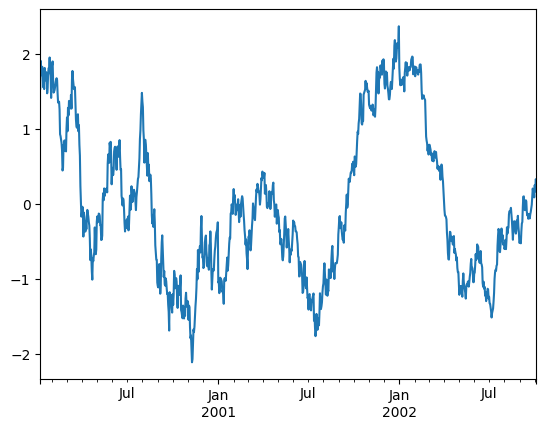

In [1414]:
transformed.plot()

In [1415]:
ts.groupby(lambda x: x.year).transform(lambda x: x.max() - x.min())

2000-01-08    0.691613
2000-01-09    0.691613
2000-01-10    0.691613
2000-01-11    0.691613
2000-01-12    0.691613
                ...   
2002-09-30    0.995225
2002-10-01    0.995225
2002-10-02    0.995225
2002-10-03    0.995225
2002-10-04    0.995225
Freq: D, Length: 1001, dtype: float64

In [1416]:
df_re = pd.DataFrame({"A": [1] * 10 + [5] * 10, "B": np.arange(20)})
df_re

,A,B
0,1,0
1,1,1
2,1,2
3,1,3
4,1,4
5,1,5
6,1,6
7,1,7
8,1,8
9,1,9


In [1417]:
df_re.groupby('A').rolling(4)

RollingGroupby [window=4,center=False,axis=0,method=single]

In [1420]:
df_re.groupby('A').rolling(4).mean()

B
A         
1 0    NaN
  1    NaN
  2    NaN
  3    1.5
  4    2.5
  5    3.5
  6    4.5
  7    5.5
  8    6.5
  9    7.5
5 10   NaN
  11   NaN
  12   NaN
  13  11.5
  14  12.5
  15  13.5
  16  14.5
  17  15.5
  18  16.5
  19  17.5

In [1421]:
df_re.groupby('A').rolling(4).B.mean()

A    
1  0      NaN
   1      NaN
   2      NaN
   3      1.5
   4      2.5
   5      3.5
   6      4.5
   7      5.5
   8      6.5
   9      7.5
5  10     NaN
   11     NaN
   12     NaN
   13    11.5
   14    12.5
   15    13.5
   16    14.5
   17    15.5
   18    16.5
   19    17.5
Name: B, dtype: float64

In [1429]:
df_re.groupby('A').rolling(1).sum()

B
A         
1 0    0.0
  1    1.0
  2    2.0
  3    3.0
  4    4.0
  5    5.0
  6    6.0
  7    7.0
  8    8.0
  9    9.0
5 10  10.0
  11  11.0
  12  12.0
  13  13.0
  14  14.0
  15  15.0
  16  16.0
  17  17.0
  18  18.0
  19  19.0

In [1432]:
df_re.groupby('A').rolling(4).apply(lambda x: x.max())

B
A         
1 0    NaN
  1    NaN
  2    NaN
  3    3.0
  4    4.0
  5    5.0
  6    6.0
  7    7.0
  8    8.0
  9    9.0
5 10   NaN
  11   NaN
  12   NaN
  13  13.0
  14  14.0
  15  15.0
  16  16.0
  17  17.0
  18  18.0
  19  19.0

In [1438]:
df_re.groupby('A').rolling(2).apply(lambda x: x.iloc[0])

B
A         
1 0    NaN
  1    0.0
  2    1.0
  3    2.0
  4    3.0
  5    4.0
  6    5.0
  7    6.0
  8    7.0
  9    8.0
5 10   NaN
  11  10.0
  12  11.0
  13  12.0
  14  13.0
  15  14.0
  16  15.0
  17  16.0
  18  17.0
  19  18.0

In [1439]:
df_re.groupby("A").expanding().sum()

B
A          
1 0     0.0
  1     1.0
  2     3.0
  3     6.0
  4    10.0
  5    15.0
  6    21.0
  7    28.0
  8    36.0
  9    45.0
5 10   10.0
  11   21.0
  12   33.0
  13   46.0
  14   60.0
  15   75.0
  16   91.0
  17  108.0
  18  126.0
  19  145.0

In [1441]:
df_re.groupby("A").expanding().apply(lambda x: x.sum())

B
A          
1 0     0.0
  1     1.0
  2     3.0
  3     6.0
  4    10.0
  5    15.0
  6    21.0
  7    28.0
  8    36.0
  9    45.0
5 10   10.0
  11   21.0
  12   33.0
  13   46.0
  14   60.0
  15   75.0
  16   91.0
  17  108.0
  18  126.0
  19  145.0

In [1442]:
df_re = pd.DataFrame(
    {
        "date": pd.date_range(start="2016-01-01", periods=4, freq="W"),
        "group": [1, 1, 2, 2],
        "val": [5, 6, 7, 8],
    }
).set_index("date")
df_re

,group,val
date,,
2016-01-03,1,5
2016-01-10,1,6
2016-01-17,2,7
2016-01-24,2,8


In [1445]:
df_re.groupby('group').resample('1D').ffill()

group  val
group date                  
1     2016-01-03      1    5
      2016-01-04      1    5
      2016-01-05      1    5
      2016-01-06      1    5
      2016-01-07      1    5
      2016-01-08      1    5
      2016-01-09      1    5
      2016-01-10      1    6
2     2016-01-17      2    7
      2016-01-18      2    7
      2016-01-19      2    7
      2016-01-20      2    7
      2016-01-21      2    7
      2016-01-22      2    7
      2016-01-23      2    7
      2016-01-24      2    8

In [1446]:
speeds

,class,order,max_speed
falcon,bird,Falconiformes,389.0
parrot,bird,Psittaciformes,24.0
lion,mammal,Carnivora,80.2
monkey,mammal,Primates,NaN
leopard,mammal,Carnivora,58.0


In [1447]:
speeds.groupby("class").nth(1)

,order,max_speed
class,,
bird,Psittaciformes,24.0
mammal,Primates,NaN


In [1448]:
speeds.groupby("class").nth([0, 1])

,order,max_speed
class,,
bird,Falconiformes,389.0
bird,Psittaciformes,24.0
mammal,Carnivora,80.2
mammal,Primates,NaN


In [1449]:
speeds.groupby("class").nth([-1])

,order,max_speed
class,,
bird,Psittaciformes,24.0
mammal,Carnivora,58.0


In [1450]:
speeds.groupby("class").head()

,class,order,max_speed
falcon,bird,Falconiformes,389.0
parrot,bird,Psittaciformes,24.0
lion,mammal,Carnivora,80.2
monkey,mammal,Primates,NaN
leopard,mammal,Carnivora,58.0


In [1451]:
sf = pd.Series([1, 1, 2, 3, 3, 3])
sf

0    1
1    1
2    2
3    3
4    3
5    3
dtype: int64

In [1457]:
sf.groupby(sf).count()

1    2
2    1
3    3
dtype: int64

In [1459]:
def filter_fn(x):
    print(x)
    print("-------------------------------------")
    return x.sum() > 2
sf.groupby(sf).filter(filter_fn)

0    1
1    1
dtype: int64
-------------------------------------
2    2
dtype: int64
-------------------------------------
3    3
4    3
5    3
dtype: int64
-------------------------------------


3    3
4    3
5    3
dtype: int64

In [1463]:
def filter_fn(x):
    return x.sum() > 58
sf.groupby(sf).filter(filter_fn)

Series([], dtype: int64)

In [1464]:
dff

,A,B,C
0,0.761983,0.404388,0.394438
1,-0.432550,0.143582,-1.028408
2,0.293791,1.545339,0.272496
3,NaN,-0.173893,1.681017
4,NaN,NaN,0.700592
5,NaN,NaN,NaN
6,-1.700946,-1.157645,NaN
7,-0.650156,0.645288,NaN
8,1.623048,0.372672,-1.585608
9,0.251045,-0.125667,1.153946


In [1465]:
dff.groupby("B").filter(lambda x: len(x) > 2, dropna=False)

,A,B,C
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
5,NaN,NaN,NaN
6,NaN,NaN,NaN
7,NaN,NaN,NaN
8,NaN,NaN,NaN
9,NaN,NaN,NaN


In [1467]:
df

A  B
first second      
bar   one     1  0
      two     1  1
baz   one     1  2
      two     1  3
foo   one     2  4
      two     2  5
qux   one     3  6
      two     3  7

In [1469]:
df.groupby("A").B.apply(lambda x: x.describe())

A       
1  count    4.000000
   mean     1.500000
   std      1.290994
   min      0.000000
   25%      0.750000
   50%      1.500000
   75%      2.250000
   max      3.000000
2  count    2.000000
   mean     4.500000
   std      0.707107
   min      4.000000
   25%      4.250000
   50%      4.500000
   75%      4.750000
   max      5.000000
3  count    2.000000
   mean     6.500000
   std      0.707107
   min      6.000000
   25%      6.250000
   50%      6.500000
   75%      6.750000
   max      7.000000
Name: B, dtype: float64

In [1470]:
grouped = df.groupby('A')['B']

def f(gr):
    print(gr)
    print("*" * 10)
    return gr
grouped.apply(f)

first  second
bar    one       0
       two       1
baz    one       2
       two       3
Name: 1, dtype: int64
**********
first  second
foo    one       4
       two       5
Name: 2, dtype: int64
**********
first  second
qux    one       6
       two       7
Name: 3, dtype: int64
**********


/tmp/ipykernel_31680/2952304546.py:7: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  grouped.apply(f)


first  second
bar    one       0
       two       1
baz    one       2
       two       3
foo    one       4
       two       5
qux    one       6
       two       7
Name: B, dtype: int64

In [1475]:
grouped = df.groupby('A')['B']

def f(gr):
    
    return pd.DataFrame({'min': [gr.min(), gr.idxmin()], 'max': [gr.max(), gr.idxmax()]})
grouped.apply(f)

min         max
A                          
1 0           0           3
  1  (bar, one)  (baz, two)
2 0           4           5
  1  (foo, one)  (foo, two)
3 0           6           7
  1  (qux, one)  (qux, two)

In [1478]:
df

A  B
first second      
bar   one     1  0
      two     1  1
baz   one     1  2
      two     1  3
foo   one     2  4
      two     2  5
qux   one     3  6
      two     3  7

In [1479]:
df.groupby('A',).apply(lambda x: x)

/tmp/ipykernel_31680/1535063809.py:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df.groupby('A',).apply(lambda x: x)


A  B
first second      
bar   one     1  0
      two     1  1
baz   one     1  2
      two     1  3
foo   one     2  4
      two     2  5
qux   one     3  6
      two     3  7

In [1480]:
df.groupby('A', group_keys=True).apply(lambda x: x)

A  B
A first second      
1 bar   one     1  0
        two     1  1
  baz   one     1  2
        two     1  3
2 foo   one     2  4
        two     2  5
3 qux   one     3  6
        two     3  7

In [1481]:
df.groupby('A', group_keys=False).apply(lambda x: x)

A  B
first second      
bar   one     1  0
      two     1  1
baz   one     1  2
      two     1  3
foo   one     2  4
      two     2  5
qux   one     3  6
      two     3  7

In [1482]:
df = pd.DataFrame([[1, np.nan], [1, 4], [5, 6]], columns=["A", "B"])
g = df.groupby("A")

In [1487]:
df

,A,B
0,1,NaN
1,1,4.0
2,5,6.0


In [1484]:
g.nth(0)

,B
A,
1,NaN
5,6.0


In [1488]:
g.nth(0, dropna="any")

,B
A,
1,4.0
5,6.0


In [1489]:
business_dates = pd.date_range(start="4/1/2014", end="6/30/2014", freq="B")

df = pd.DataFrame(1, index=business_dates, columns=["a", "b"])
df

,a,b
2014-04-01,1,1
2014-04-02,1,1
2014-04-03,1,1
2014-04-04,1,1
2014-04-07,1,1
...,...,...
2014-06-24,1,1
2014-06-25,1,1
2014-06-26,1,1
2014-06-27,1,1


In [1490]:
df.groupby([df.index.year, df.index.month]).nth[1:, :-1]

a  b
2014 4  1  1
     4  1  1
     4  1  1
     4  1  1
     4  1  1
...    .. ..
     6  1  1
     6  1  1
     6  1  1
     6  1  1
     6  1  1

[65 rows x 2 columns]

In [1491]:
dfg = pd.DataFrame(list("aaabba"), columns=["A"])

dfg

,A
0,a
1,a
2,a
3,b
4,b
5,a


In [1492]:
dfg.groupby('A').cumcount()

0    0
1    1
2    2
3    0
4    1
5    3
dtype: int64

In [1493]:
dfg.groupby("A").cumcount(ascending=False)

0    3
1    2
2    1
3    1
4    0
5    0
dtype: int64

In [1494]:
dfg.groupby("A").ngroup()

0    0
1    0
2    0
3    1
4    1
5    0
dtype: int64

In [1497]:
dfg.groupby("A").ngroups

2

In [1498]:
df = pd.DataFrame(
    {
        "Store": np.random.choice(["Store_1", "Store_2"], n),
        "Product": np.random.choice(["Product_1", "Product_2"], n),
        "Revenue": (np.random.random(n) * 50 + 10).round(2),
        "Quantity": np.random.randint(1, 10, size=n),
    }
)
df

,Store,Product,Revenue,Quantity
0,Store_2,Product_1,15.78,5
1,Store_2,Product_2,30.42,2
2,Store_1,Product_2,23.44,7
3,Store_1,Product_1,16.21,1
4,Store_1,Product_1,45.94,9
5,Store_1,Product_2,36.81,6
6,Store_1,Product_2,12.98,4
7,Store_2,Product_1,56.71,3
8,Store_1,Product_1,50.48,9
9,Store_2,Product_2,45.89,8


In [1499]:
df.groupby(["Store", "Product"]).pipe(lambda grp: grp.Revenue.sum() / grp.Quantity.sum())

Store    Product  
Store_1  Product_1    5.927895
         Product_2    4.307647
Store_2  Product_1    9.061250
         Product_2    7.631000
dtype: float64

In [1500]:
df['Revenue'].pipe(lambda x: x * 2)

0     31.56
1     60.84
2     46.88
3     32.42
4     91.88
5     73.62
6     25.96
7    113.42
8    100.96
9     91.78
Name: Revenue, dtype: float64

In [1501]:
df['Revenue'].apply(lambda x: x * 2)

0     31.56
1     60.84
2     46.88
3     32.42
4     91.88
5     73.62
6     25.96
7    113.42
8    100.96
9     91.78
Name: Revenue, dtype: float64

In [1502]:
df['Revenue'].map(lambda x: x * 2)

0     31.56
1     60.84
2     46.88
3     32.42
4     91.88
5     73.62
6     25.96
7    113.42
8    100.96
9     91.78
Name: Revenue, dtype: float64

In [1504]:
df.groupby(["Store", "Product"]).pipe(lambda grp: grp.Revenue.sum() / grp.Quantity.sum()).unstack().round(2)

Product,Product_1,Product_2
Store,,
Store_1,5.93,4.31
Store_2,9.06,7.63


In [1505]:
df = pd.DataFrame({"a": [1, 0, 0], "b": [0, 1, 0], "c": [1, 0, 0], "d": [2, 3, 4]})
df

,a,b,c,d
0,1,0,1,2
1,0,1,0,3
2,0,0,0,4


In [1506]:
df.groupby(df.sum(), axis=1).sum()

,1,9
0,2,2
1,1,3
2,0,4


## Windowing operations

In [1507]:
s = pd.Series(range(5))

In [1508]:
s

0    0
1    1
2    2
3    3
4    4
dtype: int64

In [1509]:
s.rolling(window=2).sum()

0    NaN
1    1.0
2    3.0
3    5.0
4    7.0
dtype: float64

In [1510]:
for window in s.rolling(window=2):
    print(window)

0    0
dtype: int64
0    0
1    1
dtype: int64
1    1
2    2
dtype: int64
2    2
3    3
dtype: int64
3    3
4    4
dtype: int64


In [1511]:
s = pd.Series(range(5), index=pd.date_range('2020-01-01', periods=5, freq='1D'))
s

2020-01-01    0
2020-01-02    1
2020-01-03    2
2020-01-04    3
2020-01-05    4
Freq: D, dtype: int64

In [1512]:
s.rolling(window='2D').sum()

2020-01-01    0.0
2020-01-02    1.0
2020-01-03    3.0
2020-01-04    5.0
2020-01-05    7.0
Freq: D, dtype: float64

In [1513]:
df = pd.DataFrame({'A': ['a', 'b', 'a', 'b', 'a'], 'B': range(5)})
df

,A,B
0,a,0
1,b,1
2,a,2
3,b,3
4,a,4


In [1514]:
df.groupby('A').expanding().sum()

B
A       
a 0  0.0
  2  2.0
  4  6.0
b 1  1.0
  3  4.0

In [1515]:
df = pd.DataFrame([[1, 2, 0.6], [2, 3, 0.4], [3, 4, 0.2], [4, 5, 0.7]])
df

,0,1,2
0,1,2,0.6
1,2,3,0.4
2,3,4,0.2
3,4,5,0.7


In [1518]:
def weighted_mean(x):
    print("X: ", x)
    arr = np.ones((1, x.shape[1]))
    arr[:, :2] = (x[:, :2] * x[:, 2]).sum(axis=0) / x[:, 2].sum()
    return arr
df.rolling(2, method="table", min_periods=0).apply(weighted_mean, raw=True, engine="numba")

X:  [[1.  2.  0.6]]
X:  [[1.  2.  0.6]
 [2.  3.  0.4]]
X:  [[2.  3.  0.4]
 [3.  4.  0.2]]
X:  [[3.  4.  0.2]
 [4.  5.  0.7]]


,0,1,2
0,1.000000,2.000000,1.0
1,1.800000,2.000000,1.0
2,3.333333,2.333333,1.0
3,1.555556,7.000000,1.0


In [1519]:
df = pd.DataFrame([[1, 2, 0.6], [2, 3, 0.4], [3, 4, 0.2], [4, 5, 0.7]])

df.ewm(0.5).mean()

,0,1,2
0,1.000000,2.000000,0.600000
1,1.750000,2.750000,0.450000
2,2.615385,3.615385,0.276923
3,3.550000,4.550000,0.562500


In [1520]:
s = pd.Series([np.nan, 1, 2, np.nan, np.nan, 3])
s

0    NaN
1    1.0
2    2.0
3    NaN
4    NaN
5    3.0
dtype: float64

In [1522]:
s.rolling(window=3).sum()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
dtype: float64

In [1521]:
s.rolling(window=3, min_periods=1).sum()

0    NaN
1    1.0
2    3.0
3    3.0
4    2.0
5    3.0
dtype: float64

In [1523]:
s.rolling(window=3, min_periods=2).sum()

0    NaN
1    NaN
2    3.0
3    3.0
4    NaN
5    NaN
dtype: float64

In [1524]:
df = pd.DataFrame(
    {"x": 1},
    index=[
        pd.Timestamp("20130101 09:00:01"),
        pd.Timestamp("20130101 09:00:02"),
        pd.Timestamp("20130101 09:00:03"),
        pd.Timestamp("20130101 09:00:04"),
        pd.Timestamp("20130101 09:00:06"),
    ],
)


df["right"] = df.rolling("2s", closed="right").x.sum()  # default

df["both"] = df.rolling("2s", closed="both").x.sum()

df["left"] = df.rolling("2s", closed="left").x.sum()

df["neither"] = df.rolling("2s", closed="neither").x.sum()

df

,x,right,both,left,neither
2013-01-01 09:00:01,1,1.0,1.0,NaN,NaN
2013-01-01 09:00:02,1,2.0,2.0,1.0,1.0
2013-01-01 09:00:03,1,2.0,3.0,2.0,1.0
2013-01-01 09:00:04,1,2.0,3.0,2.0,1.0
2013-01-01 09:00:06,1,1.0,2.0,1.0,NaN


In [1526]:
def mad(x):
    print(x)
    return np.fabs(x - x.mean()).mean()


s = pd.Series(range(10))

s.rolling(window=4).apply(mad, raw=True)

[0. 1. 2. 3.]
[1. 2. 3. 4.]
[2. 3. 4. 5.]
[3. 4. 5. 6.]
[4. 5. 6. 7.]
[5. 6. 7. 8.]
[6. 7. 8. 9.]


0    NaN
1    NaN
2    NaN
3    1.0
4    1.0
5    1.0
6    1.0
7    1.0
8    1.0
9    1.0
dtype: float64